<a href="https://colab.research.google.com/github/SampadSikder/Nonnegative-Matrix-Factorization-Experimentation/blob/main/AT%26T_multiple_images_min_max_scalar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equations from https://proceedings.neurips.cc/paper/2000/file/f9d1152547c0bde01830b7e8bd60024c-Paper.pdf
Edges after nmf in basis matrix: http://www.cs.cmu.edu/~./changbo/publications/IJPRAI05.pdf

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
import numpy
import matplotlib.pyplot as mtp

In [4]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


# Code Library

In [5]:
import time

def extractFrameFromImage(filePath, imageLimit, frame_rate):
  vidcap = cv2.VideoCapture(filePath)
  success,image = vidcap.read()
  count = 0
  #define framerate
  frame_rate = 10
  prev = 0
  frame=0
  while success:
    time_elapsed = time.time() - prev
    success,image = vidcap.read()  
    if time_elapsed > 1./frame_rate:
      prev = time.time()
      cv2.imwrite("%d.jpg" % count, image)     # save frame as JPEG file      
      #print('Read a new frame: ', success)
      count=count+1
      frame += frame_rate # i.e. at 30 fps, this advances one second
      vidcap.set(cv2.CAP_PROP_POS_FRAMES, frame)
    if count>=imageLimit:
      break
  vidcap.release()
  cv2.destroyAllWindows()

  

In [6]:
def checkCrop():
  img=cv2.imread('/content/9.jpg')
  img=img[350:600,400:600]
  cv2_imshow(img)

In [7]:
import os
def countWidthandHeight():
  #img=cv2.imread('/content/9.jpg')
  img=cv2.imread('/content/9.pgm')
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #resize
  
  width = int(image.shape[1])
  
  height = int(image.shape[0])
  
  print(width, height)

  


  count=0

  for image_name in os.listdir('/content'):
    extension = os.path.splitext(image_name)[1][1:]
    if extension=='pgm':
      count=count+1

  return width, height, count

In [8]:
def singleImage(path):
  img=cv2.imread(path)
  
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #resize
  
  width = int(image.shape[1])
  
  height = int(image.shape[0])


  dim = (width, height)
  print(width, height)
  #resizing image
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

  return image, width, height

In [9]:
def multiplyImage():
  img=cv2.imread('/content/9.jpg')
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #resize
  imageT=np.transpose(image)
  result=np.matmul(image,imageT)

  cv2_imshow(result)


In [10]:


def convertAllImageToMatrix(width, height, x): # x = number of images
  
 

  y = width*height 

  m = np.zeros(shape=(x, int(y)))
  print(m.shape)
  itr = 0
  name_list = []
  for image_name in os.listdir('/content'):
    extension = os.path.splitext(image_name)[1][1:]
    #if extension=='jpg':
    if extension=='pgm':
      image_path='/content/'+image_name
      image = cv2.imread(image_path)
      #####flip image
      #image=cv2.flip(image,0)
      #crop image
      #img=image[350:600,400:600]
      #grayscale	
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      #resize
      dim = (width, height)
      print(width, height)
      #resizing image
      resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
      #rows,cols = resized.shape # gives dimensions for RGB array
      
      rows,cols=resized.shape#normal shape
      img_size = rows*cols
      img_1D_vector = resized.reshape(img_size)
      
      #print(img_1D_vector)
      #np.append(m, img_1D_vector,axis=0)
      m[itr]=img_1D_vector
      itr=itr+1
      name_list.append(image_name)
      print(itr)
      
  return m, name_list, itr

In [11]:
def normalizeM(m):
  sum=0
  row, col=m.shape
  for i in range(0,row):
    for j in range(0,col):
      sum+=m[i][j]
  mean=sum/row*col 

  m=m/mean

  return m, mean

In [12]:
def normalizeMin(m):
  min=99999999999999
  row, col=m.shape
  for i in range(0,row):
    for j in range(0,col):
      if m[i,j]<min:
        min=m[i,j]
  m=m/min
  return m, min

In [13]:
def normalizeMax(m):
  max=-1
  row, col=m.shape
  for i in range(0,row):
    for j in range(0,col):
      if m[i,j]>max:
        max=m[i,j]
  m=m/max
  return m, max

In [14]:
def normalizeMinMaxScalar(m):
  min=99999999999999
  row, col=m.shape
  for i in range(0,row):
    for j in range(0,col):
      if m[i,j]<min:
        min=m[i,j]
  max=-1
  row, col=m.shape
  for i in range(0,row):
    for j in range(0,col):
      if m[i,j]>max:
        max=m[i,j]

  for i in range(0,row):
    for j in range(0,col):
      m[i,j]=(m[i,j]-min)/(max-min)

  return m,min,max

In [15]:
def updateW(x,w,h):
  #XVT
  ht=np.transpose(h)
  numerator=np.matmul(x,ht)
  #UVVT
  den1=np.matmul(w,h)
  denominator=np.matmul(den1,ht)

  #return
  print('u')
  secondPart=np.divide(numerator,denominator)
  return np.multiply(w,secondPart)

In [16]:
def updateH(x,w,h):
  #UT*X
  wt=np.transpose(w)
  numerator=np.matmul(wt,x)
  #UTUV
  den1=np.matmul(w,h)
  denominator=np.matmul(wt,den1)
  
  #update return
  print('v')
  secondPart=np.divide(numerator,denominator)
  return np.multiply(h,secondPart)

In [17]:
def performNMF(x, featureNo, imageCount, EPSILON=1e-9):
  w=abs(np.random.normal(3,2.5,size=(imageCount,featureNo)))
  h=abs(np.random.normal(3,2.5,size=(featureNo, x.shape[1])))

  print("Shape of W: "+str(w.shape))
  print("Shape of H: "+str(h.shape))

  itr=0
  cost=np.linalg.norm(x-np.matmul(w,h))
  while cost>EPSILON:
    if itr%2==0:
      h=updateH(x,w,h)
      #h*=6
    else:
      w=updateW(x,w,h)
      #w/=4
    wh=np.matmul(w,h)
    print(w,h)
    cost=np.linalg.norm(x-wh)
    print(cost)
    if itr>=100:
      break
    itr=itr+1
  return w,h

In [18]:
def getImageListFromM(x_new):
  #print(height,width)
  images = []
  for row in x_new:
    img_data = []
    for i in range(height):
      img_row = []
      for j in range(width):
        img_row.append(row[i*width + j])
      img_data.append(img_row)
    images.append(img_data)
  return images

In [19]:
def convertMatrixToImage(x,mean):
  x_new=np.zeros((x.shape[0],x.shape[1]), dtype=int)
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x_new[i][j]=x[i,j]*mean
      x_new[i][j]=math.ceil(x_new[i][j])
  print(x_new)
  return x_new

In [33]:
def convertMatrixtoImageMinMax(x, min, max):
  row, col=x.shape
  for i in range(0,row):
    for j in range(0,col):
      x[i,j]=(x[i,j]*(max-min))+min
  return x

### Testing Code

In [21]:
from google.colab.patches import cv2_imshow


In [45]:
def compareAndTest(m, w, h, min, max, mean):
  x_new=np.matmul(w,h)
  x_new=convertMatrixtoImageMinMax(x_new, min, max)
  x_new=np.ceil(x_new*mean)
  #x_new=np.transpose(x_new)

  resulting_images = getImageListFromM(x_new)
  original_images = getImageListFromM(np.ceil(m*mean))

  
  for index in range(m.shape[0]):
    print("-------------------------------Number of image: "+str(index))
 
  
    img=np.array(resulting_images[index])

    print(img)

    cv2_imshow(img)
    print("Image after NMF:")

    img=np.array(original_images[index])
    cv2_imshow(img)

    print(img)
    print("Image Before NMF:")


In [23]:
def variance(m): # m = matrix of all images
  return np.var(m)

In [24]:
def __grouper(labels, original_images, resulting_images):
    groups = []
    for current_label in set(labels):
      cluster = []
      for index,label in enumerate(labels):
        if label == current_label:
          node = [label, original_images[index], resulting_images[index]]
          cluster.append(node)
      groups.append(cluster)
    return groups

In [25]:
def compareAndTestWithKNN(m, w, h, mean, n_clusters):
  x_new=np.matmul(w,h)
  x_new=np.ceil(x_new*mean)
  #x_new=np.transpose(x_new)

  kmeans = KMeans(n_clusters, random_state=0)
  kmeans.fit(w)

  resulting_images = getImageListFromM(x_new)
  original_images = getImageListFromM(np.ceil(m*mean))
  
  clusters = __grouper(kmeans.labels_, original_images, resulting_images)

  for cluster in clusters:
    print("----------------Labels------------------------")
    for index, node in enumerate(cluster):
      print("-------------------------------Number of image: "+str(index)+"-----------Cluster="+str(node[0])+".")
      img=np.array(node[1])
      cv2_imshow(img)
  
  return kmeans

In [26]:
def scatterPlot(kmeans,F):
  y_predict= kmeans.fit_predict(F)  
  mtp.scatter(F[y_predict == 0, 0], F[y_predict == 0, 1], s = 10, c = 'blue', label = 'Cluster 1') #for first cluster  
  mtp.scatter(F[y_predict == 1, 0], F[y_predict == 1, 1], s = 10, c = 'green', label = 'Cluster 2') #for second cluster  
  mtp.scatter(F[y_predict== 2, 0], F[y_predict == 2, 1], s = 10, c = 'red', label = 'Cluster 3') #for third cluster  
  mtp.scatter(F[y_predict == 3, 0], F[y_predict == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
  mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroid')   
  mtp.title('Clusters')  

  mtp.legend()  
  mtp.show() 

# Experimentation Area

In [ ]:
imageLimit = 100
frame_rate=5
extractFrameFromImage('/content/Drive/MyDrive/Colab Notebooks/Dataset/ClothStackDetection.mp4', imageLimit, frame_rate)

In [ ]:
!ls

In [ ]:
width, height, imageCount=countWidthandHeight()

In [ ]:
print(imageCount)

In [ ]:
m, imageNameList, imageCount = convertAllImageToMatrix(width, height, imageCount)


In [ ]:
m.shape

In [ ]:
m

In [ ]:
m, mean = normalizeM(m)

In [ ]:
w,h=performNMF(m, 10, imageCount)

# from sklearn.decomposition import NMF
# nmf_model = NMF(10,max_iter=100)
# w = nmf_model.fit_transform(m)
# h=nmf_model.components_


In [ ]:
compareAndTest(m,w,h, mean)

In [ ]:
x_new=np.matmul(w,h)
x_new=np.ceil(x_new*mean)
x_new=np.transpose(x_new)

print("Original Image Set Variance: "+str(variance(np.ceil(np.transpose(m)*mean))))
print("NMF Generated Image Set Variance: "+str(variance(x_new)))

In [ ]:
w.shape

# Clustering

In [ ]:
kmeans=compareAndTestWithKNN(m,w,h, mean, 3)

In [ ]:
scatterPlot(kmeans,w)

#Visualization


In [ ]:
m,width,height=singleImage('/content/8.jpg')
print(width,height)

#multiplyImage()

In [ ]:
#m,mean=normalizeM(m)
print(m)
w,h=performNMF(m, 10, height)
print(m)
'''
from sklearn.decomposition import NMF
nmf_model = NMF(100,max_iter=100)
w = nmf_model.fit_transform(m)
h=nmf_model.components_
'''

In [ ]:
import math
m=m
cv2_imshow(m)
#cv2_imshow(convertMatrixToImage(np.matmul(w,h),mean))
cv2_imshow(np.matmul(w,h))

In [ ]:
#cv2_imshow(convertMatrixToImage(w,mean))
cv2_imshow(np.ceil(w))
print(np.ceil(w))

In [ ]:
#cv2_imshow(convertMatrixToImage(h,mean))
print(w.shape)
col=np.transpose(w)
temp=col[0].reshape(11,23)
print(temp)
cv2_imshow(temp)

In [ ]:
cv2_imshow(np.matmul(w,h))

#Temp

In [ ]:
!find content/Face-recognition/Datasets/att_faces/Training -type f -print0 | xargs -0 mv -t /content

In [104]:
!rm content/Face-recognition -r 

rm: cannot remove 'content/Face-recognition': No such file or directory


In [26]:
!git clone https://github.com/mohamed-elsayed-mohamed/Face-Recognition.git

fatal: destination path 'Face-Recognition' already exists and is not an empty directory.


In [ ]:
print(m)
w,h=performNMF(m, 10, height)
print(m)

Streaming output truncated to the last 5000 lines.
 [0.34597828 3.14426643 0.72743952 ... 4.74557699 3.20373488 0.96155385]
 [1.75322273 5.125309   1.18489538 ... 3.51585258 3.40181553 0.28915337]
 [1.34406938 7.03712118 2.13409084 ... 3.84289036 2.0352155  0.65373096]] [[3.95163503e+00 4.38003081e+00 4.29259246e+00 2.68132097e+00
  6.46318444e+00 3.33646284e+00 4.48170713e+00 2.92770894e+00
  1.18181132e+00 5.80247070e+00 5.12738289e+00 3.53634865e+00
  2.90915977e+00 2.05763446e+00 4.53130457e+00 5.27101556e+00
  2.69817266e+00 6.85697769e+00 5.61927734e+00 2.84051235e+00
  5.59187765e+00 5.78848011e+00 5.85456947e+00 7.05601216e+00
  5.10708456e+00 5.50453556e+00 1.99666136e+00 1.98242411e+00
  4.86224359e+00 6.03304256e+00 7.07036262e+00 9.65557508e-01
  4.09676731e+00 4.80486991e+00 7.06333855e+00 3.78731615e+00
  4.41958734e+00 1.69809046e-01 3.57851256e+00 2.83328336e+00
  1.98696564e+00 5.51355479e+00 7.22754145e+00 3.27348329e+00
  3.39950056e+00 2.13421652e-01 2.57483302e-02 

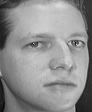

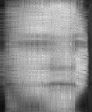

In [ ]:
import math
m=m
cv2_imshow(m)
#cv2_imshow(convertMatrixToImage(np.matmul(w,h),mean))
cv2_imshow(np.matmul(w,h))

In [ ]:
m,mean=normalizeM(m)
w,h=performNMF(m, 10, height)
print(m)

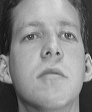

[[41 42 44 ... 49 53 53]
 [42 40 42 ... 47 52 54]
 [41 42 42 ... 48 52 51]
 ...
 [32 32 28 ... 40 39 40]
 [36 35 28 ... 41 42 41]
 [36 35 29 ... 42 42 42]]


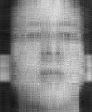

In [ ]:
import math
cv2_imshow(m*mean)
cv2_imshow(convertMatrixToImage(np.matmul(w,h),mean))

In [ ]:
m,minn=normalizeMin(m)
w,h=performNMF(m, 10, height)
print(m)

Streaming output truncated to the last 5000 lines.
 [3.1471087  0.39865392 4.21717388 ... 0.8452539  4.98663337 2.75973568]
 [3.08665064 0.84225506 3.03347438 ... 0.42248857 6.30754184 1.81093037]
 [3.11327918 0.84135452 2.35204505 ... 0.28627643 5.85251574 2.81659002]] [[2.49751474e-03 3.60008048e-03 2.84545559e-03 1.72120173e-04
  2.51456426e-03 4.26022040e-03 8.90829195e-03 9.16158620e-03
  1.20383434e-02 2.85895739e-02 9.94402313e-03 8.76459149e-03
  4.64440170e-02 6.59925175e-02 1.09452803e-02 3.84654621e-02
  1.48871979e-02 1.47664275e-01 1.93663253e-01 2.70539532e-01
  1.59208963e-01 2.87615053e-01 1.68480432e-01 2.64086280e-01
  1.79676127e-01 2.94152429e-01 2.90374118e-01 2.01434982e-01
  3.04940307e-01 2.57100827e-01 2.91604042e-01 2.27110707e-01
  2.79789109e-01 1.71283328e-01 2.57273509e-01 4.96521806e-01
  3.00629522e-01 3.61388416e-01 5.37670734e-01 4.72432687e-01
  4.88256125e-01 4.93637776e-01 8.18728995e-01 5.58368465e-01
  5.61664985e-01 3.56407434e-01 6.11955094e-01 

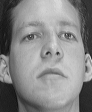

[[30 29 33 ... 42 40 42]
 [30 30 34 ... 42 40 31]
 [33 35 37 ... 45 42 43]
 ...
 [27 26 24 ... 40 33 44]
 [29 30 27 ... 42 36 44]
 [28 30 27 ... 41 35 45]]


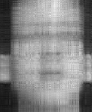

In [ ]:
import math
cv2_imshow(m*minn)
cv2_imshow(convertMatrixToImage(np.matmul(w,h),minn))

In [ ]:
m,minn=normalizeMax(m)
w,h=performNMF(m, 10, height)
print(m)

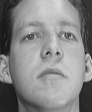

[[26 26 24 ... 32 31 34]
 [32 31 28 ... 34 33 35]
 [25 24 23 ... 34 29 37]
 ...
 [34 35 33 ... 45 40 42]
 [33 33 31 ... 41 40 41]
 [38 39 37 ... 44 43 48]]


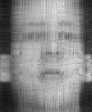

In [ ]:
import math
cv2_imshow(m*minn)
cv2_imshow(convertMatrixToImage(np.matmul(w,h),minn))

#Test on multiple images

In [51]:
import shutil
counter = 1
source = "/content/Face-Recognition/Datasets/att_faces/Training"
destination = "/content/"

# code to move the files from sub-folder to main folder.
for root, dirs, files in os.walk(source):
    for file in files:
        # Get the full path of the file
        file_path = os.path.join(root, file)
        
        file_extension = os.path.splitext(file)[1]
        
        # Create the new file name
        new_file_name = str(counter) + file_extension
        
        # Move the file to the destination and rename it
        shutil.move(file_path, os.path.join(destination, new_file_name))
        
        # Increment the counter
        counter += 1
print("Files Moved")

Files Moved


In [52]:
width, height, imageCount=countWidthandHeight()

92 112


In [54]:
m, imageNameList, imageCount = convertAllImageToMatrix(width, height, imageCount)

(351, 10304)
92 112
1
92 112
2
92 112
3
92 112
4
92 112
5
92 112
6
92 112
7
92 112
8
92 112
9
92 112
10
92 112
11
92 112
12
92 112
13
92 112
14
92 112
15
92 112
16
92 112
17
92 112
18
92 112
19
92 112
20
92 112
21
92 112
22
92 112
23
92 112
24
92 112
25
92 112
26
92 112
27
92 112
28
92 112
29
92 112
30
92 112
31
92 112
32
92 112
33
92 112
34
92 112
35
92 112
36
92 112
37
92 112
38
92 112
39
92 112
40
92 112
41
92 112
42
92 112
43
92 112
44
92 112
45
92 112
46
92 112
47
92 112
48
92 112
49
92 112
50
92 112
51
92 112
52
92 112
53
92 112
54
92 112
55
92 112
56
92 112
57
92 112
58
92 112
59
92 112
60
92 112
61
92 112
62
92 112
63
92 112
64
92 112
65
92 112
66
92 112
67
92 112
68
92 112
69
92 112
70
92 112
71
92 112
72
92 112
73
92 112
74
92 112
75
92 112
76
92 112
77
92 112
78
92 112
79
92 112
80
92 112
81
92 112
82
92 112
83
92 112
84
92 112
85
92 112
86
92 112
87
92 112
88
92 112
89
92 112
90
92 112
91
92 112
92
92 112
93
92 112
94
92 112
95
92 112
96
92 112
97
92 112
98
92 112
99
92 112

In [55]:
#m, mean = normalizeM(m)
m,min,max=normalizeMinMaxScalar(m)

In [56]:
#w,h=performNMF(m, 10, imageCount)

from sklearn.decomposition import NMF
nmf_model = NMF(10,max_iter=100)
w = nmf_model.fit_transform(m)
h=nmf_model.components_


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 100 reached. Increase it to improve convergence.
  warnings.warn(


[[ 39.  43.  39. ...  24.  24.  23.]
 [115. 108. 109. ...  48.  47.  48.]
 [116. 116. 117. ...  19.  24.  16.]
 ...
 [123. 121. 121. ...  78.  79.  67.]
 [ 30.  37.  35. ...  26.  27.  32.]
 [ 69.  76.  69. ... 104. 121.  93.]]
-------------------------------Number of image: 0
[[58. 58. 58. ... 52. 52. 52.]
 [58. 59. 58. ... 52. 52. 52.]
 [58. 58. 59. ... 52. 52. 51.]
 ...
 [66. 68. 67. ... 37. 37. 36.]
 [71. 73. 73. ... 40. 39. 38.]
 [75. 79. 78. ... 43. 42. 39.]]


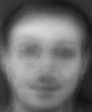

Image after NMF:


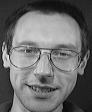

[[39. 43. 39. ... 33. 42. 29.]
 [45. 39. 46. ... 39. 33. 37.]
 [41. 40. 42. ... 37. 39. 33.]
 ...
 [69. 73. 64. ... 23. 21. 26.]
 [71. 70. 71. ... 25. 26. 22.]
 [69. 70. 77. ... 24. 24. 23.]]
Image Before NMF:
-------------------------------Number of image: 1
[[114. 114. 114. ... 109. 109. 108.]
 [114. 114. 114. ... 109. 109. 108.]
 [114. 114. 114. ... 109. 109. 108.]
 ...
 [ 84.  80.  83. ...  68.  68.  68.]
 [ 84.  81.  86. ...  66.  68.  69.]
 [ 84.  82.  86. ...  67.  68.  68.]]


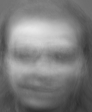

Image after NMF:


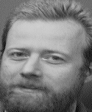

[[115. 108. 109. ... 106. 108. 109.]
 [108. 107. 111. ... 107. 107. 107.]
 [106. 109. 106. ... 110. 107. 108.]
 ...
 [ 96.  84.  73. ...  48.  40.  47.]
 [ 91.  87.  75. ...  49.  50.  51.]
 [100.  80.  84. ...  48.  47.  48.]]
Image Before NMF:
-------------------------------Number of image: 2
[[ 90.  91.  91. ...  96.  96.  95.]
 [ 90.  90.  91. ...  96.  97.  96.]
 [ 90.  90.  91. ...  96.  97.  97.]
 ...
 [101. 105. 106. ...  85.  85.  84.]
 [107. 108. 109. ...  88.  87.  86.]
 [110. 115. 116. ...  90.  88.  88.]]


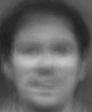

Image after NMF:


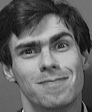

[[116. 116. 117. ... 114. 117. 114.]
 [115. 118. 117. ... 113. 120. 115.]
 [111. 121. 111. ... 113. 116. 116.]
 ...
 [101.  96. 101. ...  21.  25.  24.]
 [103.  93. 100. ...  17.  27.  19.]
 [ 98.  96.  98. ...  19.  24.  16.]]
Image Before NMF:
-------------------------------Number of image: 3
[[49. 49. 49. ... 47. 47. 47.]
 [49. 49. 49. ... 47. 47. 47.]
 [49. 49. 49. ... 47. 47. 47.]
 ...
 [85. 83. 86. ... 74. 73. 74.]
 [87. 88. 91. ... 76. 75. 74.]
 [88. 92. 94. ... 83. 82. 75.]]


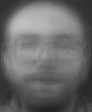

Image after NMF:


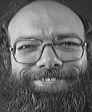

[[52. 47. 51. ... 45. 48. 45.]
 [52. 50. 53. ... 46. 46. 47.]
 [55. 44. 58. ... 45. 48. 44.]
 ...
 [67. 68. 73. ... 44. 35. 46.]
 [72. 62. 68. ... 35. 39. 49.]
 [73. 68. 63. ... 30. 34. 42.]]
Image Before NMF:
-------------------------------Number of image: 4
[[119. 120. 120. ... 114. 114. 113.]
 [119. 120. 120. ... 114. 114. 114.]
 [120. 120. 120. ... 114. 114. 114.]
 ...
 [136. 133. 136. ... 100. 100.  99.]
 [138. 137. 142. ... 103. 102. 102.]
 [139. 141. 143. ... 105. 104. 103.]]


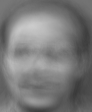

Image after NMF:


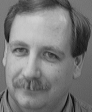

[[124. 124. 123. ... 115. 114. 117.]
 [124. 124. 122. ... 118. 116. 114.]
 [124. 121. 124. ... 116. 118. 112.]
 ...
 [130. 111. 143. ...  97. 101.  86.]
 [128. 118. 145. ...  99.  85. 101.]
 [128. 129. 145. ...  99. 102.  95.]]
Image Before NMF:
-------------------------------Number of image: 5
[[66. 66. 67. ... 73. 73. 74.]
 [66. 66. 66. ... 74. 74. 73.]
 [66. 65. 66. ... 73. 74. 74.]
 ...
 [43. 37. 38. ... 66. 65. 66.]
 [41. 39. 39. ... 68. 66. 65.]
 [42. 41. 41. ... 71. 68. 68.]]


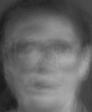

Image after NMF:


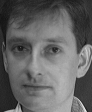

[[34. 38. 36. ... 46. 45. 46.]
 [33. 37. 38. ... 46. 46. 47.]
 [34. 37. 42. ... 46. 48. 48.]
 ...
 [36. 36. 37. ... 56. 57. 53.]
 [38. 39. 36. ... 57. 63. 55.]
 [34. 35. 33. ... 55. 58. 55.]]
Image Before NMF:
-------------------------------Number of image: 6
[[138. 138. 139. ... 140. 139. 139.]
 [138. 139. 139. ... 140. 140. 139.]
 [139. 138. 139. ... 139. 140. 140.]
 ...
 [ 76.  71.  74. ...  77.  78.  78.]
 [ 75.  72.  76. ...  77.  77.  78.]
 [ 75.  74.  76. ...  78.  77.  78.]]


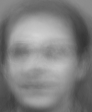

Image after NMF:


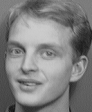

[[129. 127. 133. ... 122. 124. 124.]
 [130. 128. 126. ... 123. 124. 122.]
 [127. 126. 132. ... 123. 123. 126.]
 ...
 [ 69.  72.  71. ...  90.  90.  95.]
 [ 70.  69.  71. ...  92.  93.  92.]
 [ 74.  69.  72. ...  93.  93.  93.]]
Image Before NMF:
-------------------------------Number of image: 7
[[ 75.  75.  76. ...  69.  69.  69.]
 [ 75.  76.  76. ...  69.  69.  69.]
 [ 75.  76.  76. ...  69.  69.  69.]
 ...
 [168. 168. 169. ... 112. 109. 108.]
 [172. 175. 176. ... 117. 115. 113.]
 [175. 179. 181. ... 120. 118. 116.]]


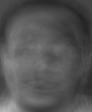

Image after NMF:


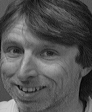

[[ 97.  94.  92. ...  85.  84.  80.]
 [ 89.  92.  94. ...  82.  83.  85.]
 [ 90.  93.  92. ...  79.  85.  82.]
 ...
 [187. 194. 198. ... 138. 142. 134.]
 [197. 200. 201. ... 138. 146. 132.]
 [199. 199. 199. ... 144. 143. 129.]]
Image Before NMF:
-------------------------------Number of image: 8
[[126. 126. 127. ... 121. 121. 121.]
 [126. 127. 127. ... 121. 121. 121.]
 [127. 127. 127. ... 121. 122. 120.]
 ...
 [125. 122. 122. ...  87.  86.  85.]
 [127. 126. 129. ...  89.  88.  88.]
 [129. 129. 131. ...  91.  89.  90.]]


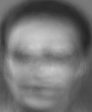

Image after NMF:


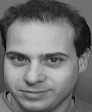

[[113. 112. 111. ... 111. 116. 109.]
 [114. 114. 113. ... 111. 111. 112.]
 [113. 114. 113. ... 112. 108. 114.]
 ...
 [137. 140. 137. ...  89.  87.  87.]
 [139. 136. 142. ...  89.  88.  87.]
 [137. 137. 141. ...  87.  87.  89.]]
Image Before NMF:
-------------------------------Number of image: 9
[[ 45.  45.  45. ...  39.  39.  38.]
 [ 45.  45.  46. ...  38.  39.  39.]
 [ 45.  45.  46. ...  39.  39.  39.]
 ...
 [191. 192. 193. ... 137. 132. 131.]
 [197. 201. 202. ... 143. 140. 137.]
 [202. 208. 211. ... 150. 146. 140.]]


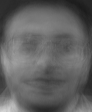

Image after NMF:


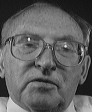

[[ 25.  24.  26. ...  21.  20.  18.]
 [ 23.  27.  24. ...  19.  19.  19.]
 [ 23.  24.  28. ...  20.  23.  16.]
 ...
 [202. 196. 186. ... 188. 184. 195.]
 [195. 197. 184. ... 186. 187. 194.]
 [198. 193. 190. ... 186. 189. 187.]]
Image Before NMF:
-------------------------------Number of image: 10
[[111. 111. 112. ... 107. 107. 108.]
 [111. 112. 111. ... 107. 106. 107.]
 [112. 111. 112. ... 107. 108. 106.]
 ...
 [ 56.  55.  53. ...  29.  30.  30.]
 [ 59.  59.  59. ...  30.  30.  31.]
 [ 62.  63.  62. ...  31.  31.  31.]]


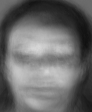

Image after NMF:


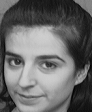

[[136. 136. 136. ... 128. 133. 133.]
 [137. 137. 138. ... 130. 133. 127.]
 [134. 140. 137. ... 134. 133. 128.]
 ...
 [ 59.  60.  55. ...  16.  22.  22.]
 [ 65.  61.  48. ...  17.  22.  19.]
 [ 60.  48.  56. ...  19.  20.  21.]]
Image Before NMF:
-------------------------------Number of image: 11
[[62. 62. 62. ... 63. 63. 63.]
 [62. 62. 62. ... 63. 63. 62.]
 [62. 62. 62. ... 63. 63. 62.]
 ...
 [46. 40. 40. ... 64. 62. 63.]
 [46. 44. 44. ... 66. 64. 62.]
 [49. 47. 47. ... 68. 65. 65.]]


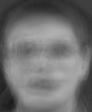

Image after NMF:


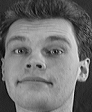

[[46. 48. 41. ... 46. 51. 52.]
 [51. 46. 47. ... 52. 47. 53.]
 [46. 48. 46. ... 51. 53. 45.]
 ...
 [43. 44. 37. ... 37. 39. 40.]
 [44. 39. 42. ... 34. 39. 40.]
 [38. 41. 41. ... 35. 36. 37.]]
Image Before NMF:
-------------------------------Number of image: 12
[[ 98.  98.  98. ...  95.  95.  95.]
 [ 98.  98.  98. ...  96.  95.  95.]
 [ 98.  98.  98. ...  95.  96.  95.]
 ...
 [121. 124. 125. ...  72.  72.  70.]
 [126. 128. 130. ...  75.  74.  75.]
 [127. 132. 133. ...  75.  74.  75.]]


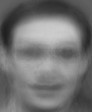

Image after NMF:


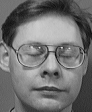

[[114. 118. 114. ... 109. 112. 112.]
 [113. 115. 117. ... 113. 108. 114.]
 [118. 111. 118. ... 113. 111. 108.]
 ...
 [103.  93. 110. ...  51.  55.  52.]
 [ 98. 101.  98. ...  49.  54.  55.]
 [ 96. 101.  98. ...  54.  55.  52.]]
Image Before NMF:
-------------------------------Number of image: 13
[[56. 56. 56. ... 54. 54. 54.]
 [56. 56. 56. ... 55. 54. 54.]
 [56. 56. 56. ... 55. 55. 54.]
 ...
 [63. 65. 64. ... 46. 46. 46.]
 [68. 69. 69. ... 49. 48. 47.]
 [71. 75. 75. ... 52. 51. 49.]]


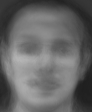

Image after NMF:


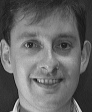

[[40. 41. 43. ... 43. 42. 41.]
 [44. 47. 49. ... 46. 40. 42.]
 [44. 45. 44. ... 39. 41. 42.]
 ...
 [43. 49. 48. ... 38. 37. 36.]
 [48. 47. 49. ... 40. 39. 38.]
 [48. 51. 45. ... 40. 37. 36.]]
Image Before NMF:
-------------------------------Number of image: 14
[[114. 114. 114. ... 115. 114. 115.]
 [114. 114. 114. ... 115. 115. 114.]
 [114. 114. 114. ... 114. 115. 115.]
 ...
 [ 89.  88.  89. ...  70.  70.  70.]
 [ 91.  90.  93. ...  71.  71.  71.]
 [ 92.  93.  95. ...  72.  71.  72.]]


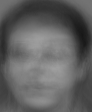

Image after NMF:


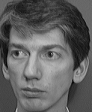

[[105. 106. 100. ...  98. 106. 103.]
 [105. 105. 105. ... 103. 103. 101.]
 [105. 105. 108. ... 104. 103. 102.]
 ...
 [ 76.  67.  69. ...  74.  78.  77.]
 [ 71.  71.  68. ...  77.  77.  79.]
 [ 73.  71.  66. ...  76.  76.  76.]]
Image Before NMF:
-------------------------------Number of image: 15
[[109. 109. 109. ... 117. 116. 116.]
 [109. 109. 109. ... 117. 117. 116.]
 [109. 109. 109. ... 116. 117. 118.]
 ...
 [ 49.  48.  54. ...  57.  60.  61.]
 [ 48.  48.  53. ...  56.  57.  59.]
 [ 47.  50.  53. ...  59.  60.  58.]]


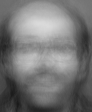

Image after NMF:


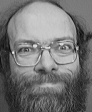

[[121. 121. 122. ... 121. 120. 120.]
 [121. 120. 118. ... 123. 120. 122.]
 [119. 122. 121. ... 121. 120. 121.]
 ...
 [ 64.  71.  69. ...  97. 104. 101.]
 [ 70.  71.  66. ...  99.  97. 102.]
 [ 65.  69.  72. ...  96.  98. 100.]]
Image Before NMF:
-------------------------------Number of image: 16
[[ 51.  52.  52. ...  49.  49.  49.]
 [ 51.  52.  52. ...  49.  49.  49.]
 [ 52.  52.  52. ...  49.  49.  49.]
 ...
 [114. 124. 124. ...  68.  67.  66.]
 [126. 132. 132. ...  72.  71.  69.]
 [132. 143. 142. ...  77.  75.  71.]]


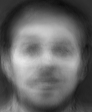

Image after NMF:


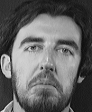

[[ 47.  47.  47. ...  40.  38.  39.]
 [ 50.  45.  47. ...  38.  39.  36.]
 [ 46.  49.  47. ...  40.  39.  36.]
 ...
 [ 54.  51.  30. ...  33.  34.  30.]
 [ 37.  65. 170. ...  35.  33.  27.]
 [104. 212. 213. ...  30.  35.  33.]]
Image Before NMF:
-------------------------------Number of image: 17
[[117. 116. 117. ... 115. 115. 115.]
 [117. 117. 117. ... 115. 115. 115.]
 [117. 117. 117. ... 115. 115. 115.]
 ...
 [125. 132. 132. ...  69.  69.  68.]
 [133. 136. 138. ...  70.  71.  72.]
 [137. 141. 144. ...  69.  70.  72.]]


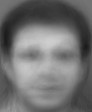

Image after NMF:


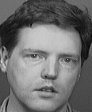

[[113. 109. 113. ... 105. 107. 106.]
 [110. 111. 112. ... 108. 104. 107.]
 [110. 112. 111. ... 105. 105. 106.]
 ...
 [137. 151. 105. ...  68.  72.  68.]
 [149. 135. 106. ...  70.  69.  68.]
 [152. 126. 120. ...  72.  66.  71.]]
Image Before NMF:
-------------------------------Number of image: 18
[[50. 50. 51. ... 49. 49. 49.]
 [51. 51. 50. ... 49. 49. 49.]
 [51. 51. 50. ... 49. 49. 49.]
 ...
 [77. 76. 79. ... 67. 66. 67.]
 [80. 81. 83. ... 69. 68. 67.]
 [82. 85. 87. ... 75. 74. 69.]]


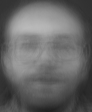

Image after NMF:


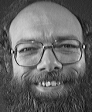

[[45. 54. 48. ... 42. 50. 37.]
 [50. 53. 49. ... 49. 48. 44.]
 [52. 50. 48. ... 47. 43. 47.]
 ...
 [67. 67. 67. ... 40. 42. 32.]
 [60. 65. 68. ... 50. 55. 39.]
 [65. 63. 76. ... 46. 67. 33.]]
Image Before NMF:
-------------------------------Number of image: 19
[[ 49.  49.  49. ...  45.  45.  44.]
 [ 49.  49.  50. ...  44.  45.  45.]
 [ 49.  50.  50. ...  45.  44.  45.]
 ...
 [191. 190. 193. ... 143. 139. 139.]
 [195. 198. 200. ... 149. 147. 144.]
 [198. 203. 206. ... 156. 153. 147.]]


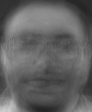

Image after NMF:


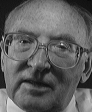

[[ 22.  19.  24. ...  12.   9.  18.]
 [ 22.  21.  21. ...  17.  16.  17.]
 [ 22.  22.  22. ...  17.  18.  18.]
 ...
 [188. 181. 171. ... 158. 153. 150.]
 [190. 181. 170. ... 153. 151. 157.]
 [194. 181. 170. ... 150. 158. 166.]]
Image Before NMF:
-------------------------------Number of image: 20
[[115. 115. 115. ... 114. 113. 113.]
 [115. 115. 116. ... 114. 114. 113.]
 [115. 115. 116. ... 113. 114. 113.]
 ...
 [128. 128. 131. ...  99.  98.  97.]
 [132. 132. 135. ... 101. 100. 100.]
 [134. 136. 139. ... 102. 101. 101.]]


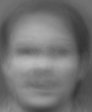

Image after NMF:


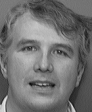

[[119. 123. 123. ... 116. 117. 113.]
 [117. 123. 123. ... 119. 113. 115.]
 [121. 125. 120. ... 115. 115. 112.]
 ...
 [193. 202. 211. ...  76.  75.  75.]
 [206. 206. 209. ...  79.  74.  72.]
 [203. 205. 211. ...  78.  72.  75.]]
Image Before NMF:
-------------------------------Number of image: 21
[[43. 43. 43. ... 41. 41. 41.]
 [43. 43. 43. ... 41. 40. 41.]
 [43. 43. 43. ... 41. 41. 40.]
 ...
 [36. 36. 35. ... 31. 31. 32.]
 [39. 39. 40. ... 32. 32. 31.]
 [42. 44. 44. ... 36. 35. 32.]]


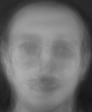

Image after NMF:


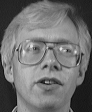

[[34. 36. 35. ... 32. 31. 31.]
 [36. 34. 38. ... 27. 32. 30.]
 [37. 37. 36. ... 29. 38. 27.]
 ...
 [42. 39. 39. ... 27. 25. 26.]
 [39. 41. 38. ... 26. 27. 26.]
 [38. 41. 34. ... 32. 25. 25.]]
Image Before NMF:
-------------------------------Number of image: 22
[[ 68.  68.  68. ...  64.  64.  64.]
 [ 68.  69.  69. ...  64.  64.  64.]
 [ 68.  68.  69. ...  64.  64.  63.]
 ...
 [138. 139. 140. ...  91.  89.  88.]
 [143. 146. 147. ...  95.  94.  92.]
 [146. 151. 152. ... 100.  98.  94.]]


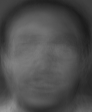

Image after NMF:


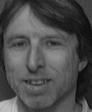

[[ 74.  74.  78. ...  67.  63.  67.]
 [ 75.  76.  74. ...  66.  66.  65.]
 [ 75.  77.  74. ...  66.  66.  64.]
 ...
 [173. 182. 187. ... 100.  84.  56.]
 [177. 184. 184. ... 103. 113. 106.]
 [177. 184. 186. ... 109. 113. 120.]]
Image Before NMF:
-------------------------------Number of image: 23
[[126. 125. 126. ... 123. 123. 123.]
 [126. 126. 125. ... 123. 123. 123.]
 [126. 126. 126. ... 123. 123. 124.]
 ...
 [ 67.  67.  70. ...  39.  41.  41.]
 [ 68.  66.  71. ...  36.  39.  42.]
 [ 67.  66.  70. ...  34.  37.  40.]]


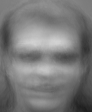

Image after NMF:


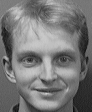

[[123. 121. 126. ... 120. 117. 120.]
 [128. 123. 125. ... 120. 119. 121.]
 [126. 124. 123. ... 118. 122. 121.]
 ...
 [ 84.  95.  90. ...  38.  37.  44.]
 [ 94.  88.  91. ...  35.  45.  39.]
 [ 89.  94.  89. ...  40.  35.  42.]]
Image Before NMF:
-------------------------------Number of image: 24
[[ 95.  96.  96. ...  98.  97.  97.]
 [ 95.  96.  96. ...  98.  98.  98.]
 [ 95.  95.  96. ...  97.  98.  98.]
 ...
 [125. 128. 130. ...  83.  83.  82.]
 [130. 133. 134. ...  87.  86.  86.]
 [132. 138. 139. ...  89.  88.  87.]]


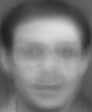

Image after NMF:


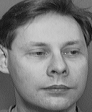

[[119. 121. 122. ... 117. 114. 121.]
 [120. 122. 122. ... 117. 117. 117.]
 [122. 122. 121. ... 116. 113. 116.]
 ...
 [ 89.  85.  96. ...  79.  80.  84.]
 [100. 108. 108. ...  79.  82.  84.]
 [107. 108. 106. ...  79.  80.  82.]]
Image Before NMF:
-------------------------------Number of image: 25
[[ 79.  79.  79. ...  79.  78.  78.]
 [ 79.  79.  80. ...  79.  79.  79.]
 [ 79.  79.  80. ...  79.  79.  79.]
 ...
 [159. 165. 167. ...  97.  97.  95.]
 [166. 171. 173. ... 102. 101. 100.]
 [168. 177. 179. ... 107. 105. 102.]]


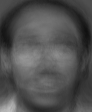

Image after NMF:


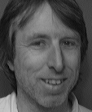

[[ 75.  77.  75. ...  65.  65.  63.]
 [ 75.  74.  77. ...  67.  67.  64.]
 [ 76.  74.  75. ...  66.  65.  65.]
 ...
 [192. 193. 192. ...  74.  64.  55.]
 [193. 194. 188. ... 108. 102.  88.]
 [191. 192. 187. ... 116. 114. 113.]]
Image Before NMF:
-------------------------------Number of image: 26
[[137. 137. 137. ... 132. 132. 132.]
 [138. 138. 137. ... 133. 132. 132.]
 [138. 138. 137. ... 132. 132. 132.]
 ...
 [ 80.  75.  78. ...  64.  65.  65.]
 [ 78.  75.  80. ...  62.  64.  66.]
 [ 78.  75.  78. ...  61.  63.  64.]]


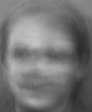

Image after NMF:


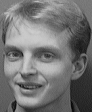

[[130. 123. 127. ... 120. 120. 124.]
 [126. 130. 123. ... 120. 120. 120.]
 [123. 125. 127. ... 122. 118. 119.]
 ...
 [ 88.  91.  96. ...  38.  37.  39.]
 [ 91.  90.  96. ...  38.  32.  42.]
 [ 91.  94.  88. ...  33.  37.  40.]]
Image Before NMF:
-------------------------------Number of image: 27
[[117. 118. 118. ... 113. 112. 112.]
 [117. 118. 118. ... 112. 113. 112.]
 [117. 118. 118. ... 113. 112. 112.]
 ...
 [152. 152. 155. ... 104. 103. 101.]
 [155. 156. 159. ... 106. 106. 106.]
 [157. 159. 162. ... 106. 105. 106.]]


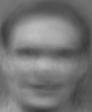

Image after NMF:


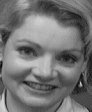

[[ 84.  96. 101. ...  91.  84.  86.]
 [ 94.  93.  93. ...  95.  90.  83.]
 [ 94.  96.  87. ...  97.  95.  91.]
 ...
 [193. 196. 202. ...  59.  64.  69.]
 [190. 195. 199. ...  40.  69.  58.]
 [191. 191. 197. ...  36.  57.  55.]]
Image Before NMF:
-------------------------------Number of image: 28
[[157. 156. 157. ... 158. 158. 159.]
 [157. 157. 156. ... 159. 158. 159.]
 [157. 157. 157. ... 158. 159. 159.]
 ...
 [152. 151. 154. ... 112. 111. 111.]
 [155. 154. 158. ... 113. 113. 114.]
 [157. 157. 161. ... 112. 112. 115.]]


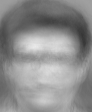

Image after NMF:


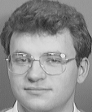

[[157. 152. 154. ... 152. 150. 151.]
 [155. 152. 156. ... 151. 151. 150.]
 [153. 153. 154. ... 152. 150. 151.]
 ...
 [105. 104. 115. ... 111. 113. 110.]
 [115. 122. 146. ... 109. 113. 110.]
 [135. 144. 157. ... 111. 108. 109.]]
Image Before NMF:
-------------------------------Number of image: 29
[[107. 107. 108. ... 114. 113. 113.]
 [108. 107. 107. ... 113. 114. 113.]
 [107. 107. 107. ... 113. 114. 114.]
 ...
 [ 85.  86.  92. ...  69.  71.  71.]
 [ 86.  87.  92. ...  69.  70.  71.]
 [ 85.  90.  93. ...  73.  73.  71.]]


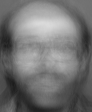

Image after NMF:


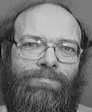

[[121. 122. 121. ... 121. 120. 119.]
 [122. 121. 125. ... 120. 118. 120.]
 [122. 124. 122. ... 122. 121. 121.]
 ...
 [142. 139. 148. ... 147. 154. 145.]
 [137. 139. 159. ... 142. 148. 149.]
 [140. 157. 162. ... 141. 140. 145.]]
Image Before NMF:
-------------------------------Number of image: 30
[[101. 101. 101. ... 102. 102. 102.]
 [101. 101. 101. ... 102. 102. 102.]
 [101. 101. 101. ... 102. 102. 103.]
 ...
 [123. 126. 128. ...  87.  87.  86.]
 [128. 129. 132. ...  89.  89.  89.]
 [130. 133. 136. ...  89.  89.  90.]]


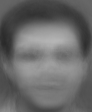

Image after NMF:


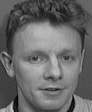

[[103. 104. 103. ... 102.  99. 100.]
 [104. 104. 104. ...  98. 103. 105.]
 [107. 104. 105. ... 103. 104. 101.]
 ...
 [128. 158. 171. ... 133. 164. 143.]
 [160. 165. 178. ... 131. 165. 147.]
 [155. 176. 177. ... 132. 165. 149.]]
Image Before NMF:
-------------------------------Number of image: 31
[[64. 63. 63. ... 68. 67. 68.]
 [64. 63. 62. ... 68. 68. 68.]
 [63. 63. 63. ... 67. 68. 68.]
 ...
 [44. 49. 49. ... 53. 52. 54.]
 [51. 50. 52. ... 52. 52. 53.]
 [56. 57. 59. ... 52. 52. 53.]]


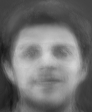

Image after NMF:


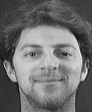

[[51. 49. 53. ... 61. 61. 54.]
 [52. 51. 50. ... 60. 61. 55.]
 [51. 49. 50. ... 59. 62. 59.]
 ...
 [52. 51. 49. ... 63. 59. 63.]
 [48. 50. 49. ... 64. 58. 61.]
 [49. 48. 48. ... 61. 61. 57.]]
Image Before NMF:
-------------------------------Number of image: 32
[[111. 111. 111. ... 110. 109. 109.]
 [111. 111. 111. ... 110. 110. 109.]
 [111. 111. 111. ... 109. 109. 110.]
 ...
 [ 65.  62.  66. ...  53.  55.  55.]
 [ 63.  61.  67. ...  51.  53.  55.]
 [ 62.  61.  65. ...  52.  53.  53.]]


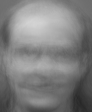

Image after NMF:


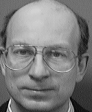

[[106. 109. 105. ... 111. 108. 113.]
 [108. 109. 108. ... 109. 113. 111.]
 [108. 111. 107. ... 112. 113. 113.]
 ...
 [ 22.  23.  23. ...  51.  46.  52.]
 [ 19.  19.  28. ...  45.  50.  46.]
 [ 17.  31.  16. ...  35.  45.  48.]]
Image Before NMF:
-------------------------------Number of image: 33
[[ 84.  84.  84. ...  80.  80.  80.]
 [ 84.  84.  84. ...  80.  80.  80.]
 [ 84.  84.  85. ...  80.  80.  80.]
 ...
 [154. 158. 159. ...  91.  89.  88.]
 [160. 163. 165. ...  94.  93.  93.]
 [163. 168. 171. ...  94.  93.  94.]]


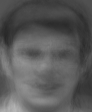

Image after NMF:


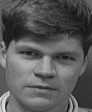

[[ 97.  96.  98. ... 103. 103. 102.]
 [ 95.  94.  94. ... 101.  98. 101.]
 [ 94.  95.  91. ... 101.  96. 100.]
 ...
 [207. 171. 182. ... 116. 108.  88.]
 [206. 188. 170. ... 109. 119. 124.]
 [204. 202. 171. ...  75. 104. 124.]]
Image Before NMF:
-------------------------------Number of image: 34
[[ 50.  51.  51. ...  49.  49.  49.]
 [ 51.  51.  51. ...  49.  49.  49.]
 [ 51.  51.  51. ...  49.  49.  49.]
 ...
 [ 92.  97.  98. ...  60.  60.  60.]
 [ 99. 103. 104. ...  64.  63.  61.]
 [102. 111. 111. ...  71.  69.  63.]]


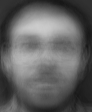

Image after NMF:


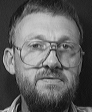

[[ 41.  42.  47. ...  34.  37.  37.]
 [ 41.  46.  43. ...  38.  36.  37.]
 [ 42.  45.  47. ...  35.  37.  38.]
 ...
 [ 43.  47.  47. ... 154. 137. 136.]
 [128. 128. 127. ... 151. 155. 138.]
 [135. 152. 190. ... 141. 156. 149.]]
Image Before NMF:
-------------------------------Number of image: 35
[[101. 101. 101. ... 103. 102. 102.]
 [101. 101. 101. ... 102. 103. 103.]
 [100. 101. 101. ... 102. 103. 103.]
 ...
 [138. 141. 143. ... 103. 102. 101.]
 [143. 144. 147. ... 105. 105. 105.]
 [145. 149. 152. ... 106. 105. 106.]]


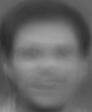

Image after NMF:


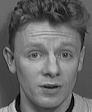

[[108. 105. 105. ... 105. 104. 103.]
 [107. 104. 107. ... 104. 103. 102.]
 [109. 105. 106. ... 104. 102. 100.]
 ...
 [182. 183. 176. ... 163. 143. 168.]
 [176. 182. 163. ... 166. 147. 164.]
 [179. 183. 156. ... 169. 147. 165.]]
Image Before NMF:
-------------------------------Number of image: 36
[[ 97.  97.  98. ... 101. 100. 100.]
 [ 97.  97.  97. ... 101. 101. 101.]
 [ 97.  97.  97. ... 100. 101. 101.]
 ...
 [ 88.  90.  92. ...  70.  70.  70.]
 [ 92.  92.  95. ...  71.  71.  72.]
 [ 95.  96.  99. ...  71.  70.  72.]]


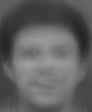

Image after NMF:


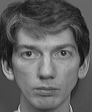

[[105. 107. 104. ... 105.  97. 105.]
 [107. 103. 107. ... 106. 101. 104.]
 [105. 105. 107. ... 103. 103. 100.]
 ...
 [ 75.  79.  75. ...  74.  77.  77.]
 [ 74.  80.  77. ...  72.  77.  77.]
 [ 77.  78.  77. ...  77.  76.  75.]]
Image Before NMF:
-------------------------------Number of image: 37
[[ 87.  88.  88. ...  83.  83.  82.]
 [ 88.  88.  89. ...  83.  83.  83.]
 [ 88.  88.  89. ...  83.  83.  83.]
 ...
 [166. 170. 171. ... 106. 104. 103.]
 [173. 176. 178. ... 110. 109. 108.]
 [176. 183. 184. ... 113. 111. 110.]]


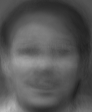

Image after NMF:


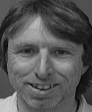

[[ 87.  93.  84. ...  78.  79.  77.]
 [ 91.  91.  91. ...  80.  80.  76.]
 [ 90.  88.  93. ...  81.  78.  80.]
 ...
 [201. 197. 198. ... 113. 122. 123.]
 [199. 196. 201. ... 119. 120. 125.]
 [199. 200. 201. ... 125. 117. 125.]]
Image Before NMF:
-------------------------------Number of image: 38
[[104. 105. 105. ... 102. 102. 101.]
 [104. 105. 106. ... 102. 102. 101.]
 [105. 105. 106. ... 102. 102. 101.]
 ...
 [103. 100. 101. ...  80.  79.  78.]
 [104. 104. 106. ...  83.  81.  81.]
 [105. 107. 108. ...  85.  83.  82.]]


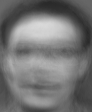

Image after NMF:


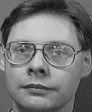

[[118. 114. 117. ... 112. 112. 105.]
 [115. 114. 114. ... 109. 112. 104.]
 [117. 115. 114. ... 110. 110. 112.]
 ...
 [ 97.  97.  95. ...  55.  53.  50.]
 [101.  97.  98. ...  60.  49.  54.]
 [ 96.  91.  98. ...  58.  54.  52.]]
Image Before NMF:
-------------------------------Number of image: 39
[[70. 69. 70. ... 71. 71. 72.]
 [70. 70. 69. ... 71. 70. 71.]
 [70. 69. 69. ... 71. 71. 71.]
 ...
 [51. 48. 47. ... 57. 56. 57.]
 [53. 51. 51. ... 58. 57. 56.]
 [56. 54. 55. ... 60. 58. 59.]]


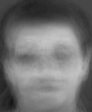

Image after NMF:


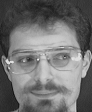

[[48. 45. 50. ... 57. 57. 54.]
 [46. 50. 47. ... 57. 52. 57.]
 [51. 47. 52. ... 54. 58. 52.]
 ...
 [46. 49. 47. ... 51. 47. 52.]
 [48. 48. 44. ... 45. 51. 46.]
 [50. 45. 45. ... 46. 50. 53.]]
Image Before NMF:
-------------------------------Number of image: 40
[[116. 116. 116. ... 111. 111. 111.]
 [116. 117. 117. ... 111. 111. 111.]
 [116. 117. 117. ... 111. 111. 111.]
 ...
 [137. 138. 140. ...  88.  87.  86.]
 [141. 142. 145. ...  90.  90.  90.]
 [143. 146. 148. ...  91.  90.  90.]]


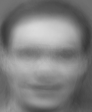

Image after NMF:


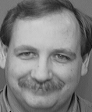

[[119. 120. 121. ... 114. 114. 115.]
 [122. 119. 121. ... 115. 113. 116.]
 [121. 120. 121. ... 113. 116. 112.]
 ...
 [142.  99. 118. ... 100. 101. 100.]
 [143.  97. 117. ... 101. 101. 104.]
 [141.  95. 111. ...  99. 100. 104.]]
Image Before NMF:
-------------------------------Number of image: 41
[[102. 102. 102. ...  97.  97.  97.]
 [102. 102. 102. ...  97.  97.  97.]
 [102. 102. 102. ...  97.  97.  97.]
 ...
 [166. 168. 169. ... 107. 104. 103.]
 [172. 173. 176. ... 110. 109. 109.]
 [175. 178. 181. ... 110. 109. 110.]]


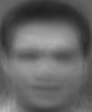

Image after NMF:


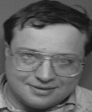

[[ 97.  99.  98. ...  87.  81.  86.]
 [101.  97. 100. ...  87.  80.  85.]
 [100. 100.  98. ...  85.  83.  84.]
 ...
 [ 56.  62.  66. ... 142. 143. 139.]
 [ 53.  68.  81. ... 138. 136. 139.]
 [ 68.  81.  91. ... 130. 119. 120.]]
Image Before NMF:
-------------------------------Number of image: 42
[[118. 118. 118. ... 121. 120. 120.]
 [118. 118. 118. ... 121. 121. 120.]
 [118. 118. 118. ... 120. 121. 121.]
 ...
 [ 64.  57.  62. ...  82.  83.  83.]
 [ 61.  57.  62. ...  81.  81.  82.]
 [ 60.  58.  61. ...  83.  83.  82.]]


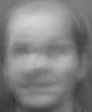

Image after NMF:


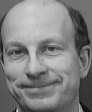

[[104. 105. 102. ... 113. 115. 113.]
 [102. 106. 100. ... 114. 114. 114.]
 [103. 104. 103. ... 117. 114. 113.]
 ...
 [ 77.  81.  87. ...  46.  53.  52.]
 [ 81.  80.  84. ...  17.  54.  51.]
 [ 85.  83.  83. ...  20.  28.  34.]]
Image Before NMF:
-------------------------------Number of image: 43
[[49. 49. 49. ... 46. 46. 46.]
 [49. 49. 49. ... 46. 45. 45.]
 [49. 49. 49. ... 46. 46. 45.]
 ...
 [74. 70. 71. ... 70. 69. 70.]
 [76. 76. 78. ... 74. 72. 69.]
 [78. 82. 82. ... 82. 80. 72.]]


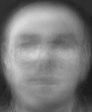

Image after NMF:


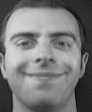

[[55. 52. 54. ... 39. 36. 37.]
 [54. 53. 48. ... 37. 38. 41.]
 [54. 53. 48. ... 36. 39. 38.]
 ...
 [41. 38. 36. ... 31. 34. 31.]
 [38. 35. 41. ... 35. 37. 30.]
 [40. 35. 38. ... 34. 35. 32.]]
Image Before NMF:
-------------------------------Number of image: 44
[[ 72.  73.  73. ...  63.  63.  63.]
 [ 72.  73.  73. ...  64.  63.  63.]
 [ 73.  73.  73. ...  64.  64.  62.]
 ...
 [ 94.  96.  95. ...  50.  49.  48.]
 [101. 102. 103. ...  53.  52.  51.]
 [104. 109. 109. ...  55.  54.  52.]]


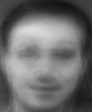

Image after NMF:


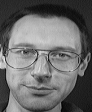

[[42. 40. 43. ... 34. 34. 37.]
 [39. 43. 36. ... 30. 40. 30.]
 [46. 35. 40. ... 33. 38. 35.]
 ...
 [52. 47. 34. ... 29. 19. 29.]
 [52. 49. 14. ... 23. 21. 22.]
 [63. 35. 14. ... 23. 23. 18.]]
Image Before NMF:
-------------------------------Number of image: 45
[[94. 95. 95. ... 91. 90. 90.]
 [94. 95. 95. ... 91. 90. 90.]
 [95. 94. 95. ... 90. 91. 90.]
 ...
 [28. 28. 27. ... 26. 27. 27.]
 [32. 31. 32. ... 27. 26. 26.]
 [34. 36. 35. ... 28. 28. 27.]]


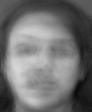

Image after NMF:


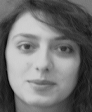

[[131. 128. 126. ... 118. 122. 119.]
 [127. 127. 127. ... 120. 117. 119.]
 [126. 125. 128. ... 122. 120. 119.]
 ...
 [ 57.  55.  51. ...  41.  43.  45.]
 [ 62.  57.  51. ...  44.  41.  39.]
 [ 57.  58.  55. ...  41.  40.  35.]]
Image Before NMF:
-------------------------------Number of image: 46
[[122. 122. 123. ... 116. 116. 115.]
 [123. 123. 123. ... 116. 116. 115.]
 [123. 123. 123. ... 116. 116. 115.]
 ...
 [111. 109. 112. ...  75.  74.  74.]
 [112. 111. 116. ...  74.  75.  77.]
 [113. 112. 116. ...  73.  74.  75.]]


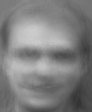

Image after NMF:


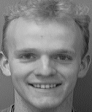

[[130. 132. 129. ... 119. 123. 124.]
 [132. 134. 131. ... 121. 121. 118.]
 [132. 131. 129. ... 121. 123. 123.]
 ...
 [106. 106. 111. ...  56.  49.  52.]
 [114. 116. 130. ...  54.  50.  54.]
 [109. 125. 129. ...  53.  50.  52.]]
Image Before NMF:
-------------------------------Number of image: 47
[[120. 120. 120. ... 125. 124. 123.]
 [120. 120. 120. ... 125. 125. 124.]
 [120. 120. 120. ... 124. 125. 125.]
 ...
 [ 58.  55.  59. ...  70.  72.  72.]
 [ 58.  55.  59. ...  69.  70.  71.]
 [ 58.  57.  60. ...  70.  70.  71.]]


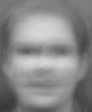

Image after NMF:


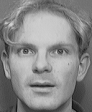

[[118. 123. 120. ... 113. 115. 113.]
 [120. 123. 119. ... 114. 114. 112.]
 [119. 124. 119. ... 115. 113. 114.]
 ...
 [ 94.  84.  90. ...  80.  85.  82.]
 [ 91.  88.  85. ...  81.  81.  82.]
 [ 75.  79.  83. ...  79.  81.  84.]]
Image Before NMF:
-------------------------------Number of image: 48
[[112. 112. 112. ... 106. 105. 105.]
 [112. 113. 113. ... 105. 105. 105.]
 [112. 113. 113. ... 106. 105. 105.]
 ...
 [141. 141. 144. ...  88.  87.  86.]
 [144. 145. 149. ...  90.  90.  90.]
 [146. 149. 152. ...  91.  91.  90.]]


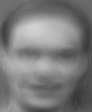

Image after NMF:


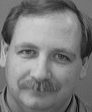

[[122. 124. 121. ... 116. 116. 116.]
 [118. 123. 122. ... 116. 115. 114.]
 [121. 125. 124. ... 116. 118. 115.]
 ...
 [ 68. 113. 131. ...  97.  85.  78.]
 [ 69. 106. 132. ...  91.  97.  88.]
 [ 64. 100. 126. ...  85.  98.  84.]]
Image Before NMF:
-------------------------------Number of image: 49
[[103. 103. 103. ... 108. 107. 106.]
 [103. 103. 103. ... 108. 108. 107.]
 [103. 103. 103. ... 107. 108. 108.]
 ...
 [ 88.  90.  95. ...  72.  74.  75.]
 [ 91.  92.  97. ...  73.  74.  75.]
 [ 90.  97.  99. ...  78.  78.  75.]]


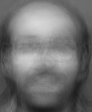

Image after NMF:


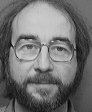

[[124. 121. 123. ... 111. 109. 112.]
 [126. 119. 125. ... 112. 109. 113.]
 [122. 122. 124. ... 112. 109. 113.]
 ...
 [119.  97. 130. ...  80.  80.  76.]
 [142.  95. 130. ...  78.  77.  77.]
 [132. 129. 132. ...  78.  76.  74.]]
Image Before NMF:
-------------------------------Number of image: 50
[[ 44.  45.  45. ...  39.  39.  38.]
 [ 45.  45.  45. ...  38.  39.  39.]
 [ 45.  45.  45. ...  39.  39.  38.]
 ...
 [187. 189. 190. ... 133. 128. 127.]
 [195. 198. 199. ... 138. 136. 133.]
 [199. 205. 208. ... 145. 142. 136.]]


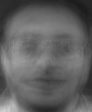

Image after NMF:


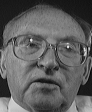

[[ 23.  24.  26. ...  18.  19.  19.]
 [ 25.  23.  25. ...  18.  21.  20.]
 [ 23.  24.  25. ...  18.  18.  22.]
 ...
 [203. 199. 203. ... 177. 182. 183.]
 [198. 193. 198. ... 182. 184. 186.]
 [200. 198. 195. ... 185. 187. 186.]]
Image Before NMF:
-------------------------------Number of image: 51
[[64. 64. 64. ... 69. 68. 69.]
 [64. 64. 64. ... 69. 69. 69.]
 [64. 64. 64. ... 68. 69. 69.]
 ...
 [47. 48. 49. ... 65. 64. 66.]
 [51. 49. 51. ... 64. 64. 65.]
 [55. 53. 56. ... 64. 63. 65.]]


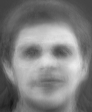

Image after NMF:


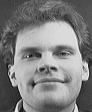

[[63. 67. 65. ... 78. 76. 79.]
 [68. 65. 65. ... 81. 72. 78.]
 [65. 63. 68. ... 77. 76. 76.]
 ...
 [53. 58. 51. ... 74. 65. 66.]
 [55. 56. 53. ... 68. 69. 81.]
 [62. 60. 66. ... 54. 61. 69.]]
Image Before NMF:
-------------------------------Number of image: 52
[[ 99.  99. 100. ... 104. 104. 103.]
 [100.  99.  99. ... 104. 105. 104.]
 [ 99. 100.  99. ... 103. 104. 105.]
 ...
 [ 80.  82.  87. ...  71.  73.  74.]
 [ 82.  83.  89. ...  72.  73.  73.]
 [ 82.  88.  91. ...  77.  77.  73.]]


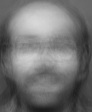

Image after NMF:


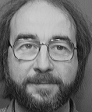

[[122. 122. 121. ... 117. 111. 113.]
 [125. 122. 124. ... 113. 112. 114.]
 [124. 122. 119. ... 116. 111. 114.]
 ...
 [107. 114. 129. ...  78.  83.  79.]
 [125.  93. 132. ...  81.  80.  80.]
 [125. 106. 112. ...  77.  77.  79.]]
Image Before NMF:
-------------------------------Number of image: 53
[[53. 53. 53. ... 48. 48. 48.]
 [53. 54. 53. ... 48. 48. 48.]
 [53. 53. 54. ... 48. 48. 47.]
 ...
 [60. 61. 61. ... 36. 35. 35.]
 [65. 66. 67. ... 38. 37. 36.]
 [67. 72. 71. ... 42. 41. 38.]]


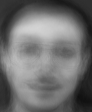

Image after NMF:


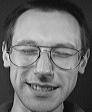

[[42. 44. 39. ... 39. 36. 36.]
 [42. 41. 42. ... 39. 40. 33.]
 [40. 47. 40. ... 42. 36. 33.]
 ...
 [71. 68. 65. ... 24. 20. 29.]
 [73. 70. 68. ... 21. 24. 28.]
 [74. 68. 70. ... 22. 28. 18.]]
Image Before NMF:
-------------------------------Number of image: 54
[[100. 100. 101. ... 101. 101. 101.]
 [100. 100. 100. ... 101. 101. 101.]
 [100. 100. 101. ... 101. 101. 101.]
 ...
 [133. 135. 137. ...  97.  96.  95.]
 [138. 139. 142. ...  99.  99.  99.]
 [141. 143. 146. ... 100.  99. 100.]]


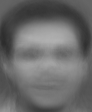

Image after NMF:


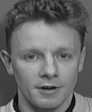

[[103. 102. 104. ... 103. 100. 101.]
 [105. 104. 106. ... 101. 102. 105.]
 [105. 101. 104. ... 101. 100. 104.]
 ...
 [157. 175. 177. ... 134. 152. 167.]
 [156. 177. 184. ... 137. 154. 173.]
 [149. 181. 187. ... 139. 152. 178.]]
Image Before NMF:
-------------------------------Number of image: 55
[[101. 102. 102. ...  97.  97.  97.]
 [101. 102. 102. ...  98.  97.  96.]
 [102. 102. 102. ...  97.  98.  96.]
 ...
 [ 60.  60.  59. ...  43.  44.  43.]
 [ 64.  64.  65. ...  45.  44.  44.]
 [ 67.  71.  70. ...  47.  46.  45.]]


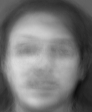

Image after NMF:


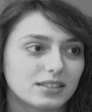

[[128. 125. 125. ... 115. 115. 118.]
 [125. 127. 124. ... 118. 116. 116.]
 [128. 126. 125. ... 116. 119. 115.]
 ...
 [ 47.  42.  37. ...  43.  27.  19.]
 [ 48.  44.  35. ...  36.  36.  20.]
 [ 47.  43.  41. ...  45.  31.  30.]]
Image Before NMF:
-------------------------------Number of image: 56
[[122. 122. 122. ... 120. 120. 120.]
 [122. 122. 122. ... 121. 120. 120.]
 [122. 122. 122. ... 120. 121. 120.]
 ...
 [ 66.  64.  66. ...  49.  50.  50.]
 [ 67.  66.  69. ...  49.  50.  51.]
 [ 68.  69.  70. ...  50.  49.  51.]]


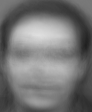

Image after NMF:


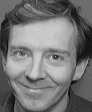

[[109. 111. 108. ... 110. 108. 109.]
 [111. 106. 110. ... 107. 107. 109.]
 [111. 108. 111. ... 110. 109. 111.]
 ...
 [ 72.  70.  79. ...  59.  60.  51.]
 [ 73.  70.  79. ...  57.  56.  52.]
 [ 71.  71.  84. ...  52.  55.  48.]]
Image Before NMF:
-------------------------------Number of image: 57
[[111. 111. 111. ... 105. 105. 105.]
 [111. 111. 111. ... 105. 105. 105.]
 [111. 111. 111. ... 106. 106. 105.]
 ...
 [113. 118. 118. ...  60.  60.  59.]
 [120. 121. 124. ...  61.  61.  63.]
 [123. 127. 129. ...  59.  60.  62.]]


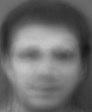

Image after NMF:


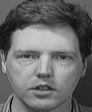

[[105. 109. 105. ... 104. 100. 101.]
 [108. 102. 105. ... 104.  98.  97.]
 [104. 106. 105. ... 101.  98. 101.]
 ...
 [148. 111.  83. ...  71.  64.  64.]
 [135.  86. 112. ...  49.  70.  73.]
 [113.  84. 125. ...  81.  57.  49.]]
Image Before NMF:
-------------------------------Number of image: 58
[[73. 72. 73. ... 75. 75. 76.]
 [73. 73. 72. ... 76. 75. 76.]
 [73. 72. 73. ... 75. 76. 76.]
 ...
 [70. 63. 63. ... 88. 86. 87.]
 [70. 67. 68. ... 91. 88. 86.]
 [74. 71. 72. ... 94. 91. 90.]]


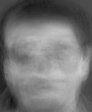

Image after NMF:


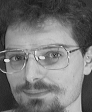

[[52. 41. 48. ... 55. 54. 54.]
 [49. 46. 48. ... 53. 56. 48.]
 [53. 46. 50. ... 54. 54. 53.]
 ...
 [47. 38. 48. ... 40. 53. 45.]
 [44. 43. 49. ... 43. 49. 47.]
 [51. 76. 83. ... 44. 43. 46.]]
Image Before NMF:
-------------------------------Number of image: 59
[[ 43.  44.  43. ...  37.  37.  37.]
 [ 43.  44.  44. ...  37.  38.  38.]
 [ 43.  44.  44. ...  38.  37.  37.]
 ...
 [200. 202. 203. ... 143. 138. 137.]
 [207. 211. 212. ... 149. 146. 143.]
 [211. 218. 221. ... 156. 153. 147.]]


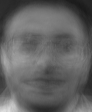

Image after NMF:


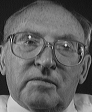

[[ 24.  26.  22. ...  19.  22.  17.]
 [ 27.  23.  27. ...  18.  24.  19.]
 [ 23.  28.  26. ...  23.  22.  21.]
 ...
 [198. 196. 192. ... 186. 189. 190.]
 [200. 198. 194. ... 185. 185. 181.]
 [201. 199. 196. ... 184. 180. 178.]]
Image Before NMF:
-------------------------------Number of image: 60
[[50. 50. 50. ... 45. 45. 45.]
 [50. 50. 50. ... 45. 44. 45.]
 [50. 50. 50. ... 45. 45. 44.]
 ...
 [81. 82. 83. ... 51. 50. 50.]
 [86. 88. 89. ... 53. 52. 51.]
 [89. 94. 94. ... 57. 56. 53.]]


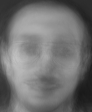

Image after NMF:


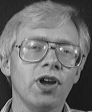

[[ 43.  39.  36. ...  37.  27.  36.]
 [ 38.  39.  40. ...  32.  32.  33.]
 [ 39.  34.  40. ...  30.  36.  33.]
 ...
 [ 22.  96. 164. ...  29.  26.  28.]
 [ 19. 186. 182. ...  38.  38.  31.]
 [112. 183. 208. ... 154. 155. 141.]]
Image Before NMF:
-------------------------------Number of image: 61
[[98. 98. 98. ... 94. 95. 96.]
 [98. 99. 97. ... 95. 94. 95.]
 [99. 98. 98. ... 95. 96. 94.]
 ...
 [20. 19. 17. ...  6.  7.  8.]
 [23. 22. 22. ...  6.  6.  7.]
 [26. 25. 25. ...  5.  6.  7.]]


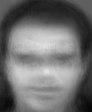

Image after NMF:


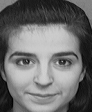

[[133. 135. 137. ... 129. 131. 134.]
 [136. 134. 134. ... 130. 130. 132.]
 [136. 135. 134. ... 130. 130. 129.]
 ...
 [ 18.  18.  24. ...  16.  17.  19.]
 [ 25.  21.  23. ...  17.  18.  19.]
 [ 22.  26.  24. ...  16.  19.  17.]]
Image Before NMF:
-------------------------------Number of image: 62
[[ 55.  56.  56. ...  53.  53.  52.]
 [ 56.  56.  57. ...  53.  53.  53.]
 [ 56.  56.  57. ...  53.  53.  53.]
 ...
 [118. 126. 126. ...  73.  72.  71.]
 [129. 134. 134. ...  77.  76.  74.]
 [134. 145. 144. ...  84.  82.  76.]]


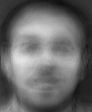

Image after NMF:


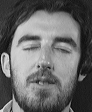

[[ 50.  46.  49. ...  43.  41.  36.]
 [ 46.  48.  52. ...  38.  44.  43.]
 [ 48.  49.  53. ...  37.  45.  38.]
 ...
 [ 62. 170. 224. ...  38.  34.  37.]
 [211. 214. 222. ...  31.  33.  32.]
 [210. 210. 218. ...  33.  33.  41.]]
Image Before NMF:
-------------------------------Number of image: 63
[[117. 117. 118. ... 116. 116. 117.]
 [118. 117. 117. ... 116. 116. 117.]
 [117. 117. 117. ... 117. 117. 117.]
 ...
 [128. 132. 133. ...  78.  78.  78.]
 [134. 135. 138. ...  78.  79.  81.]
 [136. 139. 142. ...  78.  79.  81.]]


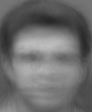

Image after NMF:


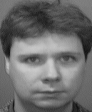

[[120. 119. 118. ... 128. 125. 124.]
 [119. 115. 119. ... 125. 125. 125.]
 [117. 120. 119. ... 123. 128. 124.]
 ...
 [110. 101. 106. ...  87.  91.  91.]
 [107.  98. 105. ...  82.  88.  88.]
 [119. 104. 111. ...  63.  73.  80.]]
Image Before NMF:
-------------------------------Number of image: 64
[[112. 113. 113. ... 110. 110. 110.]
 [112. 113. 113. ... 110. 110. 110.]
 [113. 113. 113. ... 110. 110. 110.]
 ...
 [129. 127. 129. ... 104. 103. 102.]
 [131. 131. 134. ... 106. 105. 105.]
 [133. 135. 137. ... 107. 106. 106.]]


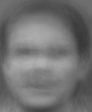

Image after NMF:


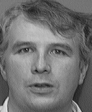

[[117. 122. 120. ... 114. 111. 118.]
 [117. 120. 121. ... 116. 113. 115.]
 [122. 123. 121. ... 116. 114. 114.]
 ...
 [207. 190. 193. ...  82.  75.  77.]
 [171. 190. 202. ...  78.  76.  77.]
 [157. 200. 203. ...  76.  78.  71.]]
Image Before NMF:
-------------------------------Number of image: 65
[[110. 110. 111. ... 107. 107. 107.]
 [110. 111. 111. ... 108. 107. 107.]
 [111. 111. 111. ... 107. 107. 107.]
 ...
 [ 75.  71.  74. ...  58.  59.  58.]
 [ 74.  73.  77. ...  59.  59.  59.]
 [ 74.  75.  76. ...  60.  60.  59.]]


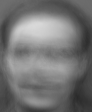

Image after NMF:


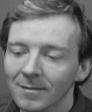

[[105. 102. 108. ... 105. 106. 105.]
 [101. 103.  99. ... 106. 108. 104.]
 [106. 101. 107. ... 103. 110. 107.]
 ...
 [ 79.  74.  70. ...  43.  36.  43.]
 [ 73.  69.  73. ...  37.  38.  41.]
 [ 68.  73.  71. ...  42.  35.  37.]]
Image Before NMF:
-------------------------------Number of image: 66
[[104. 104. 104. ... 106. 105. 105.]
 [104. 104. 104. ... 106. 106. 105.]
 [104. 104. 104. ... 105. 106. 106.]
 ...
 [ 78.  76.  80. ...  78.  79.  80.]
 [ 79.  79.  83. ...  79.  79.  79.]
 [ 80.  83.  85. ...  84.  83.  80.]]


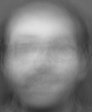

Image after NMF:


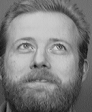

[[112. 109. 111. ... 112. 110. 113.]
 [109. 111. 112. ... 114. 112. 111.]
 [109. 111. 111. ... 110. 113. 110.]
 ...
 [ 93.  79.  72. ...  75.  75.  75.]
 [ 96.  78.  67. ...  71.  77.  73.]
 [ 96.  81.  60. ...  74.  75.  74.]]
Image Before NMF:
-------------------------------Number of image: 67
[[100. 101. 101. ...  97.  97.  97.]
 [100. 101. 101. ...  98.  97.  96.]
 [101. 100. 101. ...  97.  98.  96.]
 ...
 [ 21.  20.  19. ...  23.  25.  24.]
 [ 24.  22.  23. ...  23.  23.  24.]
 [ 26.  27.  26. ...  25.  24.  24.]]


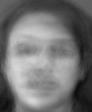

Image after NMF:


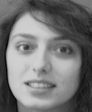

[[126. 130. 131. ... 121. 121. 121.]
 [128. 127. 132. ... 121. 120. 120.]
 [129. 127. 131. ... 120. 122. 120.]
 ...
 [ 47.  46.  48. ...  34.  44.  45.]
 [ 48.  46.  44. ...  40.  49.  41.]
 [ 52.  46.  48. ...  43.  51.  48.]]
Image Before NMF:
-------------------------------Number of image: 68
[[59. 59. 59. ... 62. 61. 62.]
 [59. 59. 59. ... 62. 62. 61.]
 [59. 59. 59. ... 61. 62. 61.]
 ...
 [39. 34. 34. ... 59. 58. 59.]
 [39. 37. 37. ... 61. 59. 58.]
 [41. 40. 40. ... 65. 62. 60.]]


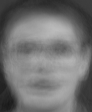

Image after NMF:


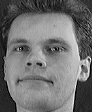

[[46. 41. 45. ... 49. 39. 51.]
 [47. 45. 47. ... 45. 50. 45.]
 [46. 48. 46. ... 50. 48. 49.]
 ...
 [40. 41. 38. ... 39. 37. 38.]
 [38. 43. 45. ... 41. 35. 40.]
 [36. 40. 38. ... 37. 34. 43.]]
Image Before NMF:
-------------------------------Number of image: 69
[[94. 94. 94. ... 90. 90. 90.]
 [93. 95. 95. ... 91. 90. 89.]
 [95. 94. 95. ... 90. 91. 89.]
 ...
 [62. 62. 61. ... 50. 51. 50.]
 [67. 67. 67. ... 54. 52. 51.]
 [70. 74. 72. ... 57. 55. 53.]]


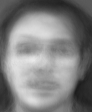

Image after NMF:


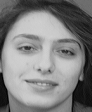

[[114. 115. 115. ... 110. 106. 109.]
 [114. 114. 112. ... 110. 111. 106.]
 [115. 112. 112. ... 110. 109. 107.]
 ...
 [ 54.  57.  59. ...  76.  72.  71.]
 [ 62.  68.  66. ...  78.  78.  72.]
 [ 68.  74.  76. ...  78.  85.  77.]]
Image Before NMF:
-------------------------------Number of image: 70
[[ 90.  90.  91. ...  91.  91.  91.]
 [ 90.  90.  91. ...  91.  91.  91.]
 [ 90.  90.  91. ...  91.  91.  91.]
 ...
 [136. 143. 143. ...  82.  81.  80.]
 [144. 147. 149. ...  85.  84.  85.]
 [147. 154. 155. ...  86.  85.  85.]]


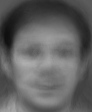

Image after NMF:


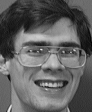

[[109. 110. 113. ... 108. 112. 107.]
 [111. 112. 112. ... 108. 108. 107.]
 [112. 111. 112. ... 108. 108. 108.]
 ...
 [ 94. 101. 101. ...  57.  51.  53.]
 [ 99.  97. 102. ...  49.  51.  57.]
 [ 97.  95. 101. ...  49.  52.  51.]]
Image Before NMF:
-------------------------------Number of image: 71
[[53. 53. 53. ... 56. 56. 56.]
 [53. 53. 53. ... 56. 56. 56.]
 [53. 53. 53. ... 56. 56. 57.]
 ...
 [44. 43. 43. ... 60. 59. 60.]
 [47. 45. 46. ... 60. 59. 59.]
 [51. 49. 51. ... 61. 59. 60.]]


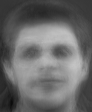

Image after NMF:


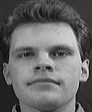

[[48. 42. 52. ... 58. 52. 54.]
 [46. 46. 47. ... 62. 50. 54.]
 [44. 49. 48. ... 55. 58. 55.]
 ...
 [34. 32. 31. ... 52. 51. 44.]
 [33. 36. 32. ... 48. 52. 49.]
 [32. 35. 29. ... 46. 51. 48.]]
Image Before NMF:
-------------------------------Number of image: 72
[[110. 110. 110. ... 116. 116. 115.]
 [110. 110. 110. ... 116. 116. 116.]
 [110. 110. 110. ... 115. 116. 117.]
 ...
 [ 86.  87.  91. ...  72.  74.  74.]
 [ 87.  87.  91. ...  72.  73.  75.]
 [ 88.  90.  93. ...  73.  73.  74.]]


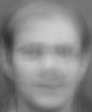

Image after NMF:


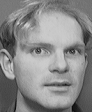

[[121. 119. 121. ... 112. 116. 111.]
 [118. 122. 121. ... 112. 116. 113.]
 [121. 120. 120. ... 113. 114. 114.]
 ...
 [ 87.  76.  74. ...  83.  83.  82.]
 [ 81.  71.  71. ...  83.  83.  82.]
 [ 82.  65.  66. ...  83.  80.  86.]]
Image Before NMF:
-------------------------------Number of image: 73
[[ 87.  88.  88. ...  83.  83.  83.]
 [ 88.  88.  88. ...  83.  83.  84.]
 [ 88.  88.  88. ...  84.  83.  83.]
 ...
 [154. 158. 159. ...  89.  87.  86.]
 [160. 163. 165. ...  92.  91.  92.]
 [163. 168. 171. ...  92.  92.  92.]]


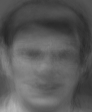

Image after NMF:


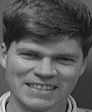

[[ 93.  92.  98. ... 101.  99. 102.]
 [ 96.  94.  92. ... 102.  99. 102.]
 [ 93.  92.  94. ...  99. 101. 100.]
 ...
 [205. 169. 187. ...  84.  56.  61.]
 [205. 186. 170. ... 118. 111. 113.]
 [203. 196. 179. ... 118. 119. 130.]]
Image Before NMF:
-------------------------------Number of image: 74
[[ 49.  49.  49. ...  47.  47.  47.]
 [ 49.  49.  50. ...  47.  47.  47.]
 [ 49.  49.  50. ...  47.  47.  47.]
 ...
 [128. 129. 129. ... 103. 100. 100.]
 [134. 136. 137. ... 108. 105. 103.]
 [139. 144. 145. ... 113. 110. 106.]]


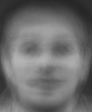

Image after NMF:


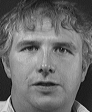

[[ 45.  38.  40. ...  38.  36.  42.]
 [ 44.  41.  40. ...  38.  37.  39.]
 [ 45.  35.  41. ...  37.  35.  40.]
 ...
 [201. 180. 199. ...  40.  41.  41.]
 [185. 188. 210. ...  21.  41.  41.]
 [184. 210. 194. ... 135.  24.  36.]]
Image Before NMF:
-------------------------------Number of image: 75
[[72. 71. 72. ... 71. 71. 72.]
 [72. 72. 71. ... 72. 71. 71.]
 [72. 71. 72. ... 71. 72. 71.]
 ...
 [44. 41. 40. ... 51. 50. 51.]
 [46. 43. 44. ... 52. 51. 51.]
 [49. 47. 47. ... 53. 52. 52.]]


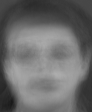

Image after NMF:


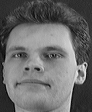

[[46. 45. 47. ... 47. 46. 48.]
 [45. 48. 42. ... 46. 46. 47.]
 [46. 48. 45. ... 49. 46. 49.]
 ...
 [42. 38. 42. ... 48. 46. 40.]
 [41. 43. 41. ... 51. 48. 44.]
 [40. 37. 43. ... 46. 50. 50.]]
Image Before NMF:
-------------------------------Number of image: 76
[[ 60.  60.  60. ...  58.  57.  57.]
 [ 60.  60.  60. ...  58.  58.  57.]
 [ 60.  60.  60. ...  58.  58.  57.]
 ...
 [ 88.  87.  89. ...  70.  70.  71.]
 [ 91.  94.  96. ...  74.  73.  71.]
 [ 94. 100. 100. ...  83.  81.  73.]]


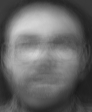

Image after NMF:


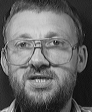

[[ 51.  46.  48. ...  33.  40.  39.]
 [ 46.  50.  44. ...  37.  43.  38.]
 [ 48.  47.  45. ...  38.  38.  37.]
 ...
 [ 46.  31.  72. ... 104. 114. 121.]
 [ 91. 100. 176. ... 145. 122. 121.]
 [148. 197. 197. ... 196. 173. 110.]]
Image Before NMF:
-------------------------------Number of image: 77
[[132. 132. 132. ... 126. 126. 125.]
 [132. 133. 132. ... 126. 126. 125.]
 [133. 133. 132. ... 126. 126. 125.]
 ...
 [109. 102. 106. ...  87.  87.  87.]
 [107. 104. 109. ...  87.  88.  89.]
 [107. 105. 108. ...  87.  87.  88.]]


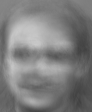

Image after NMF:


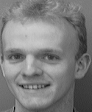

[[133. 132. 131. ... 124. 123. 120.]
 [133. 130. 130. ... 123. 123. 123.]
 [131. 132. 130. ... 123. 122. 125.]
 ...
 [105.  99. 106. ...  52.  53.  55.]
 [106. 101. 107. ...  51.  54.  52.]
 [108. 112. 116. ...  53.  48.  58.]]
Image Before NMF:
-------------------------------Number of image: 78
[[103. 104. 104. ... 103. 103. 103.]
 [103. 104. 104. ... 104. 103. 102.]
 [104. 103. 104. ... 103. 104. 102.]
 ...
 [ 19.  16.  16. ...  27.  29.  29.]
 [ 21.  19.  20. ...  29.  28.  27.]
 [ 23.  25.  23. ...  32.  30.  29.]]


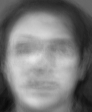

Image after NMF:


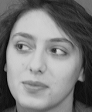

[[116. 116. 117. ... 115. 110. 114.]
 [116. 114. 116. ... 113. 110. 112.]
 [116. 112. 117. ... 114. 111. 110.]
 ...
 [ 23.  22.  28. ...  74.  69.  61.]
 [ 27.  29.  29. ...  76.  76.  66.]
 [ 28.  27.  38. ...  83.  76.  77.]]
Image Before NMF:
-------------------------------Number of image: 79
[[148. 147. 148. ... 150. 150. 150.]
 [148. 147. 147. ... 150. 150. 151.]
 [147. 147. 147. ... 150. 150. 151.]
 ...
 [166. 167. 170. ... 120. 118. 119.]
 [170. 171. 174. ... 121. 121. 122.]
 [173. 174. 179. ... 120. 120. 123.]]


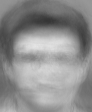

Image after NMF:


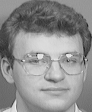

[[155. 154. 153. ... 150. 151. 150.]
 [152. 154. 151. ... 151. 150. 149.]
 [155. 154. 154. ... 151. 150. 151.]
 ...
 [133. 140. 150. ... 111. 111. 110.]
 [161. 145. 141. ... 115. 110. 111.]
 [165. 141. 156. ... 113. 110. 111.]]
Image Before NMF:
-------------------------------Number of image: 80
[[ 59.  59.  59. ...  59.  59.  58.]
 [ 59.  59.  59. ...  58.  59.  59.]
 [ 59.  59.  59. ...  59.  59.  59.]
 ...
 [113. 115. 120. ...  81.  80.  81.]
 [117. 121. 125. ...  83.  83.  82.]
 [119. 127. 130. ...  93.  92.  84.]]


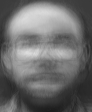

Image after NMF:


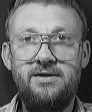

[[ 50.  49.  50. ...  41.  42.  38.]
 [ 55.  46.  50. ...  39.  39.  36.]
 [ 50.  49.  49. ...  37.  42.  38.]
 ...
 [183. 165. 145. ... 118. 114. 105.]
 [133. 148. 155. ... 120. 118. 116.]
 [144. 150. 169. ... 159. 111. 117.]]
Image Before NMF:
-------------------------------Number of image: 81
[[ 50.  50.  50. ...  45.  45.  45.]
 [ 50.  50.  50. ...  45.  45.  45.]
 [ 50.  50.  50. ...  45.  45.  45.]
 ...
 [165. 158. 160. ... 147. 141. 142.]
 [166. 166. 168. ... 151. 149. 145.]
 [170. 170. 173. ... 158. 154. 149.]]


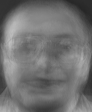

Image after NMF:


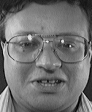

[[ 37.  36.  34. ...  30.  33.  34.]
 [ 44.  35.  40. ...  34.  31.  38.]
 [ 40.  35.  42. ...  30.  33.  35.]
 ...
 [215. 167. 154. ... 201. 211. 166.]
 [204. 159. 164. ... 186. 212. 189.]
 [189. 155. 179. ... 160. 207. 210.]]
Image Before NMF:
-------------------------------Number of image: 82
[[77. 76. 77. ... 78. 78. 79.]
 [76. 77. 76. ... 78. 78. 78.]
 [77. 76. 77. ... 78. 79. 78.]
 ...
 [54. 50. 49. ... 64. 63. 64.]
 [56. 53. 54. ... 65. 64. 63.]
 [59. 57. 57. ... 68. 65. 65.]]


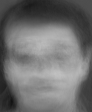

Image after NMF:


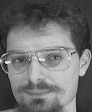

[[ 47.  43.  48. ...  50.  53.  55.]
 [ 47.  46.  48. ...  52.  51.  52.]
 [ 46.  49.  45. ...  54.  52.  55.]
 ...
 [ 47.  47.  42. ...  47.  48.  49.]
 [ 44.  57.  59. ...  49.  50.  50.]
 [102. 115. 122. ...  45.  49.  50.]]
Image Before NMF:
-------------------------------Number of image: 83
[[ 47.  47.  47. ...  46.  46.  46.]
 [ 47.  47.  47. ...  46.  46.  46.]
 [ 47.  47.  47. ...  46.  47.  46.]
 ...
 [ 86.  93.  93. ...  54.  54.  54.]
 [ 95. 100. 101. ...  58.  57.  55.]
 [ 99. 109. 109. ...  66.  64.  57.]]


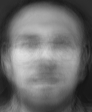

Image after NMF:


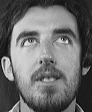

[[51. 48. 43. ... 43. 42. 38.]
 [44. 48. 46. ... 43. 42. 36.]
 [51. 45. 50. ... 40. 38. 43.]
 ...
 [60. 48. 56. ... 26. 28. 35.]
 [52. 50. 55. ... 31. 26. 32.]
 [47. 50. 47. ... 29. 28. 32.]]
Image Before NMF:
-------------------------------Number of image: 84
[[128. 129. 129. ... 123. 123. 123.]
 [129. 129. 129. ... 123. 123. 123.]
 [129. 129. 129. ... 123. 123. 123.]
 ...
 [110. 105. 108. ...  89.  88.  88.]
 [109. 106. 112. ...  89.  90.  90.]
 [109. 108. 111. ...  89.  90.  90.]]


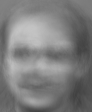

Image after NMF:


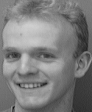

[[131. 133. 128. ... 124. 122. 126.]
 [130. 133. 131. ... 121. 123. 124.]
 [130. 134. 130. ... 122. 121. 121.]
 ...
 [104. 104. 102. ...  55.  50.  57.]
 [104. 102. 107. ...  57.  52.  59.]
 [111. 113. 117. ...  54.  53.  56.]]
Image Before NMF:
-------------------------------Number of image: 85
[[148. 147. 148. ... 147. 147. 148.]
 [148. 148. 147. ... 148. 147. 148.]
 [148. 148. 148. ... 148. 148. 148.]
 ...
 [169. 169. 172. ... 118. 117. 117.]
 [174. 174. 177. ... 120. 120. 121.]
 [176. 177. 181. ... 120. 120. 122.]]


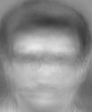

Image after NMF:


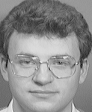

[[156. 158. 155. ... 153. 149. 152.]
 [156. 155. 156. ... 152. 152. 152.]
 [155. 156. 155. ... 150. 152. 148.]
 ...
 [133. 142. 151. ... 113. 113. 112.]
 [158. 198. 216. ... 111. 111. 112.]
 [219. 219. 217. ... 113. 110. 108.]]
Image Before NMF:
-------------------------------Number of image: 86
[[38. 38. 38. ... 33. 34. 34.]
 [38. 39. 39. ... 34. 33. 33.]
 [39. 39. 39. ... 34. 34. 33.]
 ...
 [75. 76. 76. ... 49. 48. 48.]
 [79. 82. 83. ... 52. 51. 49.]
 [82. 87. 87. ... 57. 56. 51.]]


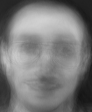

Image after NMF:


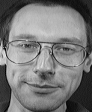

[[46. 42. 46. ... 36. 37. 43.]
 [43. 45. 44. ... 46. 35. 36.]
 [42. 40. 47. ... 39. 39. 39.]
 ...
 [62. 49. 53. ... 25. 26. 25.]
 [60. 55. 48. ... 22. 23. 27.]
 [62. 52. 52. ... 39. 22. 14.]]
Image Before NMF:
-------------------------------Number of image: 87
[[ 90.  90.  91. ...  87.  86.  87.]
 [ 90.  91.  91. ...  87.  86.  87.]
 [ 91.  90.  91. ...  87.  87.  86.]
 ...
 [137. 139. 139. ...  89.  87.  87.]
 [143. 145. 146. ...  93.  91.  91.]
 [147. 150. 152. ...  94.  92.  92.]]


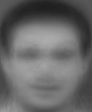

Image after NMF:


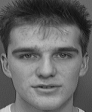

[[106. 106. 110. ... 104. 105. 103.]
 [107. 106. 108. ... 102. 104. 102.]
 [107. 107. 107. ... 101. 104. 103.]
 ...
 [132. 177. 200. ...  69.  69.  69.]
 [185. 198. 203. ...  69.  68.  68.]
 [188. 199. 204. ...  69.  69.  68.]]
Image Before NMF:
-------------------------------Number of image: 88
[[106. 105. 106. ... 108. 108. 108.]
 [106. 106. 105. ... 108. 108. 108.]
 [106. 106. 106. ... 108. 109. 109.]
 ...
 [ 98. 102. 103. ...  66.  66.  66.]
 [104. 104. 107. ...  66.  67.  68.]
 [106. 109. 111. ...  66.  66.  68.]]


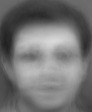

Image after NMF:


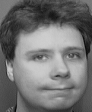

[[122. 121. 121. ... 119. 120. 121.]
 [122. 124. 124. ... 119. 120. 122.]
 [122. 123. 122. ... 118. 121. 122.]
 ...
 [ 73.  75.  75. ...  83.  83.  85.]
 [ 74.  72.  75. ...  78.  83.  79.]
 [ 74.  73.  72. ...  78.  78.  80.]]
Image Before NMF:
-------------------------------Number of image: 89
[[ 44.  44.  44. ...  38.  38.  38.]
 [ 44.  44.  45. ...  38.  38.  38.]
 [ 44.  44.  45. ...  39.  38.  38.]
 ...
 [198. 198. 200. ... 145. 140. 140.]
 [203. 207. 208. ... 152. 149. 145.]
 [207. 213. 216. ... 159. 155. 149.]]


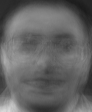

Image after NMF:


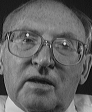

[[ 28.  25.  27. ...  20.  22.  23.]
 [ 24.  27.  27. ...  18.  24.  22.]
 [ 28.  26.  27. ...  24.  22.  23.]
 ...
 [188. 180. 171. ... 183. 188. 188.]
 [190. 185. 173. ... 185. 188. 190.]
 [194. 186. 178. ... 187. 187. 190.]]
Image Before NMF:
-------------------------------Number of image: 90
[[108. 108. 109. ... 105. 105. 104.]
 [108. 109. 109. ... 105. 105. 105.]
 [109. 109. 109. ... 105. 105. 105.]
 ...
 [114. 119. 120. ...  65.  65.  64.]
 [121. 123. 125. ...  66.  66.  68.]
 [125. 129. 131. ...  64.  65.  67.]]


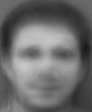

Image after NMF:


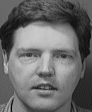

[[106. 104. 104. ... 100.  94. 102.]
 [108. 106. 105. ...  97.  98. 101.]
 [104. 106. 101. ... 101.  96. 101.]
 ...
 [126. 125. 151. ...  43.  40.  38.]
 [ 99. 119. 142. ...  61.  59.  54.]
 [115. 152. 106. ...  74.  66.  68.]]
Image Before NMF:
-------------------------------Number of image: 91
[[106. 105. 106. ... 108. 108. 108.]
 [106. 105. 105. ... 108. 108. 108.]
 [106. 106. 105. ... 108. 108. 109.]
 ...
 [108. 110. 114. ...  81.  81.  82.]
 [111. 111. 116. ...  81.  82.  83.]
 [111. 114. 118. ...  82.  83.  83.]]


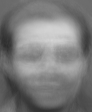

Image after NMF:


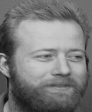

[[108. 108. 111. ... 107. 112. 108.]
 [111. 111. 111. ... 113. 110. 109.]
 [112. 111. 110. ... 112. 111. 109.]
 ...
 [ 98.  94.  88. ...  69.  67.  68.]
 [ 99.  92.  85. ...  63.  74.  73.]
 [101.  87.  97. ...  64.  71.  75.]]
Image Before NMF:
-------------------------------Number of image: 92
[[ 94.  94.  94. ...  90.  90.  90.]
 [ 94.  94.  94. ...  90.  90.  90.]
 [ 94.  94.  94. ...  91.  91.  90.]
 ...
 [116. 116. 117. ...  75.  74.  73.]
 [119. 120. 122. ...  77.  77.  77.]
 [120. 122. 124. ...  77.  77.  78.]]


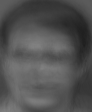

Image after NMF:


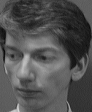

[[ 98. 103.  98. ...  93.  92.  95.]
 [104. 100. 104. ...  93.  95.  93.]
 [102. 100.  99. ...  97.  93.  93.]
 ...
 [ 95.  88.  94. ...  50.  50.  50.]
 [ 93.  91.  95. ...  55.  49.  54.]
 [ 94.  93.  96. ...  57.  50.  48.]]
Image Before NMF:
-------------------------------Number of image: 93
[[ 45.  46.  46. ...  41.  41.  40.]
 [ 46.  46.  46. ...  40.  41.  41.]
 [ 45.  46.  46. ...  41.  41.  41.]
 ...
 [184. 185. 187. ... 136. 131. 131.]
 [190. 193. 195. ... 141. 139. 136.]
 [193. 199. 202. ... 148. 145. 139.]]


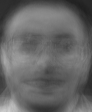

Image after NMF:


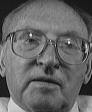

[[ 28.  25.  28. ...  23.  21.  24.]
 [ 29.  27.  25. ...  22.  22.  20.]
 [ 29.  27.  24. ...  24.  20.  23.]
 ...
 [202. 200. 190. ... 168. 171. 175.]
 [201. 201. 192. ... 178. 173. 176.]
 [193. 202. 189. ... 182. 183. 178.]]
Image Before NMF:
-------------------------------Number of image: 94
[[124. 125. 125. ... 122. 121. 121.]
 [125. 125. 125. ... 122. 121. 121.]
 [125. 125. 125. ... 122. 122. 121.]
 ...
 [116. 117. 118. ...  78.  78.  77.]
 [120. 120. 123. ...  79.  79.  80.]
 [122. 124. 126. ...  79.  79.  80.]]


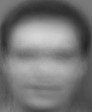

Image after NMF:


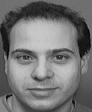

[[111. 114. 112. ... 112. 108. 110.]
 [112. 113. 111. ... 112. 111. 111.]
 [113. 109. 112. ... 109. 111. 108.]
 ...
 [141. 135. 133. ...  84.  84.  84.]
 [137. 135. 136. ...  89.  90.  88.]
 [138. 135. 138. ...  88.  86.  92.]]
Image Before NMF:
-------------------------------Number of image: 95
[[62. 62. 62. ... 63. 63. 64.]
 [62. 62. 62. ... 64. 63. 63.]
 [62. 61. 62. ... 63. 64. 64.]
 ...
 [32. 31. 30. ... 46. 46. 46.]
 [35. 33. 33. ... 47. 46. 46.]
 [37. 36. 37. ... 48. 47. 47.]]


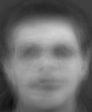

Image after NMF:


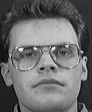

[[45. 45. 48. ... 53. 51. 54.]
 [46. 42. 49. ... 53. 52. 55.]
 [44. 48. 45. ... 48. 58. 48.]
 ...
 [34. 32. 33. ... 47. 42. 38.]
 [37. 29. 34. ... 59. 52. 47.]
 [37. 31. 36. ... 76. 79. 70.]]
Image Before NMF:
-------------------------------Number of image: 96
[[53. 52. 53. ... 58. 57. 58.]
 [53. 53. 52. ... 58. 58. 58.]
 [53. 53. 53. ... 57. 58. 58.]
 ...
 [46. 45. 45. ... 65. 63. 65.]
 [49. 47. 48. ... 65. 64. 64.]
 [53. 51. 53. ... 66. 64. 65.]]


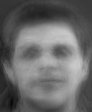

Image after NMF:


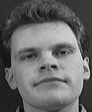

[[48. 43. 51. ... 55. 56. 58.]
 [46. 46. 44. ... 59. 58. 59.]
 [44. 44. 46. ... 58. 59. 59.]
 ...
 [30. 35. 34. ... 41. 39. 53.]
 [29. 37. 33. ... 41. 38. 44.]
 [33. 34. 35. ... 45. 42. 39.]]
Image Before NMF:
-------------------------------Number of image: 97
[[ 92.  92.  92. ...  90.  90.  90.]
 [ 92.  92.  92. ...  90.  90.  90.]
 [ 92.  92.  92. ...  90.  90.  90.]
 ...
 [100. 102. 103. ...  67.  66.  66.]
 [104. 104. 107. ...  67.  68.  69.]
 [106. 108. 110. ...  67.  67.  68.]]


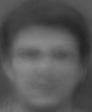

Image after NMF:


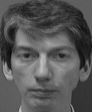

[[ 98. 100.  99. ...  93.  92.  96.]
 [ 97. 103.  99. ...  94.  93.  96.]
 [ 98.  97.  98. ...  92.  93.  95.]
 ...
 [ 85.  92.  91. ...  50.  56.  48.]
 [ 85.  94.  87. ...  52.  50.  50.]
 [ 90.  91.  92. ...  53.  48.  52.]]
Image Before NMF:
-------------------------------Number of image: 98
[[130. 130. 130. ... 134. 133. 133.]
 [129. 130. 129. ... 135. 134. 133.]
 [130. 129. 130. ... 133. 135. 134.]
 ...
 [ 71.  63.  66. ...  95.  95.  96.]
 [ 68.  64.  68. ...  96.  95.  95.]
 [ 68.  65.  68. ...  99.  97.  96.]]


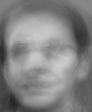

Image after NMF:


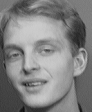

[[119. 120. 120. ... 129. 128. 124.]
 [118. 121. 120. ... 126. 124. 127.]
 [120. 119. 118. ... 121. 128. 127.]
 ...
 [ 64.  61.  64. ...  89.  92.  88.]
 [ 64.  63.  58. ...  93.  90.  92.]
 [ 65.  61.  63. ...  89.  94.  85.]]
Image Before NMF:
-------------------------------Number of image: 99
[[101. 102. 102. ...  97.  97.  97.]
 [102. 102. 102. ...  97.  97.  97.]
 [102. 102. 102. ...  97.  97.  97.]
 ...
 [159. 160. 161. ... 101.  99.  98.]
 [164. 166. 168. ... 104. 103. 103.]
 [167. 170. 173. ... 105. 104. 104.]]


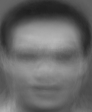

Image after NMF:


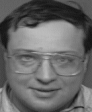

[[ 98.  98. 101. ...  89.  91.  92.]
 [ 96.  97.  98. ...  91.  89.  91.]
 [ 99.  98.  97. ...  92.  87.  90.]
 ...
 [134. 152. 140. ... 146. 140. 136.]
 [139. 152. 141. ... 144. 135. 141.]
 [144. 146. 146. ... 130. 150. 157.]]
Image Before NMF:
-------------------------------Number of image: 100
[[41. 42. 42. ... 35. 36. 36.]
 [41. 42. 42. ... 36. 35. 35.]
 [42. 42. 42. ... 36. 36. 35.]
 ...
 [78. 81. 81. ... 43. 42. 42.]
 [84. 86. 87. ... 45. 45. 43.]
 [86. 92. 92. ... 50. 49. 45.]]


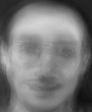

Image after NMF:


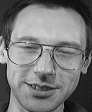

[[46. 45. 42. ... 36. 40. 36.]
 [37. 49. 45. ... 39. 42. 38.]
 [51. 39. 50. ... 37. 43. 32.]
 ...
 [58. 54. 50. ... 23. 25. 23.]
 [58. 53. 50. ... 21. 26. 26.]
 [61. 49. 55. ... 24. 21. 24.]]
Image Before NMF:
-------------------------------Number of image: 101
[[101. 101. 101. ... 104. 103. 103.]
 [101. 100. 101. ... 104. 104. 104.]
 [101. 101. 101. ... 103. 104. 104.]
 ...
 [ 79.  82.  85. ...  55.  56.  56.]
 [ 82.  83.  86. ...  55.  56.  57.]
 [ 83.  86.  88. ...  55.  56.  57.]]


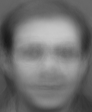

Image after NMF:


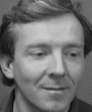

[[101. 106. 102. ... 108. 107. 108.]
 [101. 104. 102. ... 106. 108. 105.]
 [ 99. 104. 102. ... 108. 106. 111.]
 ...
 [ 64.  69.  75. ...  42.  48.  48.]
 [ 74.  81.  85. ...  46.  48.  44.]
 [ 77.  83.  84. ...  46.  50.  45.]]
Image Before NMF:
-------------------------------Number of image: 102
[[ 59.  59.  59. ...  58.  58.  58.]
 [ 59.  59.  59. ...  58.  58.  58.]
 [ 59.  59.  59. ...  58.  58.  59.]
 ...
 [120. 122. 126. ...  83.  82.  83.]
 [124. 128. 132. ...  85.  85.  84.]
 [125. 134. 136. ...  95.  94.  86.]]


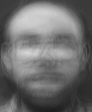

Image after NMF:


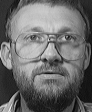

[[ 52.  39.  51. ...  41.  41.  42.]
 [ 53.  49.  49. ...  42.  40.  42.]
 [ 48.  49.  49. ...  41.  42.  35.]
 ...
 [145. 154. 117. ... 104. 104. 102.]
 [165. 153.  97. ... 120. 100. 107.]
 [147. 126. 169. ... 133. 138. 103.]]
Image Before NMF:
-------------------------------Number of image: 103
[[101. 100. 101. ...  99.  99. 100.]
 [101. 101. 100. ... 100.  99.  99.]
 [102. 101. 101. ...  99. 100.  99.]
 ...
 [ 18.  19.  18. ...   8.   9.  10.]
 [ 21.  20.  21. ...   6.   7.   9.]
 [ 23.  22.  23. ...   5.   6.   8.]]


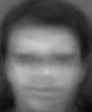

Image after NMF:


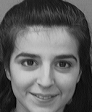

[[138. 135. 135. ... 128. 129. 126.]
 [136. 135. 136. ... 130. 128. 126.]
 [134. 135. 134. ... 132. 128. 128.]
 ...
 [ 43.  26.  28. ...  14.  22.  22.]
 [ 37.  27.  26. ...  16.  23.  25.]
 [ 39.  27.  26. ...  23.  18.  35.]]
Image Before NMF:
-------------------------------Number of image: 104
[[ 98.  99.  99. ...  97.  96.  96.]
 [ 98.  99.  99. ...  96.  97.  96.]
 [ 98.  99.  99. ...  97.  97.  97.]
 ...
 [156. 160. 162. ... 101. 100.  98.]
 [162. 165. 167. ... 104. 103. 103.]
 [164. 170. 172. ... 106. 105. 104.]]


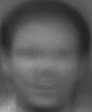

Image after NMF:


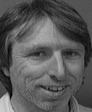

[[ 93.  93.  88. ...  84.  81.  82.]
 [ 91.  89.  92. ...  82.  82.  82.]
 [ 92.  90.  93. ...  83.  83.  77.]
 ...
 [205. 202. 202. ... 110. 106. 109.]
 [205. 204. 203. ... 108. 111. 109.]
 [203. 205. 204. ... 112. 111. 111.]]
Image Before NMF:
-------------------------------Number of image: 105
[[152. 151. 152. ... 152. 152. 153.]
 [152. 152. 151. ... 152. 152. 153.]
 [152. 152. 152. ... 152. 153. 153.]
 ...
 [157. 157. 159. ... 118. 117. 117.]
 [161. 160. 164. ... 119. 119. 120.]
 [164. 164. 168. ... 119. 119. 121.]]


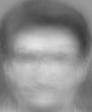

Image after NMF:


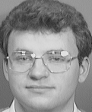

[[153. 152. 152. ... 151. 151. 149.]
 [153. 154. 155. ... 147. 148. 151.]
 [155. 151. 157. ... 150. 151. 150.]
 ...
 [134. 141. 146. ... 109. 112. 111.]
 [143. 135. 132. ... 109. 113. 109.]
 [139. 139. 184. ... 110. 108. 114.]]
Image Before NMF:
-------------------------------Number of image: 106
[[127. 128. 128. ... 122. 122. 122.]
 [127. 128. 128. ... 123. 122. 122.]
 [128. 128. 128. ... 122. 123. 122.]
 ...
 [109. 108. 108. ...  75.  74.  74.]
 [113. 112. 114. ...  77.  76.  76.]
 [115. 117. 118. ...  77.  76.  77.]]


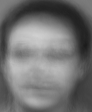

Image after NMF:


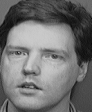

[[108. 112. 109. ... 105. 108. 103.]
 [113. 111. 111. ... 108. 105. 105.]
 [113. 109. 113. ... 106. 108. 105.]
 ...
 [ 94. 138. 115. ...  67.  70.  66.]
 [119. 148. 112. ...  76.  65.  70.]
 [130. 148. 101. ...  73.  64.  69.]]
Image Before NMF:
-------------------------------Number of image: 107
[[62. 62. 62. ... 64. 64. 64.]
 [62. 62. 61. ... 64. 64. 64.]
 [62. 61. 62. ... 64. 64. 64.]
 ...
 [71. 70. 71. ... 63. 62. 63.]
 [73. 73. 74. ... 65. 64. 63.]
 [75. 76. 78. ... 67. 66. 65.]]


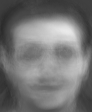

Image after NMF:


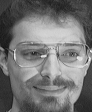

[[53. 58. 57. ... 56. 56. 58.]
 [56. 58. 55. ... 57. 55. 58.]
 [57. 55. 60. ... 59. 54. 57.]
 ...
 [55. 52. 51. ... 45. 43. 42.]
 [54. 57. 54. ... 44. 41. 42.]
 [57. 55. 52. ... 38. 47. 39.]]
Image Before NMF:
-------------------------------Number of image: 108
[[ 61.  62.  62. ...  58.  58.  58.]
 [ 61.  62.  62. ...  58.  58.  58.]
 [ 61.  61.  62. ...  58.  58.  58.]
 ...
 [129. 130. 130. ...  92.  90.  89.]
 [134. 136. 137. ...  96.  94.  92.]
 [137. 142. 143. ... 101.  98.  95.]]


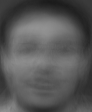

Image after NMF:


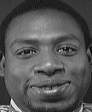

[[ 50.  54.  61. ...  50.  50.  54.]
 [ 58.  56.  60. ...  53.  57.  48.]
 [ 54.  56.  56. ...  53.  57.  54.]
 ...
 [129. 103. 119. ...  58.  73.  83.]
 [116. 207. 196. ... 116.  77.  91.]
 [102. 230. 209. ... 152. 165.  67.]]
Image Before NMF:
-------------------------------Number of image: 109
[[125. 125. 126. ... 122. 122. 122.]
 [126. 126. 125. ... 122. 122. 122.]
 [126. 126. 126. ... 122. 122. 122.]
 ...
 [124. 123. 124. ...  91.  90.  90.]
 [127. 126. 129. ...  92.  92.  93.]
 [130. 129. 132. ...  92.  92.  93.]]


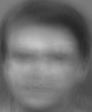

Image after NMF:


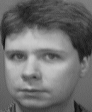

[[121. 118. 117. ... 127. 124. 127.]
 [117. 117. 117. ... 126. 123. 125.]
 [120. 120. 119. ... 122. 125. 124.]
 ...
 [ 90.  97.  89. ...  90.  90.  90.]
 [102. 105.  89. ...  86.  84.  89.]
 [ 99. 106. 101. ...  74.  84.  90.]]
Image Before NMF:
-------------------------------Number of image: 110
[[ 98.  99.  99. ...  96.  95.  95.]
 [ 99.  99. 100. ...  96.  96.  95.]
 [ 99.  99. 100. ...  96.  96.  96.]
 ...
 [156. 160. 162. ... 102. 100.  99.]
 [162. 165. 167. ... 105. 104. 104.]
 [165. 170. 173. ... 106. 105. 105.]]


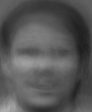

Image after NMF:


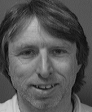

[[ 86.  90.  87. ...  84.  86.  85.]
 [ 85.  88.  90. ...  81.  86.  86.]
 [ 87.  88.  89. ...  83.  85.  83.]
 ...
 [199. 199. 196. ... 122. 122. 125.]
 [196. 190. 191. ... 127. 126. 124.]
 [192. 199. 201. ... 127. 124. 126.]]
Image Before NMF:
-------------------------------Number of image: 111
[[75. 75. 75. ... 78. 78. 78.]
 [75. 75. 75. ... 78. 78. 78.]
 [75. 75. 75. ... 78. 78. 78.]
 ...
 [47. 43. 45. ... 57. 57. 58.]
 [47. 46. 48. ... 58. 58. 57.]
 [49. 49. 50. ... 63. 61. 59.]]


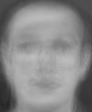

Image after NMF:


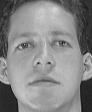

[[41. 47. 47. ... 52. 46. 49.]
 [44. 43. 43. ... 50. 49. 46.]
 [48. 47. 46. ... 50. 48. 47.]
 ...
 [43. 44. 44. ... 36. 37. 35.]
 [45. 44. 45. ... 37. 39. 33.]
 [46. 41. 47. ... 35. 37. 38.]]
Image Before NMF:
-------------------------------Number of image: 112
[[ 55.  56.  56. ...  52.  52.  52.]
 [ 55.  56.  56. ...  53.  52.  52.]
 [ 56.  56.  56. ...  53.  53.  52.]
 ...
 [125. 126. 127. ...  92.  90.  90.]
 [130. 133. 134. ...  97.  95.  93.]
 [133. 139. 139. ... 102. 100.  96.]]


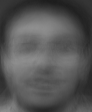

Image after NMF:


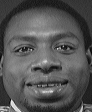

[[ 58.  55.  52. ...  48.  55.  46.]
 [ 51.  59.  55. ...  45.  49.  56.]
 [ 55.  52.  57. ...  51.  53.  52.]
 ...
 [201. 202. 209. ...  78.  82.  80.]
 [124. 106. 120. ...  74.  67.  80.]
 [111. 203. 195. ... 131. 115.  68.]]
Image Before NMF:
-------------------------------Number of image: 113
[[115. 115. 115. ... 108. 107. 107.]
 [115. 116. 116. ... 108. 107. 107.]
 [116. 116. 116. ... 108. 108. 107.]
 ...
 [122. 125. 126. ...  67.  66.  65.]
 [128. 129. 132. ...  68.  68.  69.]
 [131. 135. 137. ...  66.  67.  69.]]


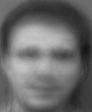

Image after NMF:


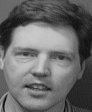

[[103. 109. 105. ... 100.  93. 100.]
 [104. 109. 103. ...  99.  98.  97.]
 [106. 108. 101. ...  98. 100.  96.]
 ...
 [170. 111. 116. ...  40.  32.  40.]
 [166.  93. 119. ...  56.  45.  36.]
 [161.  97. 122. ...  53.  58.  54.]]
Image Before NMF:
-------------------------------Number of image: 114
[[148. 148. 149. ... 149. 149. 150.]
 [149. 148. 148. ... 149. 150. 150.]
 [148. 148. 148. ... 149. 150. 150.]
 ...
 [162. 163. 166. ... 115. 114. 114.]
 [167. 167. 171. ... 116. 116. 118.]
 [170. 171. 176. ... 115. 115. 118.]]


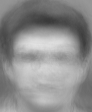

Image after NMF:


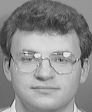

[[155. 154. 154. ... 148. 151. 149.]
 [154. 153. 152. ... 151. 151. 150.]
 [153. 153. 153. ... 151. 151. 150.]
 ...
 [147. 144. 145. ... 108. 113. 108.]
 [159. 142. 133. ... 109. 111. 110.]
 [150. 162. 206. ... 111. 111. 108.]]
Image Before NMF:
-------------------------------Number of image: 115
[[ 44.  44.  44. ...  42.  42.  42.]
 [ 44.  44.  44. ...  42.  42.  42.]
 [ 44.  44.  44. ...  42.  42.  42.]
 ...
 [101. 105. 107. ...  65.  65.  65.]
 [108. 112. 114. ...  69.  68.  66.]
 [111. 120. 121. ...  78.  76.  69.]]


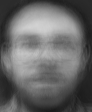

Image after NMF:


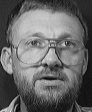

[[ 47.  46.  46. ...  38.  38.  39.]
 [ 47.  45.  47. ...  40.  42.  39.]
 [ 45.  47.  45. ...  39.  38.  43.]
 ...
 [ 39.  47. 132. ...  80.  83.  97.]
 [ 81. 164. 204. ... 105.  93. 102.]
 [185. 200. 162. ... 151. 143.  90.]]
Image Before NMF:
-------------------------------Number of image: 116
[[ 66.  66.  66. ...  64.  64.  64.]
 [ 66.  66.  66. ...  64.  64.  64.]
 [ 66.  66.  66. ...  64.  64.  64.]
 ...
 [ 96.  96.  95. ...  75.  73.  73.]
 [100. 101. 101. ...  78.  76.  75.]
 [104. 105. 106. ...  79.  78.  77.]]


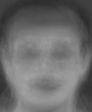

Image after NMF:


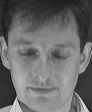

[[ 40.  42.  41. ...  48.  44.  46.]
 [ 41.  42.  42. ...  46.  45.  47.]
 [ 42.  40.  40. ...  48.  51.  46.]
 ...
 [154. 160. 161. ...  38.  45.  50.]
 [172. 174. 180. ...  29.  40.  45.]
 [171. 170. 168. ...  57.  37.  42.]]
Image Before NMF:
-------------------------------Number of image: 117
[[55. 55. 55. ... 58. 58. 58.]
 [55. 55. 54. ... 58. 58. 58.]
 [55. 55. 55. ... 58. 58. 59.]
 ...
 [58. 63. 64. ... 61. 61. 61.]
 [66. 66. 67. ... 61. 61. 61.]
 [70. 73. 75. ... 63. 63. 62.]]


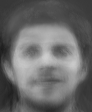

Image after NMF:


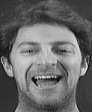

[[48. 52. 51. ... 56. 56. 49.]
 [48. 47. 52. ... 58. 59. 54.]
 [52. 50. 44. ... 60. 57. 57.]
 ...
 [49. 54. 48. ... 54. 50. 55.]
 [51. 50. 47. ... 55. 50. 56.]
 [53. 48. 53. ... 56. 56. 55.]]
Image Before NMF:
-------------------------------Number of image: 118
[[101. 101. 102. ...  99.  99.  99.]
 [102. 102. 102. ...  99.  99.  99.]
 [102. 102. 102. ...  99.  99.  99.]
 ...
 [120. 120. 122. ...  85.  84.  84.]
 [123. 123. 126. ...  86.  86.  87.]
 [125. 126. 129. ...  86.  86.  87.]]


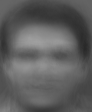

Image after NMF:


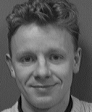

[[ 95.  95.  99. ...  89.  92.  91.]
 [ 98.  96.  95. ...  93.  89.  94.]
 [ 98.  97.  95. ...  90.  89.  92.]
 ...
 [ 74.  72.  71. ... 127. 139. 156.]
 [ 74.  78.  87. ... 126. 158. 149.]
 [ 79. 118. 145. ... 111. 165. 162.]]
Image Before NMF:
-------------------------------Number of image: 119
[[45. 45. 45. ... 43. 43. 43.]
 [45. 46. 45. ... 43. 43. 43.]
 [46. 45. 45. ... 43. 43. 43.]
 ...
 [36. 35. 35. ... 32. 31. 32.]
 [39. 39. 40. ... 33. 32. 32.]
 [42. 43. 43. ... 37. 36. 33.]]


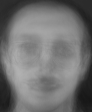

Image after NMF:


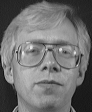

[[37. 35. 35. ... 34. 34. 36.]
 [36. 36. 37. ... 35. 31. 36.]
 [38. 36. 37. ... 35. 32. 33.]
 ...
 [42. 43. 39. ... 24. 29. 26.]
 [34. 44. 43. ... 26. 29. 27.]
 [36. 43. 36. ... 26. 28. 28.]]
Image Before NMF:
-------------------------------Number of image: 120
[[ 82.  83.  83. ...  75.  75.  75.]
 [ 83.  83.  83. ...  75.  75.  75.]
 [ 83.  83.  84. ...  76.  75.  74.]
 ...
 [173. 173. 173. ... 113. 109. 108.]
 [179. 181. 182. ... 117. 115. 114.]
 [183. 186. 188. ... 119. 117. 116.]]


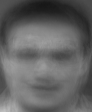

Image after NMF:


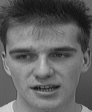

[[112. 110. 113. ... 102. 103. 103.]
 [110. 113. 109. ... 103. 101. 107.]
 [110. 111. 111. ... 104. 104. 104.]
 ...
 [203. 199. 200. ... 106.  67.  62.]
 [203. 198. 203. ... 159. 150. 103.]
 [202. 199. 202. ... 157. 159. 167.]]
Image Before NMF:
-------------------------------Number of image: 121
[[104. 104. 104. ... 107. 107. 107.]
 [104. 104. 104. ... 107. 107. 107.]
 [104. 103. 104. ... 107. 107. 107.]
 ...
 [ 83.  84.  86. ...  71.  72.  72.]
 [ 87.  86.  88. ...  73.  72.  73.]
 [ 89.  90.  92. ...  73.  72.  74.]]


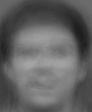

Image after NMF:


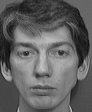

[[104. 101. 104. ... 104. 102. 103.]
 [104. 104. 103. ... 103. 101. 101.]
 [102. 106. 102. ... 101. 103. 102.]
 ...
 [ 73.  69.  70. ...  76.  78.  73.]
 [ 73.  74.  72. ...  75.  75.  79.]
 [ 75.  75.  73. ...  78.  73.  79.]]
Image Before NMF:
-------------------------------Number of image: 122
[[49. 48. 49. ... 46. 46. 46.]
 [49. 49. 48. ... 46. 46. 46.]
 [49. 49. 48. ... 46. 46. 46.]
 ...
 [87. 87. 89. ... 69. 69. 70.]
 [90. 91. 94. ... 71. 71. 70.]
 [92. 96. 98. ... 78. 77. 71.]]


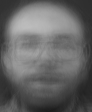

Image after NMF:


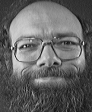

[[55. 47. 50. ... 47. 44. 49.]
 [47. 52. 47. ... 45. 46. 46.]
 [49. 53. 48. ... 42. 48. 46.]
 ...
 [71. 67. 72. ... 46. 59. 45.]
 [68. 71. 65. ... 49. 49. 67.]
 [64. 71. 62. ... 48. 46. 72.]]
Image Before NMF:
-------------------------------Number of image: 123
[[104. 104. 104. ... 105. 105. 104.]
 [104. 104. 104. ... 105. 105. 105.]
 [104. 104. 104. ... 105. 105. 106.]
 ...
 [125. 126. 131. ...  90.  90.  90.]
 [127. 128. 133. ...  90.  91.  92.]
 [127. 131. 135. ...  92.  93.  92.]]


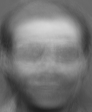

Image after NMF:


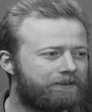

[[113. 105. 109. ... 102. 108. 108.]
 [109. 105. 111. ... 110. 103. 106.]
 [107. 108. 107. ... 110. 101. 107.]
 ...
 [110.  94.  95. ...  41.  55.  40.]
 [103. 106.  95. ...  47.  44.  47.]
 [104. 104.  95. ...  48.  37.  51.]]
Image Before NMF:
-------------------------------Number of image: 124
[[ 38.  38.  38. ...  38.  38.  38.]
 [ 38.  38.  38. ...  38.  38.  38.]
 [ 38.  38.  38. ...  38.  38.  38.]
 ...
 [ 92.  93.  95. ...  83.  81.  82.]
 [ 97.  99. 101. ...  86.  84.  82.]
 [101. 106. 108. ...  94.  92.  85.]]


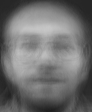

Image after NMF:


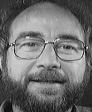

[[ 52.  52.  46. ...  41.  49.  45.]
 [ 48.  54.  50. ...  48.  47.  43.]
 [ 49.  54.  51. ...  45.  50.  52.]
 ...
 [142.  98.  87. ...  84.  65.  45.]
 [137. 105.  84. ...  84.  74.  44.]
 [138. 116.  90. ...  88.  82.  52.]]
Image Before NMF:
-------------------------------Number of image: 125
[[107. 106. 106. ... 109. 109. 109.]
 [107. 106. 105. ... 109. 109. 109.]
 [106. 106. 106. ... 109. 109. 110.]
 ...
 [ 98. 102. 103. ...  66.  66.  66.]
 [104. 104. 107. ...  66.  66.  68.]
 [106. 108. 111. ...  65.  66.  68.]]


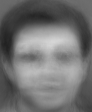

Image after NMF:


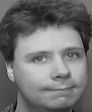

[[126. 124. 125. ... 119. 119. 122.]
 [122. 124. 123. ... 120. 122. 119.]
 [124. 124. 123. ... 123. 121. 122.]
 ...
 [ 78.  70.  75. ...  82.  79.  84.]
 [ 71.  77.  80. ...  76.  81.  78.]
 [ 73.  89.  97. ...  76.  81.  78.]]
Image Before NMF:
-------------------------------Number of image: 126
[[102. 101. 102. ...  97.  97.  97.]
 [102. 102. 101. ...  97.  97.  97.]
 [102. 102. 101. ...  97.  97.  97.]
 ...
 [ 33.  31.  33. ...  22.  24.  24.]
 [ 33.  30.  34. ...  19.  22.  24.]
 [ 32.  30.  33. ...  18.  20.  22.]]


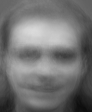

Image after NMF:


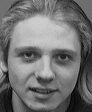

[[111. 110. 111. ... 113. 104. 110.]
 [112. 111. 114. ... 111. 109. 111.]
 [112. 109. 112. ... 109. 106. 111.]
 ...
 [ 40.  36.  35. ...  29.  34.  30.]
 [ 30.  36.  47. ...  36.  39.  36.]
 [ 44.  37.  39. ...  35.  40.  29.]]
Image Before NMF:
-------------------------------Number of image: 127
[[109. 109. 110. ... 113. 113. 113.]
 [109. 109. 109. ... 114. 113. 113.]
 [109. 109. 110. ... 113. 114. 113.]
 ...
 [ 81.  81.  83. ...  71.  72.  72.]
 [ 84.  83.  86. ...  73.  72.  73.]
 [ 85.  87.  88. ...  74.  73.  74.]]


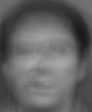

Image after NMF:


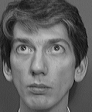

[[103. 104. 105. ... 102. 103. 103.]
 [104. 105. 105. ... 103. 102. 100.]
 [105. 102. 105. ... 102.  99. 101.]
 ...
 [ 73.  70.  71. ...  78.  73.  79.]
 [ 71.  72.  72. ...  79.  75.  78.]
 [ 72.  74.  72. ...  76.  76.  75.]]
Image Before NMF:
-------------------------------Number of image: 128
[[126. 126. 126. ... 122. 122. 122.]
 [126. 126. 126. ... 122. 122. 122.]
 [126. 126. 126. ... 122. 122. 122.]
 ...
 [130. 129. 130. ...  92.  91.  91.]
 [133. 132. 136. ...  93.  93.  94.]
 [135. 135. 139. ...  93.  93.  94.]]


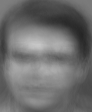

Image after NMF:


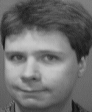

[[114. 120. 118. ... 123. 124. 124.]
 [116. 124. 121. ... 122. 128. 127.]
 [118. 120. 120. ... 128. 126. 124.]
 ...
 [101. 105.  88. ...  93.  91.  87.]
 [101. 112. 107. ...  87.  92.  87.]
 [103. 106. 106. ...  79.  92.  87.]]
Image Before NMF:
-------------------------------Number of image: 129
[[ 90.  91.  91. ...  86.  86.  86.]
 [ 91.  91.  91. ...  86.  86.  86.]
 [ 91.  91.  92. ...  86.  86.  86.]
 ...
 [161. 166. 166. ...  95.  93.  91.]
 [169. 172. 173. ...  99.  98.  97.]
 [173. 179. 180. ... 100.  98.  99.]]


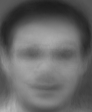

Image after NMF:


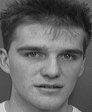

[[111. 107. 109. ... 102. 104. 101.]
 [107. 109. 106. ... 103. 100. 105.]
 [106. 108. 107. ... 103. 104.  99.]
 ...
 [205. 203. 203. ...  68.  68.  68.]
 [207. 201. 205. ...  67.  65.  67.]
 [209. 203. 203. ...  65.  68.  65.]]
Image Before NMF:
-------------------------------Number of image: 130
[[113. 113. 114. ... 122. 121. 120.]
 [114. 113. 113. ... 122. 122. 121.]
 [113. 113. 113. ... 121. 122. 122.]
 ...
 [ 62.  62.  68. ...  63.  66.  67.]
 [ 62.  61.  67. ...  63.  64.  65.]
 [ 60.  64.  67. ...  66.  66.  65.]]


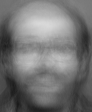

Image after NMF:


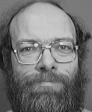

[[121. 119. 122. ... 120. 122. 121.]
 [122. 121. 122. ... 121. 120. 122.]
 [122. 121. 120. ... 119. 121. 121.]
 ...
 [ 72.  67.  70. ...  99.  97.  98.]
 [ 67.  69.  71. ... 109.  98.  98.]
 [ 65.  73.  67. ... 150. 135. 121.]]
Image Before NMF:
-------------------------------Number of image: 131
[[ 87.  87.  87. ...  88.  88.  88.]
 [ 87.  87.  88. ...  88.  88.  88.]
 [ 87.  87.  88. ...  88.  88.  88.]
 ...
 [121. 127. 127. ...  74.  74.  73.]
 [128. 131. 132. ...  78.  77.  77.]
 [131. 137. 138. ...  79.  77.  78.]]


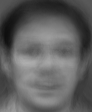

Image after NMF:


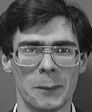

[[111. 110. 114. ... 114. 110. 114.]
 [113. 108. 109. ... 109. 114. 110.]
 [112. 112. 112. ... 113. 112. 112.]
 ...
 [100.  97.  98. ...  52.  54.  52.]
 [ 94.  98.  97. ...  47.  58.  47.]
 [101.  90. 104. ...  57.  53.  48.]]
Image Before NMF:
-------------------------------Number of image: 132
[[55. 55. 55. ... 57. 57. 58.]
 [55. 55. 55. ... 58. 57. 57.]
 [55. 54. 55. ... 57. 58. 57.]
 ...
 [53. 52. 52. ... 55. 54. 54.]
 [56. 55. 55. ... 57. 55. 54.]
 [58. 59. 59. ... 59. 57. 57.]]


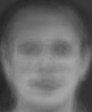

Image after NMF:


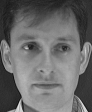

[[37. 36. 38. ... 45. 42. 45.]
 [36. 38. 38. ... 43. 46. 45.]
 [36. 39. 40. ... 50. 48. 50.]
 ...
 [45. 43. 41. ... 51. 46. 55.]
 [43. 44. 42. ... 49. 48. 50.]
 [37. 40. 40. ... 40. 50. 50.]]
Image Before NMF:
-------------------------------Number of image: 133
[[72. 71. 72. ... 79. 78. 79.]
 [71. 71. 71. ... 79. 79. 79.]
 [71. 71. 71. ... 78. 79. 80.]
 ...
 [37. 36. 39. ... 42. 44. 45.]
 [37. 37. 39. ... 43. 43. 43.]
 [37. 39. 40. ... 47. 46. 44.]]


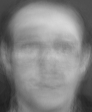

Image after NMF:


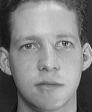

[[44. 43. 32. ... 52. 48. 52.]
 [44. 38. 33. ... 51. 51. 54.]
 [41. 42. 29. ... 50. 53. 53.]
 ...
 [39. 37. 39. ... 41. 37. 37.]
 [41. 41. 38. ... 44. 36. 32.]
 [40. 36. 42. ... 43. 43. 37.]]
Image Before NMF:
-------------------------------Number of image: 134
[[ 99.  99.  99. ... 101. 101. 101.]
 [ 99.  99.  99. ... 101. 101. 101.]
 [ 99.  99.  99. ... 101. 101. 102.]
 ...
 [138. 140. 142. ... 102. 101. 100.]
 [142. 144. 146. ... 105. 104. 104.]
 [145. 148. 151. ... 106. 105. 105.]]


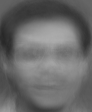

Image after NMF:


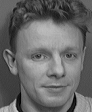

[[107. 103. 104. ...  99. 103.  99.]
 [103. 107. 101. ...  99. 101. 102.]
 [105. 105. 102. ... 102. 103. 103.]
 ...
 [168. 176. 183. ... 158. 129. 158.]
 [174. 170. 175. ... 156. 130. 163.]
 [176. 166. 183. ... 155. 133. 159.]]
Image Before NMF:
-------------------------------Number of image: 135
[[67. 67. 67. ... 73. 73. 73.]
 [67. 67. 66. ... 73. 73. 73.]
 [67. 67. 67. ... 72. 73. 74.]
 ...
 [42. 46. 47. ... 53. 53. 54.]
 [49. 48. 49. ... 53. 53. 53.]
 [53. 55. 57. ... 54. 53. 54.]]


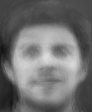

Image after NMF:


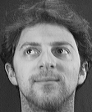

[[49. 48. 49. ... 62. 58. 62.]
 [48. 51. 50. ... 57. 60. 62.]
 [49. 49. 51. ... 59. 62. 59.]
 ...
 [50. 50. 48. ... 65. 57. 62.]
 [46. 54. 50. ... 67. 63. 54.]
 [47. 51. 51. ... 63. 63. 56.]]
Image Before NMF:
-------------------------------Number of image: 136
[[113. 113. 113. ... 115. 114. 114.]
 [113. 113. 112. ... 115. 115. 114.]
 [113. 113. 112. ... 114. 115. 115.]
 ...
 [ 48.  44.  48. ...  54.  55.  56.]
 [ 46.  43.  48. ...  52.  53.  55.]
 [ 45.  43.  46. ...  54.  54.  54.]]


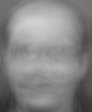

Image after NMF:


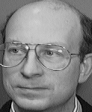

[[113. 110. 110. ... 120. 121. 118.]
 [112. 110. 111. ... 119. 119. 118.]
 [113. 111. 113. ... 120. 120. 120.]
 ...
 [ 28.  24.  21. ...  23.  20.  17.]
 [ 20.  23.  27. ...  20.  21.  16.]
 [ 24.  23.  21. ...  21.  21.  20.]]
Image Before NMF:
-------------------------------Number of image: 137
[[65. 65. 65. ... 66. 66. 66.]
 [65. 65. 65. ... 66. 66. 66.]
 [65. 65. 65. ... 66. 66. 66.]
 ...
 [82. 86. 86. ... 48. 48. 47.]
 [87. 90. 90. ... 50. 50. 50.]
 [89. 94. 95. ... 53. 52. 51.]]


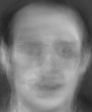

Image after NMF:


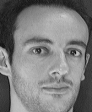

[[61. 58. 59. ... 60. 61. 62.]
 [61. 62. 54. ... 64. 56. 61.]
 [58. 64. 60. ... 65. 55. 59.]
 ...
 [56. 51. 52. ... 61. 63. 61.]
 [48. 53. 51. ... 61. 64. 59.]
 [48. 52. 51. ... 59. 64. 61.]]
Image Before NMF:
-------------------------------Number of image: 138
[[54. 54. 54. ... 55. 55. 55.]
 [54. 54. 54. ... 55. 55. 55.]
 [54. 53. 54. ... 55. 56. 55.]
 ...
 [41. 39. 39. ... 44. 44. 44.]
 [43. 42. 42. ... 46. 45. 44.]
 [46. 46. 46. ... 48. 46. 46.]]


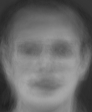

Image after NMF:


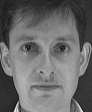

[[36. 39. 45. ... 47. 44. 43.]
 [37. 45. 40. ... 47. 44. 47.]
 [36. 40. 41. ... 47. 47. 45.]
 ...
 [48. 45. 46. ... 51. 47. 54.]
 [44. 44. 47. ... 52. 51. 52.]
 [42. 45. 41. ... 52. 51. 53.]]
Image Before NMF:
-------------------------------Number of image: 139
[[111. 111. 111. ... 114. 114. 114.]
 [112. 111. 111. ... 114. 115. 114.]
 [111. 111. 111. ... 114. 114. 115.]
 ...
 [ 91.  92.  97. ...  71.  72.  72.]
 [ 93.  93.  98. ...  70.  72.  73.]
 [ 92.  95.  98. ...  72.  73.  72.]]


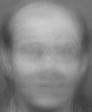

Image after NMF:


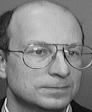

[[110. 110. 112. ... 119. 122. 117.]
 [109. 110. 111. ... 117. 119. 115.]
 [112. 111. 111. ... 122. 120. 117.]
 ...
 [  3.  78. 151. ...  40.  75.  75.]
 [  0.  87. 153. ...  15.  33.  44.]
 [  0.  93. 164. ...  20.  31.  16.]]
Image Before NMF:
-------------------------------Number of image: 140
[[117. 117. 117. ... 117. 117. 117.]
 [117. 117. 117. ... 118. 117. 117.]
 [117. 117. 117. ... 117. 118. 117.]
 ...
 [ 60.  59.  60. ...  51.  53.  53.]
 [ 61.  60.  63. ...  52.  52.  53.]
 [ 62.  63.  64. ...  53.  53.  53.]]


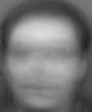

Image after NMF:


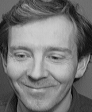

[[107. 104. 109. ... 110. 107. 109.]
 [107. 106. 107. ... 109. 108. 110.]
 [108. 107. 107. ... 109. 109. 108.]
 ...
 [ 71.  73.  72. ...  57.  58.  60.]
 [ 72.  75.  76. ...  58.  60.  56.]
 [ 74.  78.  75. ...  58.  56.  57.]]
Image Before NMF:
-------------------------------Number of image: 141
[[132. 132. 132. ... 131. 131. 131.]
 [132. 132. 132. ... 132. 131. 131.]
 [132. 132. 132. ... 131. 132. 131.]
 ...
 [100.  93.  96. ...  94.  94.  94.]
 [ 98.  95. 100. ...  95.  95.  95.]
 [ 99.  96.  99. ...  96.  95.  96.]]


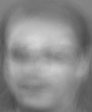

Image after NMF:


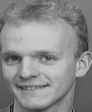

[[128. 125. 126. ... 125. 126. 123.]
 [127. 127. 124. ... 124. 124. 124.]
 [127. 127. 124. ... 125. 124. 127.]
 ...
 [ 87. 102.  94. ...  87.  86.  87.]
 [103. 105.  92. ...  88.  83.  87.]
 [ 92.  92.  89. ...  84.  85.  85.]]
Image Before NMF:
-------------------------------Number of image: 142
[[52. 52. 52. ... 51. 51. 51.]
 [53. 53. 52. ... 52. 51. 51.]
 [53. 53. 52. ... 51. 52. 51.]
 ...
 [50. 47. 48. ... 55. 54. 55.]
 [51. 50. 52. ... 55. 55. 54.]
 [53. 53. 54. ... 59. 58. 55.]]


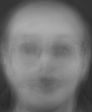

Image after NMF:


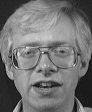

[[ 38.  35.  36. ...  34.  32.  36.]
 [ 35.  39.  39. ...  37.  33.  43.]
 [ 40.  34.  40. ...  35.  38.  35.]
 ...
 [ 39.  41.  35. ... 138. 132. 129.]
 [ 40.  36.  40. ... 132. 128. 135.]
 [ 37.  42.  39. ... 138. 142. 141.]]
Image Before NMF:
-------------------------------Number of image: 143
[[103. 102. 103. ...  99.  99.  99.]
 [103. 103. 102. ... 100.  99.  99.]
 [103. 103. 102. ...  99. 100.  99.]
 ...
 [ 26.  22.  24. ...  23.  24.  25.]
 [ 25.  21.  25. ...  20.  22.  24.]
 [ 24.  21.  23. ...  18.  20.  22.]]


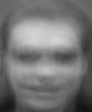

Image after NMF:


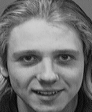

[[114. 109. 112. ... 117. 109. 111.]
 [113. 109. 112. ... 111. 111. 111.]
 [109. 110. 111. ... 113. 109. 113.]
 ...
 [ 38.  33.  30. ...  42.  32.  31.]
 [ 35.  26.  35. ...  34.  47.  42.]
 [ 24.  30.  38. ...  37.  35.  38.]]
Image Before NMF:
-------------------------------Number of image: 144
[[161. 161. 162. ... 161. 161. 161.]
 [162. 161. 161. ... 161. 161. 161.]
 [162. 161. 162. ... 161. 161. 161.]
 ...
 [163. 162. 165. ... 113. 112. 112.]
 [166. 166. 170. ... 114. 114. 116.]
 [167. 168. 172. ... 114. 113. 116.]]


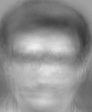

Image after NMF:


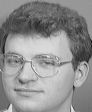

[[154. 155. 151. ... 148. 151. 148.]
 [156. 154. 154. ... 149. 151. 147.]
 [152. 155. 155. ... 148. 152. 150.]
 ...
 [102. 109. 109. ... 113. 111. 112.]
 [125. 123. 134. ... 114. 111. 113.]
 [141. 132. 124. ... 108. 113. 110.]]
Image Before NMF:
-------------------------------Number of image: 145
[[98. 98. 98. ... 95. 95. 95.]
 [99. 99. 98. ... 95. 95. 95.]
 [99. 99. 98. ... 95. 95. 95.]
 ...
 [30. 26. 28. ... 31. 32. 33.]
 [29. 25. 29. ... 28. 30. 32.]
 [28. 25. 27. ... 27. 29. 30.]]


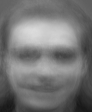

Image after NMF:


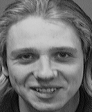

[[106. 110. 107. ... 107. 109. 112.]
 [105. 109. 107. ... 107. 111. 112.]
 [106. 107. 107. ... 110. 110. 107.]
 ...
 [ 40.  35.  30. ...  46.  35.  50.]
 [ 35.  30.  28. ...  41.  32.  41.]
 [ 32.  38.  23. ...  44.  49.  31.]]
Image Before NMF:
-------------------------------Number of image: 146
[[116. 115. 116. ... 116. 116. 116.]
 [116. 116. 115. ... 116. 116. 116.]
 [116. 116. 116. ... 116. 116. 116.]
 ...
 [128. 132. 134. ...  78.  78.  78.]
 [134. 135. 138. ...  79.  80.  81.]
 [136. 139. 143. ...  79.  79.  81.]]


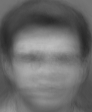

Image after NMF:


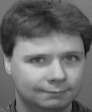

[[116. 119. 117. ... 124. 125. 125.]
 [122. 118. 120. ... 123. 123. 122.]
 [118. 120. 118. ... 130. 121. 128.]
 ...
 [104. 101. 104. ...  75.  84.  89.]
 [119. 102. 118. ...  60.  64.  84.]
 [ 94.  84. 107. ...  60.  54.  64.]]
Image Before NMF:
-------------------------------Number of image: 147
[[43. 43. 43. ... 42. 43. 43.]
 [43. 43. 43. ... 43. 42. 43.]
 [44. 43. 43. ... 43. 43. 42.]
 ...
 [56. 53. 53. ... 60. 58. 60.]
 [58. 57. 58. ... 62. 61. 59.]
 [60. 61. 62. ... 67. 65. 61.]]


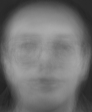

Image after NMF:


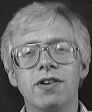

[[ 35.  36.  37. ...  36.  33.  37.]
 [ 35.  35.  39. ...  39.  33.  36.]
 [ 36.  36.  37. ...  39.  36.  32.]
 ...
 [ 39.  38.  41. ...  29.  28.  29.]
 [ 34.  36.  39. ...  52.  49.  35.]
 [ 36.  36.  40. ... 144. 147. 143.]]
Image Before NMF:
-------------------------------Number of image: 148
[[36. 36. 36. ... 33. 33. 33.]
 [36. 36. 36. ... 33. 33. 33.]
 [36. 36. 36. ... 33. 33. 33.]
 ...
 [78. 76. 77. ... 76. 74. 76.]
 [82. 83. 84. ... 80. 78. 75.]
 [86. 90. 90. ... 89. 86. 78.]]


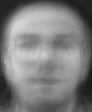

Image after NMF:


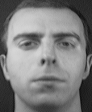

[[52. 51. 52. ... 40. 40. 37.]
 [49. 52. 53. ... 40. 34. 43.]
 [46. 58. 49. ... 37. 41. 39.]
 ...
 [37. 41. 38. ... 36. 31. 31.]
 [35. 39. 37. ... 34. 32. 31.]
 [41. 35. 39. ... 33. 34. 32.]]
Image Before NMF:
-------------------------------Number of image: 149
[[106. 107. 107. ... 103. 103. 103.]
 [106. 107. 107. ... 103. 103. 103.]
 [107. 107. 107. ... 103. 103. 103.]
 ...
 [170. 171. 172. ... 113. 111. 110.]
 [175. 177. 179. ... 117. 116. 115.]
 [178. 181. 184. ... 118. 117. 117.]]


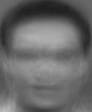

Image after NMF:


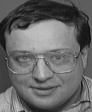

[[ 94.  98.  94. ...  92.  93.  95.]
 [ 97.  95.  98. ...  91.  91.  94.]
 [ 94.  96.  95. ...  96.  93.  96.]
 ...
 [172. 172. 169. ... 131. 132. 123.]
 [182. 166. 150. ... 137. 130. 115.]
 [172. 159. 138. ... 126. 148. 135.]]
Image Before NMF:
-------------------------------Number of image: 150
[[112. 112. 112. ... 110. 110. 109.]
 [112. 112. 112. ... 110. 110. 110.]
 [112. 113. 112. ... 110. 110. 110.]
 ...
 [ 74.  73.  77. ...  53.  55.  55.]
 [ 74.  72.  78. ...  51.  53.  55.]
 [ 72.  73.  76. ...  51.  53.  53.]]


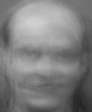

Image after NMF:


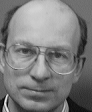

[[108. 109. 110. ... 112. 115. 108.]
 [107. 106. 105. ... 109. 114. 110.]
 [105. 108. 108. ... 110. 111. 112.]
 ...
 [ 23.   9.  78. ...  49.  48.  49.]
 [ 29.   6. 103. ...  33.  43.  48.]
 [ 29.   8. 101. ...  24.  23.  30.]]
Image Before NMF:
-------------------------------Number of image: 151
[[52. 51. 52. ... 60. 59. 60.]
 [51. 51. 51. ... 60. 60. 60.]
 [52. 51. 52. ... 59. 60. 60.]
 ...
 [37. 34. 35. ... 59. 59. 60.]
 [37. 36. 36. ... 62. 60. 58.]
 [38. 39. 39. ... 66. 63. 61.]]


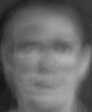

Image after NMF:


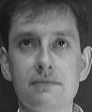

[[35. 35. 35. ... 47. 45. 47.]
 [36. 34. 39. ... 51. 45. 46.]
 [35. 36. 35. ... 48. 48. 48.]
 ...
 [37. 39. 37. ... 58. 58. 57.]
 [34. 40. 35. ... 54. 60. 54.]
 [35. 36. 39. ... 56. 58. 55.]]
Image Before NMF:
-------------------------------Number of image: 152
[[100.  99.  99. ...  99. 100. 101.]
 [ 99.  99.  98. ... 100.  99. 100.]
 [100.  99.  99. ... 100. 100. 100.]
 ...
 [ 28.  28.  27. ...  13.  14.  15.]
 [ 30.  29.  31. ...  12.  13.  15.]
 [ 32.  32.  32. ...  11.  12.  14.]]


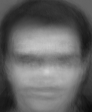

Image after NMF:


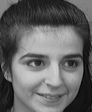

[[137. 135. 136. ... 129. 131. 128.]
 [137. 135. 133. ... 133. 128. 127.]
 [137. 134. 136. ... 130. 125. 127.]
 ...
 [ 26.  27.  28. ...  28.  21.  22.]
 [ 23.  25.  25. ...  19.  21.  26.]
 [ 24.  28.  24. ...  19.  24.  41.]]
Image Before NMF:
-------------------------------Number of image: 153
[[107. 107. 107. ... 110. 109. 109.]
 [107. 107. 107. ... 110. 110. 109.]
 [107. 107. 107. ... 109. 110. 110.]
 ...
 [ 90.  91.  96. ...  72.  74.  74.]
 [ 92.  93.  98. ...  73.  73.  74.]
 [ 91.  97. 100. ...  78.  78.  74.]]


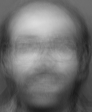

Image after NMF:


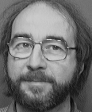

[[124. 123. 126. ... 115. 113. 116.]
 [123. 125. 123. ... 113. 114. 114.]
 [123. 125. 121. ... 112. 113. 113.]
 ...
 [114. 131. 117. ...  78.  77.  74.]
 [119. 105. 127. ...  76.  76.  73.]
 [143.  98. 132. ...  75.  72.  78.]]
Image Before NMF:
-------------------------------Number of image: 154
[[132. 132. 132. ... 126. 126. 126.]
 [132. 133. 132. ... 126. 126. 126.]
 [133. 133. 132. ... 126. 126. 126.]
 ...
 [113. 107. 110. ...  90.  89.  89.]
 [112. 109. 114. ...  89.  90.  91.]
 [112. 110. 113. ...  90.  90.  90.]]


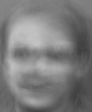

Image after NMF:


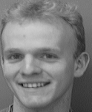

[[130. 133. 129. ... 121. 121. 124.]
 [131. 132. 135. ... 123. 122. 125.]
 [132. 130. 132. ... 124. 121. 123.]
 ...
 [108. 111. 114. ...  55.  56.  55.]
 [116. 129. 124. ...  52.  56.  56.]
 [129. 126. 112. ...  54.  54.  56.]]
Image Before NMF:
-------------------------------Number of image: 155
[[80. 80. 80. ... 80. 80. 80.]
 [80. 80. 80. ... 80. 80. 80.]
 [80. 80. 80. ... 80. 80. 80.]
 ...
 [30. 29. 30. ... 27. 28. 29.]
 [31. 30. 33. ... 26. 27. 27.]
 [32. 33. 34. ... 29. 29. 28.]]


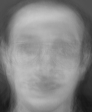

Image after NMF:


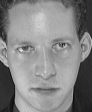

[[39. 44. 53. ... 47. 48. 47.]
 [44. 44. 61. ... 47. 45. 46.]
 [59. 39. 57. ... 46. 46. 44.]
 ...
 [49. 46. 42. ... 30. 32. 28.]
 [46. 35. 34. ... 30. 29. 27.]
 [32. 37. 27. ... 29. 26. 29.]]
Image Before NMF:
-------------------------------Number of image: 156
[[101. 101. 101. ...  98.  98.  98.]
 [101. 101. 101. ...  98.  98.  98.]
 [101. 101. 101. ...  98.  98.  98.]
 ...
 [120. 121. 123. ...  83.  83.  82.]
 [124. 125. 128. ...  86.  85.  85.]
 [125. 129. 131. ...  87.  87.  86.]]


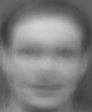

Image after NMF:


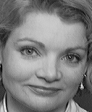

[[ 95.  89.  89. ... 103. 112.  91.]
 [ 95.  95.  93. ...  89. 107. 111.]
 [ 91.  95.  94. ...  80.  99. 100.]
 ...
 [173. 209. 208. ...  57.  54.  54.]
 [180. 209. 209. ...  54.  58.  54.]
 [184. 207. 208. ...  43.  55.  55.]]
Image Before NMF:
-------------------------------Number of image: 157
[[ 49.  49.  49. ...  48.  48.  48.]
 [ 49.  49.  49. ...  48.  48.  48.]
 [ 49.  49.  49. ...  48.  48.  47.]
 ...
 [ 84.  89.  90. ...  55.  55.  56.]
 [ 92.  97.  97. ...  59.  58.  56.]
 [ 96. 106. 105. ...  67.  66.  59.]]


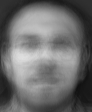

Image after NMF:


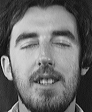

[[48. 45. 45. ... 41. 40. 39.]
 [52. 46. 46. ... 39. 43. 38.]
 [49. 46. 47. ... 45. 38. 46.]
 ...
 [59. 45. 57. ... 30. 30. 35.]
 [53. 52. 53. ... 28. 30. 37.]
 [45. 49. 52. ... 28. 37. 29.]]
Image Before NMF:
-------------------------------Number of image: 158
[[59. 59. 59. ... 58. 58. 58.]
 [59. 59. 59. ... 58. 58. 58.]
 [59. 59. 59. ... 58. 58. 58.]
 ...
 [84. 85. 88. ... 65. 65. 66.]
 [88. 91. 93. ... 69. 68. 66.]
 [90. 97. 98. ... 77. 76. 68.]]


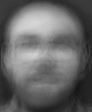

Image after NMF:


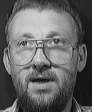

[[ 44.  44.  47. ...  37.  41.  34.]
 [ 43.  46.  50. ...  41.  41.  37.]
 [ 48.  44.  48. ...  40.  43.  35.]
 ...
 [ 43.  49.  47. ... 117. 121. 112.]
 [115. 128. 129. ... 185. 124. 111.]
 [127. 134. 142. ... 188. 165. 106.]]
Image Before NMF:
-------------------------------Number of image: 159
[[107. 107. 107. ... 109. 108. 108.]
 [107. 107. 107. ... 109. 109. 108.]
 [107. 107. 107. ... 108. 109. 109.]
 ...
 [106. 109. 110. ...  75.  75.  74.]
 [111. 112. 114. ...  77.  77.  77.]
 [112. 117. 118. ...  79.  77.  78.]]


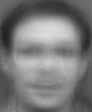

Image after NMF:


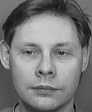

[[119. 121. 123. ... 117. 117. 114.]
 [119. 120. 123. ... 117. 118. 116.]
 [122. 121. 117. ... 115. 115. 118.]
 ...
 [ 82.  86.  89. ...  80.  79.  77.]
 [ 90. 100.  98. ...  78.  82.  82.]
 [104. 103. 104. ...  75.  79.  78.]]
Image Before NMF:
-------------------------------Number of image: 160
[[76. 75. 76. ... 80. 80. 80.]
 [76. 76. 75. ... 80. 80. 80.]
 [76. 76. 76. ... 80. 80. 81.]
 ...
 [36. 40. 41. ... 39. 40. 41.]
 [43. 42. 43. ... 38. 39. 40.]
 [46. 48. 50. ... 38. 39. 40.]]


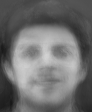

Image after NMF:


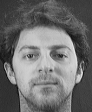

[[48. 47. 53. ... 61. 59. 60.]
 [50. 48. 52. ... 56. 61. 58.]
 [53. 47. 53. ... 54. 64. 60.]
 ...
 [50. 55. 49. ... 64. 67. 59.]
 [52. 50. 49. ... 63. 65. 60.]
 [52. 49. 50. ... 61. 66. 67.]]
Image Before NMF:
-------------------------------Number of image: 161
[[88. 87. 88. ... 95. 95. 95.]
 [88. 87. 87. ... 95. 95. 95.]
 [88. 87. 87. ... 95. 96. 96.]
 ...
 [46. 44. 48. ... 54. 55. 57.]
 [46. 45. 48. ... 54. 54. 55.]
 [46. 46. 49. ... 57. 57. 56.]]


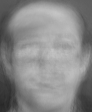

Image after NMF:


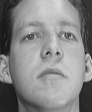

[[42. 41. 44. ... 50. 49. 57.]
 [41. 41. 43. ... 51. 53. 53.]
 [54. 40. 43. ... 49. 52. 53.]
 ...
 [38. 37. 36. ... 40. 43. 40.]
 [38. 36. 37. ... 44. 42. 39.]
 [37. 39. 37. ... 42. 43. 41.]]
Image Before NMF:
-------------------------------Number of image: 162
[[ 73.  73.  74. ...  68.  68.  68.]
 [ 73.  74.  74. ...  68.  68.  68.]
 [ 73.  74.  74. ...  69.  68.  68.]
 ...
 [146. 148. 149. ...  94.  92.  92.]
 [151. 154. 156. ...  98.  97.  96.]
 [154. 159. 161. ... 102. 100.  98.]]


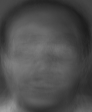

Image after NMF:


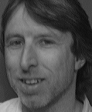

[[ 74.  74.  76. ...  67.  65.  67.]
 [ 72.  75.  75. ...  68.  65.  68.]
 [ 81.  72.  77. ...  66.  68.  65.]
 ...
 [183. 186. 186. ... 118. 121. 113.]
 [185. 190. 189. ... 128. 125. 114.]
 [186. 190. 190. ... 135. 127. 118.]]
Image Before NMF:
-------------------------------Number of image: 163
[[ 78.  78.  78. ...  79.  78.  79.]
 [ 78.  78.  78. ...  79.  79.  79.]
 [ 78.  78.  79. ...  79.  79.  79.]
 ...
 [144. 148. 149. ...  99.  97.  96.]
 [151. 153. 154. ... 102. 101. 100.]
 [154. 159. 161. ... 104. 102. 102.]]


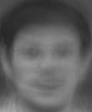

Image after NMF:


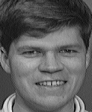

[[101.  86.  71. ... 101. 101. 102.]
 [ 92.  73.  69. ... 100. 102. 103.]
 [ 85.  69.  77. ... 101. 103. 103.]
 ...
 [ 78.  85. 161. ...  76.  72.  79.]
 [144. 155. 180. ...  72.  77.  75.]
 [171. 167. 186. ...  81. 105.  87.]]
Image Before NMF:
-------------------------------Number of image: 164
[[121. 121. 122. ... 124. 123. 123.]
 [121. 121. 121. ... 124. 124. 123.]
 [122. 121. 121. ... 123. 124. 124.]
 ...
 [ 67.  60.  65. ...  83.  84.  84.]
 [ 64.  60.  66. ...  82.  83.  83.]
 [ 63.  61.  64. ...  85.  85.  83.]]


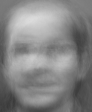

Image after NMF:


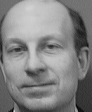

[[108. 111. 110. ... 113. 114. 115.]
 [110. 108. 110. ... 114. 116. 116.]
 [105. 110. 107. ... 113. 115. 113.]
 ...
 [ 81.  84.  90. ...  48.  57.  47.]
 [ 83.  93.  83. ...  54.  52.  53.]
 [ 85.  90.  88. ...  53.  48.  56.]]
Image Before NMF:
-------------------------------Number of image: 165
[[96. 97. 97. ... 96. 95. 95.]
 [96. 97. 97. ... 96. 95. 95.]
 [97. 96. 97. ... 95. 96. 95.]
 ...
 [37. 38. 37. ... 35. 37. 36.]
 [42. 41. 42. ... 37. 36. 36.]
 [45. 48. 46. ... 39. 38. 37.]]


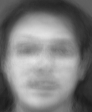

Image after NMF:


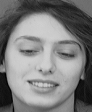

[[117. 114. 116. ... 111. 108. 113.]
 [112. 116. 112. ... 109. 110. 109.]
 [116. 113. 114. ... 111. 111. 111.]
 ...
 [ 65.  65.  56. ...  81.  82.  79.]
 [ 67.  68.  65. ...  80.  87.  87.]
 [ 67.  68.  73. ...  85.  89.  91.]]
Image Before NMF:
-------------------------------Number of image: 166
[[109. 109. 110. ... 104. 105. 105.]
 [109. 110. 109. ... 105. 104. 105.]
 [109. 109. 110. ... 105. 105. 105.]
 ...
 [146. 149. 151. ...  79.  78.  77.]
 [152. 154. 157. ...  81.  81.  82.]
 [154. 158. 160. ...  82.  82.  82.]]


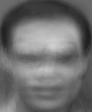

Image after NMF:


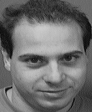

[[ 97. 105. 107. ... 106. 105. 108.]
 [104. 102. 106. ... 103. 108. 107.]
 [107. 106. 103. ... 106. 106. 106.]
 ...
 [138. 138. 139. ...  66.  68.  65.]
 [138. 139. 138. ...  66.  68.  67.]
 [135. 143. 144. ...  76.  67.  74.]]
Image Before NMF:
-------------------------------Number of image: 167
[[ 94.  94.  94. ... 100. 100.  99.]
 [ 94.  93.  93. ... 100. 100. 100.]
 [ 94.  94.  93. ...  99. 100. 101.]
 ...
 [ 65.  65.  71. ...  57.  59.  60.]
 [ 65.  66.  71. ...  57.  58.  59.]
 [ 65.  69.  72. ...  61.  62.  59.]]


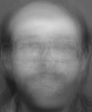

Image after NMF:


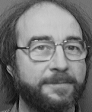

[[122. 125. 123. ... 116. 113. 113.]
 [123. 124. 123. ... 112. 115. 116.]
 [124. 124. 124. ... 112. 115. 113.]
 ...
 [ 73.  73.  69. ...  78.  76.  76.]
 [ 72.  74.  78. ...  76.  73.  78.]
 [ 86.  96. 116. ...  75.  74.  74.]]
Image Before NMF:
-------------------------------Number of image: 168
[[ 86.  86.  86. ...  78.  78.  78.]
 [ 86.  86.  86. ...  78.  78.  78.]
 [ 86.  86.  87. ...  79.  78.  78.]
 ...
 [170. 173. 173. ...  98.  95.  94.]
 [177. 180. 181. ... 102. 101. 101.]
 [181. 186. 188. ... 103. 102. 102.]]


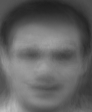

Image after NMF:


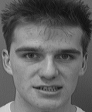

[[110. 111. 110. ... 103. 102. 100.]
 [110. 110. 112. ... 101. 104. 100.]
 [111. 109. 111. ... 100. 102. 104.]
 ...
 [198. 201. 203. ...  62.  65.  62.]
 [201. 201. 203. ...  64.  60.  62.]
 [202. 203. 203. ...  63.  59.  60.]]
Image Before NMF:
-------------------------------Number of image: 169
[[101. 101. 102. ... 108. 108. 108.]
 [101. 101. 102. ... 109. 109. 108.]
 [101. 101. 102. ... 108. 109. 109.]
 ...
 [ 99. 104. 105. ...  74.  75.  74.]
 [105. 107. 108. ...  77.  76.  77.]
 [107. 112. 113. ...  79.  77.  78.]]


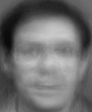

Image after NMF:


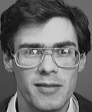

[[108. 110. 111. ... 105. 106. 107.]
 [108. 110. 109. ... 108. 105. 106.]
 [109. 108. 109. ... 107. 104. 106.]
 ...
 [ 46.  41.  46. ...  30.  35.  32.]
 [ 46.  42.  50. ...  38.  38.  35.]
 [ 55.  49.  43. ...  26.  37.  37.]]
Image Before NMF:
-------------------------------Number of image: 170
[[51. 51. 51. ... 50. 50. 50.]
 [51. 51. 51. ... 50. 50. 50.]
 [51. 51. 51. ... 50. 50. 50.]
 ...
 [81. 79. 81. ... 77. 75. 76.]
 [84. 84. 86. ... 79. 78. 76.]
 [86. 89. 90. ... 84. 82. 78.]]


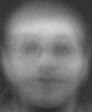

Image after NMF:


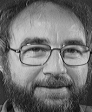

[[ 48.  50.  51. ...  50.  50.  52.]
 [ 49.  54.  50. ...  50.  48.  49.]
 [ 60.  50.  52. ...  52.  48.  47.]
 ...
 [ 81.  47. 135. ...  92.  93. 103.]
 [ 58.  84. 147. ...  90.  90. 105.]
 [ 62. 135. 144. ...  87.  90.  99.]]
Image Before NMF:
-------------------------------Number of image: 171
[[ 81.  82.  82. ...  79.  78.  78.]
 [ 81.  82.  82. ...  79.  79.  79.]
 [ 81.  82.  82. ...  79.  79.  79.]
 ...
 [182. 187. 189. ... 114. 112. 111.]
 [190. 195. 197. ... 120. 118. 117.]
 [193. 202. 204. ... 125. 123. 119.]]


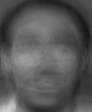

Image after NMF:


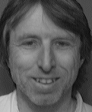

[[ 83.  86.  84. ...  74.  72.  75.]
 [ 84.  84.  84. ...  75.  74.  75.]
 [ 83.  85.  82. ...  73.  76.  74.]
 ...
 [194. 193. 193. ... 137. 134. 133.]
 [193. 195. 192. ... 135. 135. 134.]
 [194. 194. 194. ... 136. 138. 134.]]
Image Before NMF:
-------------------------------Number of image: 172
[[108. 108. 108. ... 106. 106. 106.]
 [108. 108. 108. ... 106. 106. 106.]
 [108. 108. 108. ... 106. 106. 106.]
 ...
 [ 77.  78.  79. ...  53.  54.  54.]
 [ 81.  80.  83. ...  53.  54.  55.]
 [ 82.  84.  86. ...  54.  54.  55.]]


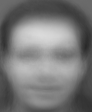

Image after NMF:


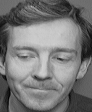

[[110. 106. 109. ... 108. 112. 109.]
 [109. 107. 110. ... 108. 110. 110.]
 [108. 107. 110. ... 109. 110. 108.]
 ...
 [ 68.  71.  61. ...  59.  53.  55.]
 [ 72.  68.  60. ...  54.  53.  60.]
 [ 68.  65.  60. ...  49.  53.  53.]]
Image Before NMF:
-------------------------------Number of image: 173
[[114. 114. 114. ... 112. 111. 111.]
 [114. 114. 114. ... 112. 112. 111.]
 [114. 114. 114. ... 111. 112. 111.]
 ...
 [ 83.  79.  81. ...  70.  71.  71.]
 [ 82.  81.  85. ...  72.  71.  72.]
 [ 82.  84.  85. ...  74.  73.  72.]]


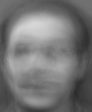

Image after NMF:


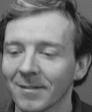

[[101. 104. 104. ... 109. 111. 108.]
 [101. 101. 104. ... 108. 109. 106.]
 [102. 103.  99. ... 108. 109. 109.]
 ...
 [ 68.  71.  72. ...  47.  45.  45.]
 [ 72.  78.  74. ...  50.  45.  44.]
 [ 71.  66.  72. ...  42.  46.  43.]]
Image Before NMF:
-------------------------------Number of image: 174
[[ 81.  81.  81. ...  81.  81.  81.]
 [ 81.  81.  81. ...  81.  81.  81.]
 [ 81.  81.  82. ...  81.  81.  82.]
 ...
 [153. 157. 158. ... 102. 100.  99.]
 [160. 163. 164. ... 106. 104. 104.]
 [164. 169. 171. ... 107. 105. 106.]]


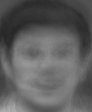

Image after NMF:


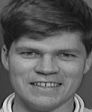

[[ 98.  94. 100. ... 102.  98. 102.]
 [ 94.  97.  99. ...  98. 102. 104.]
 [ 94.  97.  97. ... 100. 103. 100.]
 ...
 [135. 168. 160. ... 105. 122. 127.]
 [166. 175. 173. ... 165. 151. 153.]
 [183. 173. 190. ... 164. 167. 164.]]
Image Before NMF:
-------------------------------Number of image: 175
[[ 76.  76.  76. ...  73.  73.  73.]
 [ 76.  76.  76. ...  73.  73.  73.]
 [ 76.  76.  77. ...  73.  73.  73.]
 ...
 [132. 135. 135. ...  86.  84.  83.]
 [139. 141. 142. ...  89.  88.  88.]
 [142. 146. 148. ...  90.  89.  89.]]


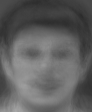

Image after NMF:


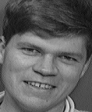

[[104. 100. 101. ...  54.  61.  46.]
 [103. 103. 102. ...  49.  64.  54.]
 [102. 102. 102. ...  48.  63.  58.]
 ...
 [135. 132. 132. ...  77.  76.  75.]
 [144. 134. 131. ...  75.  78.  72.]
 [140. 134. 132. ...  89.  79.  77.]]
Image Before NMF:
-------------------------------Number of image: 176
[[114. 114. 114. ... 122. 122. 121.]
 [114. 113. 114. ... 122. 123. 122.]
 [114. 114. 113. ... 121. 122. 123.]
 ...
 [ 56.  55.  62. ...  65.  68.  69.]
 [ 55.  54.  60. ...  64.  65.  67.]
 [ 54.  56.  60. ...  68.  68.  66.]]


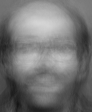

Image after NMF:


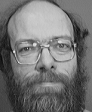

[[118. 120. 118. ... 122. 121. 119.]
 [121. 120. 121. ... 121. 121. 122.]
 [121. 119. 121. ... 122. 122. 120.]
 ...
 [ 63.  68.  65. ...  95.  98.  99.]
 [ 67.  65.  67. ...  98.  98. 100.]
 [ 66.  67.  66. ... 131. 113. 102.]]
Image Before NMF:
-------------------------------Number of image: 177
[[55. 54. 54. ... 58. 58. 58.]
 [54. 54. 54. ... 58. 58. 58.]
 [54. 54. 54. ... 58. 58. 59.]
 ...
 [34. 35. 35. ... 48. 48. 49.]
 [38. 36. 37. ... 48. 48. 48.]
 [42. 41. 43. ... 48. 48. 49.]]


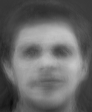

Image after NMF:


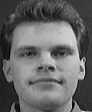

[[ 48.  47.  47. ...  60.  57.  59.]
 [ 46.  46.  51. ...  59.  59.  63.]
 [ 50.  47.  49. ...  59.  59.  61.]
 ...
 [ 37.  35.  37. ...  51.  46.  47.]
 [ 37.  36.  38. ...  48.  45.  46.]
 [ 37.  41.  40. ... 120. 104.  66.]]
Image Before NMF:
-------------------------------Number of image: 178
[[ 95.  95.  96. ...  94.  94.  94.]
 [ 95.  95.  96. ...  94.  94.  94.]
 [ 95.  95.  96. ...  94.  94.  94.]
 ...
 [125. 128. 129. ...  77.  77.  76.]
 [130. 132. 134. ...  81.  80.  80.]
 [131. 137. 138. ...  82.  81.  81.]]


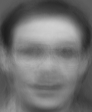

Image after NMF:


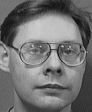

[[116. 112. 115. ... 107. 109. 113.]
 [116. 117. 114. ... 112. 106. 114.]
 [117. 113. 118. ... 112. 111. 111.]
 ...
 [ 98. 101.  97. ...  49.  56.  49.]
 [100.  99.  98. ...  57.  53.  52.]
 [102. 100. 110. ...  51.  55.  54.]]
Image Before NMF:
-------------------------------Number of image: 179
[[112. 111. 112. ... 108. 108. 109.]
 [112. 112. 111. ... 108. 107. 108.]
 [113. 112. 112. ... 108. 109. 107.]
 ...
 [ 34.  34.  33. ...  16.  17.  18.]
 [ 37.  35.  37. ...  15.  16.  18.]
 [ 38.  37.  38. ...  13.  14.  17.]]


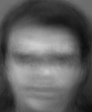

Image after NMF:


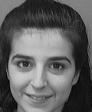

[[140. 134. 135. ... 129. 126. 128.]
 [140. 136. 135. ... 127. 126. 128.]
 [142. 132. 137. ... 126. 128. 128.]
 ...
 [ 63.  48.  47. ...  15.  26.  27.]
 [ 42.  45.  48. ...  23.  24.  36.]
 [ 43.  55.  43. ...  25.  26.  49.]]
Image Before NMF:
-------------------------------Number of image: 180
[[118. 117. 118. ... 114. 114. 114.]
 [118. 118. 117. ... 114. 114. 114.]
 [118. 118. 118. ... 114. 114. 114.]
 ...
 [132. 135. 136. ...  74.  73.  73.]
 [138. 139. 142. ...  75.  76.  77.]
 [140. 143. 146. ...  75.  75.  77.]]


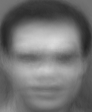

Image after NMF:


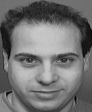

[[110. 112. 113. ... 112. 109. 115.]
 [108. 116. 113. ... 109. 114. 111.]
 [114. 110. 112. ... 111. 113. 110.]
 ...
 [141. 142. 141. ...  86.  91.  83.]
 [141. 141. 139. ...  86.  87.  88.]
 [137. 143. 137. ...  92.  87.  90.]]
Image Before NMF:
-------------------------------Number of image: 181
[[47. 47. 47. ... 45. 45. 45.]
 [47. 47. 47. ... 45. 44. 45.]
 [47. 47. 47. ... 45. 45. 44.]
 ...
 [46. 43. 42. ... 48. 46. 47.]
 [47. 46. 47. ... 49. 48. 47.]
 [50. 50. 50. ... 53. 51. 49.]]


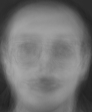

Image after NMF:


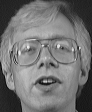

[[35. 32. 36. ... 36. 31. 35.]
 [38. 30. 35. ... 34. 33. 34.]
 [38. 34. 35. ... 30. 33. 33.]
 ...
 [35. 37. 41. ... 26. 25. 26.]
 [40. 38. 42. ... 26. 27. 27.]
 [42. 40. 40. ... 25. 28. 29.]]
Image Before NMF:
-------------------------------Number of image: 182
[[52. 52. 52. ... 50. 50. 50.]
 [53. 52. 52. ... 50. 50. 50.]
 [53. 53. 52. ... 50. 50. 50.]
 ...
 [86. 82. 86. ... 82. 81. 82.]
 [87. 87. 90. ... 84. 83. 81.]
 [89. 91. 93. ... 91. 90. 84.]]


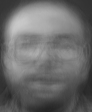

Image after NMF:


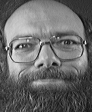

[[58. 48. 47. ... 46. 53. 42.]
 [56. 54. 50. ... 47. 48. 45.]
 [50. 50. 53. ... 47. 50. 47.]
 ...
 [61. 59. 82. ... 51. 39. 36.]
 [65. 63. 70. ... 34. 43. 38.]
 [76. 77. 81. ... 31. 43. 41.]]
Image Before NMF:
-------------------------------Number of image: 183
[[113. 112. 113. ... 112. 112. 113.]
 [113. 113. 112. ... 112. 112. 113.]
 [113. 113. 113. ... 112. 113. 113.]
 ...
 [144. 147. 149. ...  86.  86.  85.]
 [149. 151. 154. ...  89.  89.  89.]
 [151. 154. 157. ...  89.  89.  90.]]


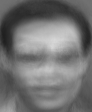

Image after NMF:


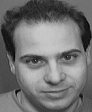

[[110. 109. 111. ... 111. 113. 116.]
 [108. 111. 109. ... 113. 112. 113.]
 [108. 109. 111. ... 110. 114. 115.]
 ...
 [137. 137. 141. ...  95.  89.  90.]
 [140. 133. 144. ...  96.  86.  90.]
 [142. 136. 138. ...  94.  88.  90.]]
Image Before NMF:
-------------------------------Number of image: 184
[[70. 70. 70. ... 71. 71. 72.]
 [70. 70. 70. ... 72. 71. 71.]
 [71. 70. 70. ... 71. 72. 71.]
 ...
 [30. 29. 29. ... 32. 32. 33.]
 [32. 32. 32. ... 33. 32. 32.]
 [34. 36. 35. ... 36. 35. 34.]]


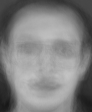

Image after NMF:


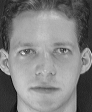

[[48. 49. 45. ... 56. 56. 54.]
 [45. 52. 39. ... 52. 50. 51.]
 [45. 50. 42. ... 48. 53. 50.]
 ...
 [50. 48. 50. ... 45. 46. 46.]
 [45. 54. 49. ... 46. 47. 47.]
 [51. 51. 51. ... 47. 46. 46.]]
Image Before NMF:
-------------------------------Number of image: 185
[[123. 123. 123. ... 130. 129. 129.]
 [123. 123. 123. ... 130. 130. 129.]
 [123. 123. 123. ... 129. 130. 130.]
 ...
 [ 79.  79.  83. ...  78.  79.  79.]
 [ 80.  79.  83. ...  77.  78.  80.]
 [ 80.  81.  85. ...  77.  77.  79.]]


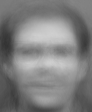

Image after NMF:


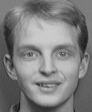

[[127. 131. 128. ... 123. 127. 122.]
 [132. 126. 127. ... 124. 126. 122.]
 [128. 127. 122. ... 123. 126. 124.]
 ...
 [ 95.  89.  86. ...  89.  91.  93.]
 [ 99.  91.  84. ...  93.  87.  90.]
 [ 96.  94.  88. ...  94.  84.  89.]]
Image Before NMF:
-------------------------------Number of image: 186
[[ 97.  97.  97. ... 100. 100. 100.]
 [ 97.  97.  97. ... 101. 100. 100.]
 [ 97.  97.  97. ... 100. 101. 101.]
 ...
 [ 46.  43.  45. ...  61.  62.  63.]
 [ 46.  43.  47. ...  61.  61.  61.]
 [ 47.  46.  48. ...  63.  62.  62.]]


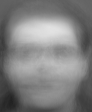

Image after NMF:


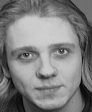

[[ 95. 101.  99. ... 109. 109. 110.]
 [ 98.  97.  99. ... 110. 108. 111.]
 [ 98.  98.  95. ... 111. 110. 109.]
 ...
 [ 62.  53.  61. ...  25.  42.  39.]
 [ 48.  69.  62. ...  31.  45.  43.]
 [ 55.  65.  46. ...  40.  42.  53.]]
Image Before NMF:
-------------------------------Number of image: 187
[[107. 107. 107. ... 111. 110. 110.]
 [107. 107. 107. ... 111. 111. 110.]
 [107. 107. 107. ... 110. 111. 111.]
 ...
 [ 58.  58.  62. ...  49.  51.  51.]
 [ 58.  58.  62. ...  47.  49.  51.]
 [ 58.  59.  62. ...  48.  49.  50.]]


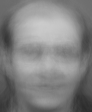

Image after NMF:


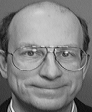

[[110. 106. 106. ... 117. 117. 122.]
 [109. 103. 109. ... 119. 119. 121.]
 [107. 104. 108. ... 119. 117. 120.]
 ...
 [ 24.  21.  28. ...  23.  19.  24.]
 [ 22.  22.  24. ...  20.  18.  21.]
 [ 20.  30.  25. ...  19.  21.  19.]]
Image Before NMF:
-------------------------------Number of image: 188
[[ 90.  90.  91. ...  96.  96.  96.]
 [ 90.  90.  90. ...  97.  97.  96.]
 [ 90.  89.  91. ...  96.  97.  97.]
 ...
 [103. 107. 108. ...  76.  77.  76.]
 [108. 111. 111. ...  80.  79.  78.]
 [110. 116. 116. ...  83.  80.  81.]]


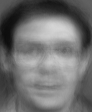

Image after NMF:


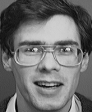

[[108. 110. 108. ... 107. 105. 105.]
 [110. 110. 110. ... 108. 104. 106.]
 [111. 107. 111. ... 107. 108. 107.]
 ...
 [ 40.  40.  44. ...  40.  36.  32.]
 [ 44.  48.  52. ...  26.  37.  36.]
 [ 41.  47.  54. ...  36.  35.  34.]]
Image Before NMF:
-------------------------------Number of image: 189
[[ 55.  55.  55. ...  53.  53.  52.]
 [ 55.  55.  56. ...  53.  53.  52.]
 [ 55.  55.  56. ...  53.  53.  52.]
 ...
 [117. 118. 119. ...  86.  84.  84.]
 [121. 124. 125. ...  90.  88.  86.]
 [124. 130. 131. ...  95.  93.  89.]]


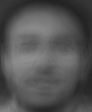

Image after NMF:


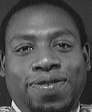

[[ 55.  56.  56. ...  55.  54.  50.]
 [ 56.  51.  60. ...  55.  47.  55.]
 [ 57.  54.  57. ...  51.  54.  52.]
 ...
 [183. 201. 201. ... 152. 149. 169.]
 [112. 148. 136. ... 107. 170. 192.]
 [125. 144. 128. ...  69. 144. 193.]]
Image Before NMF:
-------------------------------Number of image: 190
[[115. 115. 115. ... 109. 109. 108.]
 [115. 116. 116. ... 109. 109. 109.]
 [115. 116. 116. ... 109. 109. 109.]
 ...
 [145. 144. 146. ...  95.  94.  93.]
 [147. 147. 151. ...  97.  97.  97.]
 [148. 150. 153. ...  96.  96.  97.]]


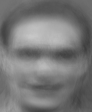

Image after NMF:


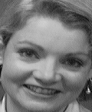

[[ 86.  89.  90. ... 143. 129. 125.]
 [ 83.  90.  89. ... 138. 140. 135.]
 [ 89.  89.  88. ... 136. 128. 131.]
 ...
 [201. 206. 209. ...  79.  75.  76.]
 [201. 206. 207. ... 112.  85.  66.]
 [201. 205. 208. ... 124. 116.  83.]]
Image Before NMF:
-------------------------------Number of image: 191
[[105. 105. 105. ... 106. 106. 106.]
 [105. 105. 105. ... 107. 107. 106.]
 [105. 105. 105. ... 106. 107. 107.]
 ...
 [125. 125. 127. ... 101. 100.  99.]
 [128. 128. 130. ... 103. 102. 102.]
 [130. 131. 134. ... 104. 102. 103.]]


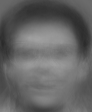

Image after NMF:


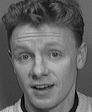

[[104. 108. 105. ... 104. 105. 108.]
 [104. 106. 105. ... 105. 106. 103.]
 [105. 105. 108. ... 102. 103. 106.]
 ...
 [ 83.  83.  99. ... 163. 176. 141.]
 [103. 124. 147. ... 179. 164. 148.]
 [160. 180. 156. ... 173. 175. 155.]]
Image Before NMF:
-------------------------------Number of image: 192
[[36. 35. 36. ... 32. 32. 33.]
 [36. 36. 35. ... 33. 32. 32.]
 [36. 36. 36. ... 32. 33. 32.]
 ...
 [82. 79. 79. ... 83. 80. 82.]
 [85. 86. 87. ... 86. 84. 81.]
 [89. 92. 93. ... 96. 93. 85.]]


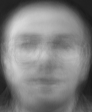

Image after NMF:


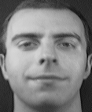

[[54. 52. 49. ... 44. 39. 36.]
 [53. 55. 47. ... 40. 40. 37.]
 [50. 53. 54. ... 40. 40. 35.]
 ...
 [43. 42. 40. ... 37. 28. 37.]
 [38. 40. 39. ... 34. 35. 31.]
 [42. 37. 36. ... 33. 33. 32.]]
Image Before NMF:
-------------------------------Number of image: 193
[[ 60.  61.  61. ...  58.  57.  57.]
 [ 60.  61.  61. ...  58.  58.  57.]
 [ 60.  60.  61. ...  58.  58.  57.]
 ...
 [132. 134. 135. ...  94.  92.  92.]
 [137. 140. 141. ...  99.  97.  95.]
 [140. 147. 148. ... 104. 101.  98.]]


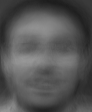

Image after NMF:


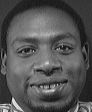

[[ 53.  58.  53. ...  48.  53.  53.]
 [ 54.  55.  64. ...  50.  50.  49.]
 [ 56.  57.  56. ...  52.  48.  54.]
 ...
 [123. 132. 109. ... 199. 140. 101.]
 [122. 146.  71. ... 202. 140.  81.]
 [105. 148.  77. ... 195. 122.  76.]]
Image Before NMF:
-------------------------------Number of image: 194
[[ 53.  54.  54. ...  46.  46.  46.]
 [ 54.  54.  54. ...  46.  46.  46.]
 [ 54.  54.  54. ...  47.  46.  45.]
 ...
 [166. 160. 160. ... 140. 135. 135.]
 [169. 168. 169. ... 145. 142. 139.]
 [173. 173. 175. ... 150. 146. 143.]]


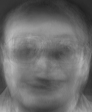

Image after NMF:


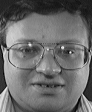

[[ 37.  36.  35. ...  33.  27.  29.]
 [ 36.  34.  35. ...  31.  29.  27.]
 [ 36.  34.  35. ...  30.  33.  28.]
 ...
 [184. 154. 188. ... 211. 192. 159.]
 [172. 152. 204. ... 215. 208. 149.]
 [163. 167. 213. ... 210. 212. 157.]]
Image Before NMF:
-------------------------------Number of image: 195
[[104. 104. 105. ... 106. 106. 106.]
 [104. 104. 105. ... 106. 106. 106.]
 [104. 104. 105. ... 106. 107. 106.]
 ...
 [110. 113. 115. ...  76.  77.  76.]
 [115. 117. 119. ...  79.  78.  79.]
 [117. 122. 123. ...  80.  79.  80.]]


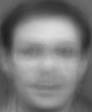

Image after NMF:


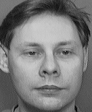

[[119. 121. 119. ... 118. 118. 119.]
 [118. 120. 121. ... 119. 119. 120.]
 [120. 120. 124. ... 116. 116. 116.]
 ...
 [ 84.  86.  83. ...  80.  79.  87.]
 [ 87.  82.  89. ...  78.  85.  76.]
 [ 85.  88. 105. ...  82.  78.  80.]]
Image Before NMF:
-------------------------------Number of image: 196
[[113. 113. 113. ... 116. 116. 115.]
 [113. 113. 113. ... 116. 117. 116.]
 [113. 113. 113. ... 116. 116. 117.]
 ...
 [ 50.  48.  53. ...  51.  53.  53.]
 [ 49.  47.  52. ...  49.  51.  52.]
 [ 48.  48.  51. ...  50.  51.  51.]]


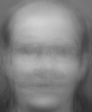

Image after NMF:


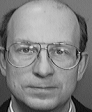

[[108. 112. 110. ... 119. 119. 122.]
 [111. 110. 113. ... 121. 120. 120.]
 [111. 111. 111. ... 119. 119. 120.]
 ...
 [ 23.  23.  20. ...  23.  35.  62.]
 [ 27.  28.  23. ...  24.  20.  27.]
 [ 25.  25.  19. ...  22.  30.  20.]]
Image Before NMF:
-------------------------------Number of image: 197
[[100. 100. 101. ... 105. 104. 105.]
 [100. 100. 100. ... 105. 105. 105.]
 [100. 100. 101. ... 104. 105. 105.]
 ...
 [113. 118. 120. ...  75.  75.  74.]
 [119. 122. 123. ...  77.  77.  77.]
 [122. 127. 129. ...  77.  77.  78.]]


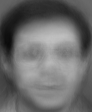

Image after NMF:


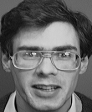

[[102. 103. 103. ... 103. 100. 101.]
 [102. 103. 103. ... 101.  97. 101.]
 [104. 102. 102. ... 101. 102. 101.]
 ...
 [ 43.  41.  42. ...  37.  36.  27.]
 [ 36.  41.  48. ...  37.  43.  35.]
 [ 42.  40.  31. ...  36.  37.  31.]]
Image Before NMF:
-------------------------------Number of image: 198
[[102. 102. 102. ... 106. 106. 106.]
 [102. 102. 102. ... 106. 106. 106.]
 [102. 102. 102. ... 106. 107. 107.]
 ...
 [ 70.  74.  76. ...  51.  53.  53.]
 [ 74.  75.  78. ...  52.  52.  54.]
 [ 75.  79.  81. ...  52.  53.  54.]]


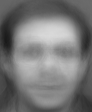

Image after NMF:


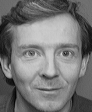

[[104. 109. 104. ... 110. 111. 109.]
 [104. 108. 106. ... 107. 112. 110.]
 [106. 103. 106. ... 109. 111. 112.]
 ...
 [ 73.  77.  78. ...  59.  56.  63.]
 [ 72.  84.  82. ...  56.  57.  60.]
 [ 78.  77.  77. ...  52.  59.  56.]]
Image Before NMF:
-------------------------------Number of image: 199
[[107. 107. 107. ... 107. 107. 107.]
 [108. 107. 107. ... 107. 107. 107.]
 [107. 107. 107. ... 107. 107. 108.]
 ...
 [ 87.  88.  91. ...  64.  64.  65.]
 [ 89.  89.  94. ...  63.  64.  66.]
 [ 90.  92.  96. ...  64.  65.  65.]]


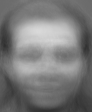

Image after NMF:


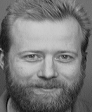

[[112. 109. 110. ... 112. 110. 111.]
 [108. 112. 110. ... 113. 112. 111.]
 [110. 110. 112. ... 114. 107. 116.]
 ...
 [107. 107. 107. ...  71.  77.  78.]
 [110. 108. 104. ...  59.  77.  77.]
 [109. 108. 104. ...  65.  69.  83.]]
Image Before NMF:
-------------------------------Number of image: 200
[[ 86.  86.  86. ...  84.  84.  83.]
 [ 86.  86.  86. ...  83.  84.  84.]
 [ 86.  86.  87. ...  84.  84.  84.]
 ...
 [160. 165. 166. ...  96.  94.  93.]
 [167. 170. 172. ...  99.  98.  98.]
 [169. 175. 178. ...  99.  98.  99.]]


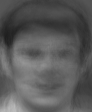

Image after NMF:


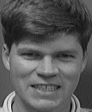

[[ 93.  92.  97. ... 102. 100.  98.]
 [ 92.  95.  90. ... 100.  99.  99.]
 [ 90.  95.  98. ...  96. 101. 102.]
 ...
 [187. 198. 196. ... 105. 102.  92.]
 [193. 202. 197. ... 107. 117. 117.]
 [197. 203. 196. ...  94.  90.  94.]]
Image Before NMF:
-------------------------------Number of image: 201
[[102. 103. 103. ...  98.  98.  97.]
 [102. 103. 103. ...  98.  98.  97.]
 [103. 103. 103. ...  98.  98.  97.]
 ...
 [ 39.  39.  38. ...  30.  31.  30.]
 [ 43.  42.  43. ...  30.  30.  31.]
 [ 46.  48.  47. ...  31.  30.  30.]]


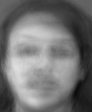

Image after NMF:


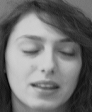

[[129. 127. 128. ... 117. 118. 115.]
 [130. 125. 129. ... 118. 118. 114.]
 [124. 128. 124. ... 118. 119. 115.]
 ...
 [ 39.  40.  40. ...  35.  39.  46.]
 [ 42.  39.  41. ...  32.  37.  41.]
 [ 45.  42.  42. ...  32.  35.  40.]]
Image Before NMF:
-------------------------------Number of image: 202
[[45. 45. 45. ... 45. 45. 45.]
 [45. 45. 45. ... 45. 44. 45.]
 [46. 45. 45. ... 45. 45. 45.]
 ...
 [69. 68. 70. ... 61. 61. 62.]
 [72. 74. 76. ... 64. 63. 61.]
 [75. 80. 81. ... 72. 71. 64.]]


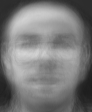

Image after NMF:


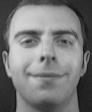

[[53. 50. 52. ... 39. 37. 42.]
 [52. 53. 52. ... 42. 33. 41.]
 [54. 57. 53. ... 40. 39. 44.]
 ...
 [42. 40. 42. ... 36. 28. 35.]
 [40. 40. 39. ... 32. 37. 33.]
 [40. 35. 41. ... 35. 34. 33.]]
Image Before NMF:
-------------------------------Number of image: 203
[[131. 131. 132. ... 127. 127. 127.]
 [131. 132. 132. ... 127. 127. 127.]
 [132. 131. 132. ... 127. 127. 127.]
 ...
 [106. 107. 108. ...  63.  63.  62.]
 [110. 111. 113. ...  64.  64.  65.]
 [113. 115. 116. ...  63.  63.  65.]]


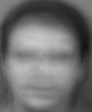

Image after NMF:


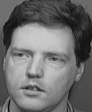

[[109. 112. 114. ... 104. 108. 109.]
 [113. 112. 112. ... 105. 107. 105.]
 [111. 112. 112. ... 108. 105. 103.]
 ...
 [120.  84. 113. ...  71.  71.  68.]
 [101.  90. 123. ...  72.  71.  71.]
 [ 80. 108. 124. ...  69.  72.  69.]]
Image Before NMF:
-------------------------------Number of image: 204
[[126. 126. 127. ... 124. 123. 124.]
 [126. 127. 126. ... 124. 123. 123.]
 [127. 127. 127. ... 124. 124. 123.]
 ...
 [ 88.  86.  87. ...  66.  66.  66.]
 [ 91.  89.  92. ...  67.  67.  68.]
 [ 93.  92.  94. ...  66.  66.  68.]]


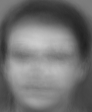

Image after NMF:


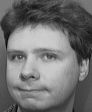

[[124. 126. 124. ... 120. 120. 119.]
 [124. 122. 126. ... 121. 117. 120.]
 [125. 125. 123. ... 120. 117. 121.]
 ...
 [ 74.  74.  68. ...  81.  79.  79.]
 [ 74.  71.  69. ...  79.  78.  82.]
 [ 72.  72.  68. ...  78.  78.  77.]]
Image Before NMF:
-------------------------------Number of image: 205
[[123. 122. 123. ... 121. 121. 121.]
 [123. 123. 122. ... 121. 121. 121.]
 [123. 123. 123. ... 121. 121. 121.]
 ...
 [101.  96.  99. ...  80.  79.  80.]
 [101.  98. 103. ...  80.  80.  81.]
 [101.  99. 103. ...  81.  81.  81.]]


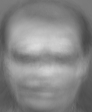

Image after NMF:


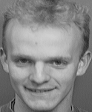

[[132. 127. 128. ... 127. 124. 125.]
 [129. 126. 129. ... 124. 127. 126.]
 [129. 128. 125. ... 125. 127. 128.]
 ...
 [118.  86.  96. ...  89.  86.  84.]
 [122.  81.  97. ...  85.  84.  84.]
 [118.  79.  93. ...  85.  83.  85.]]
Image Before NMF:
-------------------------------Number of image: 206
[[ 51.  51.  51. ...  47.  47.  46.]
 [ 51.  51.  51. ...  46.  47.  47.]
 [ 51.  51.  51. ...  47.  47.  47.]
 ...
 [185. 183. 186. ... 142. 137. 137.]
 [188. 191. 193. ... 147. 145. 142.]
 [191. 195. 199. ... 154. 151. 145.]]


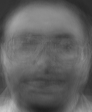

Image after NMF:


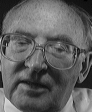

[[ 19.  23.  20. ...  17.  16.  15.]
 [ 22.  22.  19. ...  17.  18.  18.]
 [ 22.  24.  18. ...  18.  17.  17.]
 ...
 [169. 160. 157. ... 156. 167. 177.]
 [169. 158. 154. ... 164. 171. 176.]
 [168. 160. 154. ... 169. 173. 175.]]
Image Before NMF:
-------------------------------Number of image: 207
[[ 54.  54.  54. ...  52.  51.  51.]
 [ 54.  54.  54. ...  52.  52.  51.]
 [ 54.  54.  54. ...  52.  52.  51.]
 ...
 [122. 122. 123. ...  94.  92.  92.]
 [126. 128. 129. ...  98.  96.  94.]
 [128. 133. 134. ... 104. 102.  97.]]


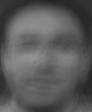

Image after NMF:


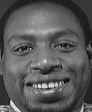

[[ 49.  65.  53. ...  54.  50.  56.]
 [ 62.  55.  59. ...  51.  52.  54.]
 [ 57.  63.  51. ...  54.  51.  56.]
 ...
 [146. 134. 158. ...  82.  72.  78.]
 [125. 159. 151. ... 142.  84.  65.]
 [104. 221. 209. ... 134. 130. 145.]]
Image Before NMF:
-------------------------------Number of image: 208
[[76. 76. 76. ... 82. 82. 82.]
 [76. 76. 75. ... 82. 82. 82.]
 [76. 76. 76. ... 81. 82. 83.]
 ...
 [61. 58. 62. ... 72. 72. 73.]
 [61. 60. 63. ... 72. 72. 72.]
 [61. 61. 65. ... 76. 75. 73.]]


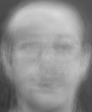

Image after NMF:


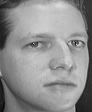

[[64. 76. 80. ... 52. 54. 52.]
 [60. 61. 60. ... 52. 53. 51.]
 [63. 80. 79. ... 53. 52. 59.]
 ...
 [21. 22. 12. ... 37. 42. 35.]
 [19. 20.  7. ... 42. 35. 42.]
 [24. 14. 11. ... 35. 37. 39.]]
Image Before NMF:
-------------------------------Number of image: 209
[[112. 112. 112. ... 114. 114. 113.]
 [112. 112. 112. ... 114. 114. 113.]
 [112. 112. 112. ... 113. 114. 114.]
 ...
 [ 47.  42.  46. ...  53.  54.  55.]
 [ 44.  41.  46. ...  51.  52.  54.]
 [ 43.  42.  44. ...  53.  53.  53.]]


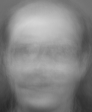

Image after NMF:


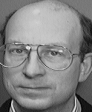

[[111. 112. 110. ... 118. 121. 119.]
 [108. 114. 110. ... 120. 122. 121.]
 [113. 109. 112. ... 118. 121. 122.]
 ...
 [ 21.  23.  23. ...  24.  17.  20.]
 [ 24.  23.  21. ...  21.  21.  19.]
 [ 24.  20.  22. ...  21.  20.  17.]]
Image Before NMF:
-------------------------------Number of image: 210
[[56. 56. 56. ... 59. 59. 60.]
 [56. 56. 56. ... 60. 60. 60.]
 [56. 56. 56. ... 59. 60. 60.]
 ...
 [67. 67. 68. ... 59. 59. 59.]
 [70. 70. 71. ... 61. 60. 60.]
 [72. 74. 75. ... 64. 63. 61.]]


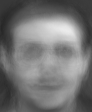

Image after NMF:


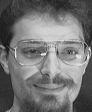

[[52. 56. 60. ... 48. 55. 57.]
 [51. 59. 54. ... 53. 62. 56.]
 [57. 54. 59. ... 55. 54. 58.]
 ...
 [55. 52. 58. ... 38. 44. 42.]
 [50. 49. 55. ... 49. 40. 42.]
 [49. 51. 51. ... 39. 41. 44.]]
Image Before NMF:
-------------------------------Number of image: 211
[[101. 101. 101. ...  99.  99.  99.]
 [101. 101. 100. ...  99.  99.  99.]
 [101. 101. 100. ...  99.  99.  99.]
 ...
 [ 19.  17.  20. ...  18.  20.  21.]
 [ 18.  15.  19. ...  15.  17.  20.]
 [ 17.  15.  18. ...  12.  15.  17.]]


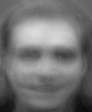

Image after NMF:


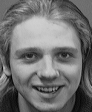

[[111. 106. 106. ... 111. 108. 107.]
 [108. 107. 108. ... 113. 110. 105.]
 [108. 109. 108. ... 111. 111. 112.]
 ...
 [ 50.  31.  36. ...  37.  39.  29.]
 [ 40.  31.  32. ...  41.  36.  31.]
 [ 39.  39.  33. ...  43.  34.  43.]]
Image Before NMF:
-------------------------------Number of image: 212
[[115. 115. 116. ... 112. 112. 111.]
 [115. 116. 116. ... 112. 112. 112.]
 [115. 116. 116. ... 112. 112. 112.]
 ...
 [148. 151. 154. ...  88.  87.  86.]
 [153. 155. 159. ...  90.  90.  91.]
 [154. 159. 162. ...  91.  91.  91.]]


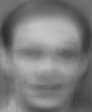

Image after NMF:


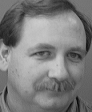

[[123. 122. 121. ... 117. 116. 115.]
 [124. 123. 121. ... 115. 116. 117.]
 [123. 123. 123. ... 116. 116. 116.]
 ...
 [ 88. 100. 129. ...  94.  85.  79.]
 [ 86.  95. 129. ...  84.  92.  95.]
 [ 78.  95. 125. ...  84.  92.  94.]]
Image Before NMF:
-------------------------------Number of image: 213
[[102. 102. 102. ... 102. 102. 103.]
 [102. 102. 102. ... 103. 102. 102.]
 [102. 102. 102. ... 102. 103. 103.]
 ...
 [101.  99. 100. ...  83.  82.  82.]
 [103. 102. 105. ...  85.  84.  84.]
 [105. 105. 107. ...  86.  84.  85.]]


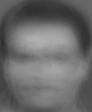

Image after NMF:


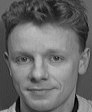

[[104. 106. 105. ... 101. 104. 102.]
 [101. 107. 102. ... 103. 102. 103.]
 [106. 104. 106. ... 101. 102. 103.]
 ...
 [ 63.  64.  63. ... 165. 156. 155.]
 [ 85. 110. 126. ... 161. 159. 160.]
 [149. 167. 165. ... 148. 155. 168.]]
Image Before NMF:
-------------------------------Number of image: 214
[[120. 120. 120. ... 117. 117. 116.]
 [120. 121. 121. ... 117. 117. 116.]
 [121. 120. 121. ... 117. 117. 117.]
 ...
 [122. 117. 119. ... 104. 103. 103.]
 [122. 121. 125. ... 106. 105. 104.]
 [123. 124. 126. ... 110. 108. 106.]]


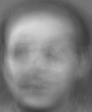

Image after NMF:


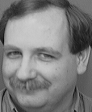

[[119. 123. 121. ... 115. 117. 116.]
 [119. 121. 122. ... 118. 114. 119.]
 [121. 121. 121. ... 115. 114. 115.]
 ...
 [139.  77.  90. ...  94. 106.  91.]
 [141.  81.  87. ...  95. 107.  91.]
 [140.  82.  89. ...  93. 106.  90.]]
Image Before NMF:
-------------------------------Number of image: 215
[[ 90.  90.  90. ...  91.  91.  91.]
 [ 90.  90.  90. ...  91.  92.  91.]
 [ 90.  90.  91. ...  91.  92.  92.]
 ...
 [128. 136. 137. ...  78.  78.  76.]
 [136. 140. 141. ...  81.  80.  81.]
 [140. 146. 148. ...  81.  80.  81.]]


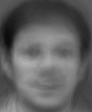

Image after NMF:


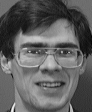

[[113. 111. 112. ... 112. 110. 109.]
 [113. 112. 111. ... 111. 112. 110.]
 [108. 112. 110. ... 111. 108. 111.]
 ...
 [ 99. 100.  97. ...  49.  54.  47.]
 [ 98. 101.  96. ...  48.  53.  53.]
 [ 97.  96.  95. ...  47.  57.  55.]]
Image Before NMF:
-------------------------------Number of image: 216
[[113. 113. 114. ... 108. 108. 108.]
 [114. 114. 114. ... 108. 108. 108.]
 [114. 114. 114. ... 108. 108. 108.]
 ...
 [145. 149. 150. ...  77.  76.  75.]
 [151. 154. 156. ...  78.  79.  80.]
 [153. 158. 160. ...  78.  79.  80.]]


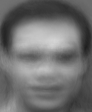

Image after NMF:


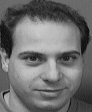

[[100. 110. 107. ... 102. 105. 107.]
 [105. 108. 105. ... 104. 102. 105.]
 [107. 106. 105. ... 105. 108. 103.]
 ...
 [129. 127. 132. ...  70.  63.  63.]
 [138. 130. 134. ...  65.  68.  56.]
 [138. 130. 131. ...  64.  71.  59.]]
Image Before NMF:
-------------------------------Number of image: 217
[[144. 143. 144. ... 141. 140. 141.]
 [144. 144. 144. ... 140. 141. 141.]
 [144. 144. 144. ... 141. 141. 141.]
 ...
 [179. 183. 185. ... 108. 107. 106.]
 [185. 187. 191. ... 109. 110. 112.]
 [188. 191. 196. ... 107. 108. 111.]]


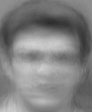

Image after NMF:


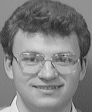

[[144. 144. 145. ... 145. 145. 145.]
 [144. 145. 144. ... 143. 146. 145.]
 [145. 145. 145. ... 145. 147. 143.]
 ...
 [153. 158. 186. ...  81.  81.  79.]
 [192. 216. 224. ...  85.  80.  79.]
 [226. 222. 223. ...  76.  78.  82.]]
Image Before NMF:
-------------------------------Number of image: 218
[[ 66.  66.  66. ...  64.  63.  63.]
 [ 66.  66.  67. ...  64.  64.  63.]
 [ 66.  66.  67. ...  64.  64.  63.]
 ...
 [ 91.  97.  96. ...  61.  61.  60.]
 [100. 103. 103. ...  65.  63.  62.]
 [105. 113. 112. ...  69.  67.  64.]]


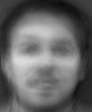

Image after NMF:


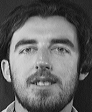

[[ 48.  46.  49. ...  37.  39.  40.]
 [ 43.  53.  46. ...  36.  40.  41.]
 [ 52.  43.  53. ...  40.  39.  41.]
 ...
 [ 62.  48.  49. ...  30.  33.  32.]
 [ 56.  25.  92. ...  32.  31.  30.]
 [ 43. 110. 215. ...  31.  31.  36.]]
Image Before NMF:
-------------------------------Number of image: 219
[[80. 81. 81. ... 77. 76. 76.]
 [80. 81. 81. ... 77. 76. 76.]
 [81. 80. 81. ... 77. 77. 76.]
 ...
 [73. 75. 74. ... 53. 54. 53.]
 [80. 81. 81. ... 57. 55. 54.]
 [84. 89. 88. ... 60. 58. 56.]]


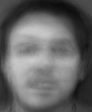

Image after NMF:


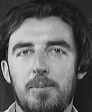

[[45. 49. 47. ... 40. 39. 42.]
 [46. 51. 50. ... 41. 39. 37.]
 [48. 48. 51. ... 41. 38. 38.]
 ...
 [53. 62. 59. ... 36. 33. 36.]
 [56. 56. 54. ... 37. 39. 36.]
 [67. 84. 88. ... 40. 30. 44.]]
Image Before NMF:
-------------------------------Number of image: 220
[[79. 79. 79. ... 74. 74. 74.]
 [79. 79. 79. ... 74. 74. 74.]
 [79. 79. 79. ... 74. 74. 74.]
 ...
 [74. 76. 75. ... 48. 47. 47.]
 [79. 79. 81. ... 48. 48. 49.]
 [83. 84. 85. ... 48. 49. 49.]]


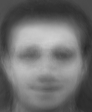

Image after NMF:


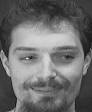

[[50. 57. 56. ... 58. 56. 57.]
 [52. 56. 60. ... 58. 57. 55.]
 [52. 56. 58. ... 59. 56. 57.]
 ...
 [52. 56. 56. ... 41. 46. 43.]
 [59. 53. 54. ... 40. 46. 42.]
 [58. 56. 53. ... 39. 46. 43.]]
Image Before NMF:
-------------------------------Number of image: 221
[[104. 104. 104. ... 105. 104. 104.]
 [104. 104. 104. ... 104. 105. 104.]
 [104. 104. 104. ... 104. 104. 105.]
 ...
 [114. 114. 119. ...  85.  85.  85.]
 [116. 116. 121. ...  85.  86.  87.]
 [116. 119. 123. ...  87.  87.  86.]]


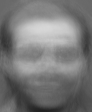

Image after NMF:


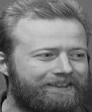

[[112. 107. 111. ... 106. 110. 104.]
 [107. 110. 102. ... 109. 106. 107.]
 [109. 106. 112. ... 105. 109. 108.]
 ...
 [ 61.  81. 170. ...  47.  48.  48.]
 [ 70.  71. 168. ...  46.  44.  50.]
 [ 80.  59. 153. ...  39.  45.  57.]]
Image Before NMF:
-------------------------------Number of image: 222
[[107. 106. 107. ... 102. 102. 102.]
 [107. 107. 106. ... 102. 102. 102.]
 [107. 107. 107. ... 102. 102. 102.]
 ...
 [121. 121. 122. ...  87.  86.  86.]
 [126. 125. 127. ...  88.  88.  88.]
 [129. 129. 132. ...  88.  88.  89.]]


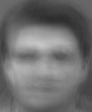

Image after NMF:


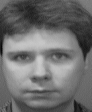

[[118. 122. 118. ... 119. 126. 126.]
 [122. 118. 117. ... 122. 125. 125.]
 [119. 121. 116. ... 122. 124. 124.]
 ...
 [ 90. 101. 104. ...  80.  90.  88.]
 [ 93.  83. 110. ...  76.  79.  80.]
 [103.  68. 103. ...  78.  62.  62.]]
Image Before NMF:
-------------------------------Number of image: 223
[[ 88.  88.  89. ...  79.  80.  80.]
 [ 88.  89.  89. ...  80.  79.  80.]
 [ 89.  89.  89. ...  80.  80.  79.]
 ...
 [161. 159. 159. ... 106. 103. 102.]
 [165. 166. 167. ... 110. 109. 107.]
 [169. 171. 173. ... 112. 110. 109.]]


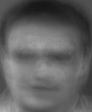

Image after NMF:


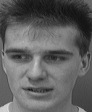

[[110. 113. 108. ... 105. 100. 105.]
 [108. 113. 107. ... 105. 102. 106.]
 [109. 111. 112. ... 103. 102. 104.]
 ...
 [202. 201. 204. ...  65.  65.  67.]
 [204. 202. 203. ...  66.  61.  66.]
 [204. 203. 204. ...  63.  63.  61.]]
Image Before NMF:
-------------------------------Number of image: 224
[[ 94.  94.  94. ...  97.  96.  97.]
 [ 94.  94.  94. ...  97.  97.  96.]
 [ 94.  94.  94. ...  96.  97.  97.]
 ...
 [ 84.  74.  77. ... 107. 106. 107.]
 [ 81.  77.  80. ... 109. 108. 106.]
 [ 82.  79.  81. ... 114. 111. 109.]]


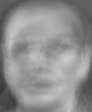

Image after NMF:


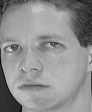

[[ 43.  50.  41. ...  55.  55.  56.]
 [ 45.  53.  44. ...  67.  62.  52.]
 [ 57.  47.  47. ...  45.  59.  55.]
 ...
 [ 49.  49.  46. ... 154. 152. 175.]
 [ 46.  48.  47. ... 157. 150. 174.]
 [ 49.  50.  43. ... 158. 153. 169.]]
Image Before NMF:
-------------------------------Number of image: 225
[[124. 123. 124. ... 126. 126. 126.]
 [124. 124. 123. ... 126. 126. 126.]
 [124. 124. 124. ... 125. 126. 127.]
 ...
 [ 70.  69.  73. ...  50.  51.  52.]
 [ 70.  68.  73. ...  47.  49.  52.]
 [ 68.  67.  72. ...  45.  47.  50.]]


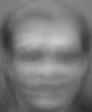

Image after NMF:


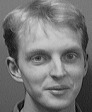

[[119. 121. 123. ... 122. 118. 119.]
 [122. 123. 123. ... 122. 120. 120.]
 [120. 125. 121. ... 123. 121. 120.]
 ...
 [ 85.  88.  88. ...  38.  36.  43.]
 [ 84.  84.  87. ...  37.  34.  45.]
 [ 80.  89.  85. ...  36.  40.  36.]]
Image Before NMF:
-------------------------------Number of image: 226
[[48. 47. 48. ... 46. 46. 46.]
 [48. 48. 47. ... 46. 46. 46.]
 [48. 48. 47. ... 46. 46. 46.]
 ...
 [45. 43. 44. ... 46. 46. 47.]
 [47. 47. 48. ... 47. 47. 46.]
 [49. 50. 51. ... 51. 50. 47.]]


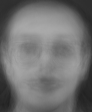

Image after NMF:


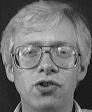

[[ 34.  39.  35. ...  36.  35.  35.]
 [ 35.  35.  36. ...  34.  35.  35.]
 [ 35.  42.  34. ...  34.  37.  36.]
 ...
 [ 38.  36.  39. ...  58.  43.  34.]
 [ 41.  34.  43. ... 129. 129. 121.]
 [ 39.  36.  35. ... 135. 138. 148.]]
Image Before NMF:
-------------------------------Number of image: 227
[[139. 138. 139. ... 136. 135. 135.]
 [139. 139. 139. ... 135. 136. 136.]
 [139. 139. 139. ... 136. 136. 136.]
 ...
 [178. 183. 185. ... 112. 111. 110.]
 [186. 187. 191. ... 114. 114. 116.]
 [189. 192. 197. ... 112. 113. 115.]]


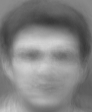

Image after NMF:


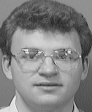

[[139. 143. 146. ... 145. 146. 146.]
 [141. 148. 141. ... 143. 143. 144.]
 [145. 142. 141. ... 143. 146. 145.]
 ...
 [170. 203. 218. ...  80.  77.  80.]
 [222. 224. 223. ...  84.  75.  84.]
 [222. 223. 221. ...  83.  81.  74.]]
Image Before NMF:
-------------------------------Number of image: 228
[[ 93.  93.  93. ...  91.  91.  91.]
 [ 93.  93.  93. ...  91.  91.  91.]
 [ 93.  93.  93. ...  91.  92.  91.]
 ...
 [104. 105. 107. ...  70.  70.  69.]
 [108. 108. 110. ...  72.  72.  72.]
 [109. 111. 113. ...  71.  71.  72.]]


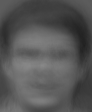

Image after NMF:


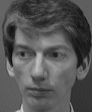

[[104.  98. 100. ...  93.  96.  93.]
 [ 97. 101. 101. ...  93.  94.  93.]
 [ 99. 100. 100. ...  97.  98.  91.]
 ...
 [ 92.  92.  89. ...  56.  52.  51.]
 [ 88.  88.  93. ...  51.  53.  50.]
 [ 84.  92.  90. ...  52.  49.  53.]]
Image Before NMF:
-------------------------------Number of image: 229
[[65. 65. 65. ... 68. 68. 68.]
 [65. 65. 65. ... 69. 68. 68.]
 [65. 64. 65. ... 68. 69. 69.]
 ...
 [60. 63. 63. ... 42. 43. 43.]
 [64. 66. 67. ... 45. 44. 44.]
 [66. 71. 71. ... 48. 47. 45.]]


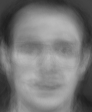

Image after NMF:


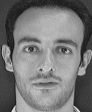

[[60. 57. 59. ... 61. 61. 63.]
 [58. 60. 59. ... 66. 60. 63.]
 [59. 59. 60. ... 64. 60. 61.]
 ...
 [54. 51. 54. ... 57. 57. 57.]
 [54. 53. 50. ... 56. 54. 61.]
 [54. 52. 46. ... 49. 55. 54.]]
Image Before NMF:
-------------------------------Number of image: 230
[[ 54.  55.  55. ...  52.  52.  52.]
 [ 55.  55.  55. ...  52.  52.  52.]
 [ 55.  55.  55. ...  52.  52.  52.]
 ...
 [107. 107. 109. ...  76.  75.  75.]
 [111. 113. 114. ...  79.  78.  77.]
 [113. 118. 119. ...  85.  83.  79.]]


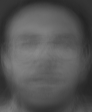

Image after NMF:


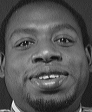

[[ 58.  54.  57. ...  53.  50.  54.]
 [ 57.  50.  57. ...  51.  54.  47.]
 [ 59.  52.  60. ...  52.  53.  53.]
 ...
 [ 76.  97. 104. ... 119. 113. 106.]
 [160. 191. 205. ... 119. 137. 142.]
 [136. 136. 149. ...  97. 115. 128.]]
Image Before NMF:
-------------------------------Number of image: 231
[[68. 67. 68. ... 72. 72. 72.]
 [68. 67. 67. ... 72. 72. 72.]
 [68. 67. 67. ... 72. 72. 73.]
 ...
 [39. 44. 44. ... 48. 48. 49.]
 [47. 45. 47. ... 46. 47. 48.]
 [51. 52. 54. ... 47. 47. 48.]]


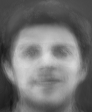

Image after NMF:


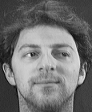

[[54. 51. 49. ... 58. 56. 57.]
 [54. 49. 52. ... 58. 60. 56.]
 [51. 51. 55. ... 62. 59. 57.]
 ...
 [48. 49. 46. ... 57. 66. 61.]
 [49. 47. 52. ... 62. 60. 62.]
 [47. 48. 51. ... 61. 59. 63.]]
Image Before NMF:
-------------------------------Number of image: 232
[[117. 117. 118. ... 114. 114. 113.]
 [117. 118. 118. ... 114. 114. 114.]
 [118. 118. 118. ... 114. 114. 114.]
 ...
 [136. 138. 140. ...  82.  82.  81.]
 [140. 142. 145. ...  84.  84.  85.]
 [142. 146. 148. ...  84.  85.  85.]]


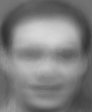

Image after NMF:


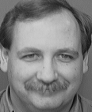

[[120. 123. 119. ... 114. 113. 115.]
 [122. 122. 121. ... 117. 114. 114.]
 [121. 121. 120. ... 114. 115. 114.]
 ...
 [121. 131. 138. ...  98.  96. 101.]
 [119. 131. 138. ...  96.  94. 102.]
 [115. 130. 132. ...  96.  95. 103.]]
Image Before NMF:
-------------------------------Number of image: 233
[[49. 49. 49. ... 51. 50. 51.]
 [48. 49. 49. ... 51. 51. 50.]
 [49. 48. 49. ... 50. 51. 51.]
 ...
 [40. 43. 43. ... 41. 42. 43.]
 [46. 47. 48. ... 44. 43. 41.]
 [49. 55. 54. ... 50. 48. 44.]]


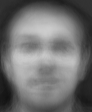

Image after NMF:


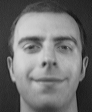

[[46. 48. 51. ... 37. 36. 31.]
 [53. 47. 51. ... 37. 32. 35.]
 [54. 51. 50. ... 36. 37. 34.]
 ...
 [42. 41. 43. ... 32. 35. 31.]
 [46. 36. 45. ... 29. 35. 32.]
 [41. 43. 37. ... 34. 30. 32.]]
Image Before NMF:
-------------------------------Number of image: 234
[[ 63.  63.  63. ...  61.  61.  60.]
 [ 63.  63.  63. ...  61.  61.  61.]
 [ 63.  63.  63. ...  61.  61.  61.]
 ...
 [125. 127. 128. ...  91.  89.  88.]
 [130. 133. 134. ...  95.  93.  92.]
 [134. 139. 140. ...  99.  97.  94.]]


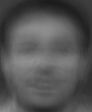

Image after NMF:


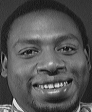

[[ 56.  58.  50. ...  55.  48.  54.]
 [ 56.  49.  59. ...  51.  53.  47.]
 [ 52.  55.  57. ...  54.  47.  55.]
 ...
 [126. 136. 140. ...  73. 139. 200.]
 [128. 134. 112. ...  86.  86. 202.]
 [155. 122. 110. ...  63.  75. 189.]]
Image Before NMF:
-------------------------------Number of image: 235
[[ 87.  87.  88. ...  85.  85.  85.]
 [ 88.  88.  87. ...  85.  85.  85.]
 [ 87.  88.  88. ...  85.  85.  85.]
 ...
 [119. 121. 122. ...  81.  79.  79.]
 [124. 124. 127. ...  82.  82.  82.]
 [126. 128. 131. ...  81.  81.  83.]]


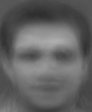

Image after NMF:


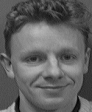

[[ 93.  98.  95. ...  87.  92.  89.]
 [ 96.  95.  97. ...  89.  88.  90.]
 [ 99.  98.  94. ...  87.  90.  88.]
 ...
 [ 83.  81.  91. ... 122. 120. 133.]
 [121. 132. 155. ... 126. 126. 142.]
 [168. 163. 177. ... 131. 131. 132.]]
Image Before NMF:
-------------------------------Number of image: 236
[[110. 110. 111. ... 106. 106. 106.]
 [111. 111. 111. ... 106. 106. 106.]
 [111. 111. 111. ... 106. 106. 106.]
 ...
 [112. 118. 118. ...  60.  60.  59.]
 [120. 121. 124. ...  60.  61.  63.]
 [123. 126. 129. ...  59.  60.  62.]]


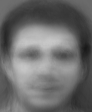

Image after NMF:


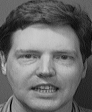

[[104. 106. 107. ...  99. 100.  97.]
 [106. 106. 102. ...  96. 100.  99.]
 [105. 104. 104. ... 101.  95.  94.]
 ...
 [152. 107.  93. ...  59.  52.  42.]
 [144.  83. 107. ...  72.  63.  67.]
 [115.  84. 128. ...  65.  59.  73.]]
Image Before NMF:
-------------------------------Number of image: 237
[[ 82.  83.  83. ...  84.  84.  84.]
 [ 83.  83.  83. ...  84.  84.  84.]
 [ 82.  82.  83. ...  84.  84.  85.]
 ...
 [146. 149. 150. ... 107. 106. 105.]
 [152. 154. 156. ... 111. 110. 109.]
 [156. 160. 162. ... 113. 111. 111.]]


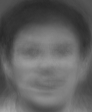

Image after NMF:


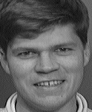

[[ 54.  49.  56. ... 103. 102. 104.]
 [ 54.  47.  49. ... 102. 105. 102.]
 [ 42.  43.  67. ... 100. 102. 104.]
 ...
 [168. 174. 157. ... 151. 124.  82.]
 [161. 166. 172. ... 161. 168. 161.]
 [175. 189. 175. ... 154. 154. 162.]]
Image Before NMF:
-------------------------------Number of image: 238
[[111. 112. 112. ... 109. 108. 108.]
 [112. 112. 112. ... 109. 109. 108.]
 [112. 112. 112. ... 109. 109. 109.]
 ...
 [133. 133. 135. ...  96.  95.  94.]
 [137. 137. 140. ...  98.  98.  98.]
 [138. 141. 143. ...  99.  99.  99.]]


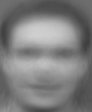

Image after NMF:


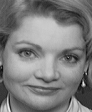

[[ 92.  93.  96. ...  92.  89.  90.]
 [ 94.  96.  91. ...  93.  95.  92.]
 [ 91.  90.  89. ...  94.  90.  96.]
 ...
 [148. 197. 171. ... 121. 112.  54.]
 [154. 198. 165. ... 174. 162. 156.]
 [159. 195. 161. ... 192. 163. 157.]]
Image Before NMF:
-------------------------------Number of image: 239
[[105. 105. 106. ... 109. 109. 109.]
 [105. 105. 106. ... 110. 110. 109.]
 [105. 105. 106. ... 109. 110. 110.]
 ...
 [ 79.  79.  81. ...  71.  72.  72.]
 [ 82.  82.  84. ...  73.  73.  73.]
 [ 84.  86.  87. ...  75.  73.  74.]]


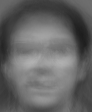

Image after NMF:


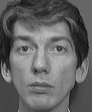

[[102. 105. 104. ... 101. 101. 105.]
 [106. 102. 101. ... 102. 102. 101.]
 [105. 100. 103. ... 101. 101. 104.]
 ...
 [ 69.  70.  68. ...  78.  72.  78.]
 [ 69.  69.  71. ...  73.  77.  75.]
 [ 69.  69.  72. ...  74.  74.  75.]]
Image Before NMF:
-------------------------------Number of image: 240
[[ 44.  45.  45. ...  40.  40.  39.]
 [ 45.  45.  45. ...  39.  40.  40.]
 [ 44.  45.  45. ...  40.  40.  40.]
 ...
 [194. 194. 196. ... 145. 140. 140.]
 [199. 202. 204. ... 151. 148. 145.]
 [202. 207. 210. ... 158. 155. 149.]]


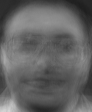

Image after NMF:


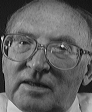

[[ 25.  25.  23. ...  19.  22.  22.]
 [ 25.  27.  24. ...  20.  21.  24.]
 [ 26.  26.  24. ...  21.  20.  23.]
 ...
 [189. 181. 181. ... 184. 188. 188.]
 [190. 186. 182. ... 188. 189. 189.]
 [191. 188. 182. ... 187. 190. 192.]]
Image Before NMF:
-------------------------------Number of image: 241
[[ 59.  59.  59. ...  59.  59.  59.]
 [ 60.  59.  59. ...  59.  59.  59.]
 [ 59.  60.  59. ...  59.  59.  59.]
 ...
 [118. 121. 125. ...  80.  80.  81.]
 [123. 127. 131. ...  83.  83.  82.]
 [124. 133. 135. ...  92.  92.  84.]]


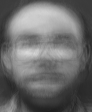

Image after NMF:


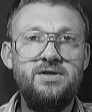

[[ 44.  50.  46. ...  44.  41.  44.]
 [ 51.  46.  48. ...  39.  41.  43.]
 [ 48.  46.  48. ...  38.  37.  42.]
 ...
 [145. 148. 144. ... 106. 102. 104.]
 [151. 167. 100. ... 100. 105. 103.]
 [150. 155. 138. ... 140. 104.  95.]]
Image Before NMF:
-------------------------------Number of image: 242
[[104. 104. 104. ... 110. 109. 109.]
 [104. 103. 104. ... 110. 110. 109.]
 [104. 103. 104. ... 109. 110. 110.]
 ...
 [105.  99. 104. ... 117. 116. 117.]
 [104. 102. 107. ... 119. 118. 117.]
 [105. 105. 108. ... 125. 123. 119.]]


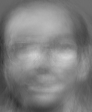

Image after NMF:


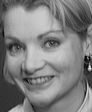

[[ 67.  62.  88. ... 158. 141. 151.]
 [ 66.  57.  75. ... 156. 149. 140.]
 [ 65.  71.  74. ... 150. 155. 142.]
 ...
 [ 51.  47.  50. ... 176. 166. 147.]
 [ 52.  50.  50. ... 170. 161. 140.]
 [ 48.  53.  55. ... 167. 157. 145.]]
Image Before NMF:
-------------------------------Number of image: 243
[[61. 60. 61. ... 65. 65. 65.]
 [61. 60. 60. ... 65. 65. 65.]
 [60. 60. 60. ... 64. 65. 65.]
 ...
 [54. 56. 59. ... 49. 50. 51.]
 [57. 58. 62. ... 49. 50. 50.]
 [58. 63. 65. ... 55. 55. 50.]]


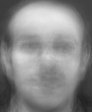

Image after NMF:


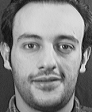

[[ 72.  73.  77. ...  87.  86.  91.]
 [ 73.  71.  69. ...  88.  88.  87.]
 [ 72.  70.  70. ...  84.  88.  90.]
 ...
 [ 54.  55.  49. ...  93.  90.  93.]
 [ 48.  52.  49. ...  87.  90.  88.]
 [ 49.  57.  48. ... 100.  86.  76.]]
Image Before NMF:
-------------------------------Number of image: 244
[[ 44.  45.  45. ...  39.  39.  39.]
 [ 45.  45.  45. ...  39.  39.  39.]
 [ 44.  45.  45. ...  40.  39.  39.]
 ...
 [190. 190. 192. ... 140. 135. 135.]
 [195. 199. 200. ... 145. 143. 140.]
 [199. 205. 208. ... 152. 149. 143.]]


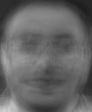

Image after NMF:


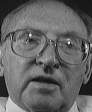

[[ 24.  26.  27. ...  25.  16.  28.]
 [ 27.  26.  27. ...  26.  16.  26.]
 [ 23.  28.  27. ...  26.  20.  25.]
 ...
 [195. 185. 189. ... 173. 176. 175.]
 [192. 184. 188. ... 183. 178. 179.]
 [195. 186. 181. ... 183. 181. 181.]]
Image Before NMF:
-------------------------------Number of image: 245
[[111. 112. 112. ... 112. 112. 112.]
 [111. 112. 112. ... 113. 113. 112.]
 [111. 111. 112. ... 112. 113. 112.]
 ...
 [103. 108. 109. ...  67.  68.  67.]
 [109. 111. 113. ...  69.  69.  70.]
 [112. 117. 118. ...  69.  69.  70.]]


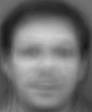

Image after NMF:


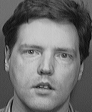

[[110. 111. 114. ... 106. 107. 105.]
 [109. 112. 110. ... 104. 104. 106.]
 [109. 112. 109. ... 101. 106. 102.]
 ...
 [123. 128. 128. ...  70.  69.  68.]
 [139. 126. 125. ...  70.  67.  65.]
 [123. 100. 131. ...  65.  72.  65.]]
Image Before NMF:
-------------------------------Number of image: 246
[[ 90.  90.  90. ...  98.  98.  98.]
 [ 90.  89.  89. ...  99.  99.  98.]
 [ 90.  89.  89. ...  98.  99.  99.]
 ...
 [ 80.  72.  76. ... 107. 106. 108.]
 [ 77.  74.  78. ... 109. 107. 106.]
 [ 77.  75.  78. ... 114. 112. 109.]]


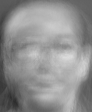

Image after NMF:


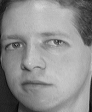

[[63. 53. 35. ... 36. 44. 45.]
 [56. 48. 31. ... 57. 50. 50.]
 [52. 29. 35. ... 54. 55. 61.]
 ...
 [35. 37. 36. ... 44.  9. 25.]
 [36. 35. 37. ... 40.  7. 28.]
 [35. 38. 34. ... 41. 10. 24.]]
Image Before NMF:
-------------------------------Number of image: 247
[[61. 61. 62. ... 63. 62. 63.]
 [61. 62. 62. ... 63. 63. 63.]
 [62. 61. 62. ... 63. 63. 63.]
 ...
 [81. 80. 79. ... 73. 72. 72.]
 [84. 84. 84. ... 76. 74. 73.]
 [87. 88. 89. ... 79. 76. 75.]]


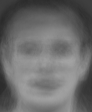

Image after NMF:


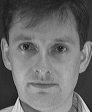

[[ 35.  40.  38. ...  46.  45.  46.]
 [ 39.  40.  38. ...  47.  46.  46.]
 [ 39.  39.  38. ...  47.  48.  44.]
 ...
 [ 46.  86. 131. ...  37.  39.  46.]
 [138. 154. 161. ... 130.  27.  43.]
 [169. 174. 176. ... 222.  55.  34.]]
Image Before NMF:
-------------------------------Number of image: 248
[[123. 124. 124. ... 119. 119. 119.]
 [124. 124. 124. ... 119. 119. 119.]
 [124. 124. 124. ... 119. 119. 119.]
 ...
 [148. 151. 153. ...  91.  90.  89.]
 [153. 154. 158. ...  92.  92.  94.]
 [155. 159. 162. ...  92.  92.  93.]]


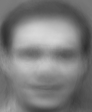

Image after NMF:


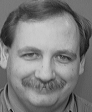

[[118. 119. 122. ... 111. 115. 112.]
 [119. 120. 121. ... 112. 115. 112.]
 [122. 120. 123. ... 113. 114. 114.]
 ...
 [129. 135.  92. ...  97.  98. 102.]
 [132. 137.  91. ...  97. 101. 100.]
 [128. 139.  95. ...  97. 102. 101.]]
Image Before NMF:
-------------------------------Number of image: 249
[[ 99.  99.  99. ...  97.  97.  96.]
 [100. 100.  99. ...  97.  97.  97.]
 [100. 100.  99. ...  97.  97.  97.]
 ...
 [ 65.  65.  68. ...  48.  49.  49.]
 [ 66.  65.  70. ...  46.  48.  50.]
 [ 67.  68.  71. ...  47.  48.  48.]]


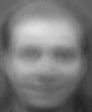

Image after NMF:


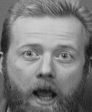

[[108. 107. 106. ... 111. 109. 106.]
 [108. 110. 109. ... 107. 108. 103.]
 [107. 111. 106. ... 102. 108. 107.]
 ...
 [111. 104. 102. ...  35.  44.  45.]
 [105. 105.  96. ...  44.  36.  44.]
 [104. 106.  94. ...  43.  43.  40.]]
Image Before NMF:
-------------------------------Number of image: 250
[[103. 102. 102. ... 102. 102. 104.]
 [102. 103. 101. ... 103. 102. 103.]
 [103. 102. 102. ... 102. 103. 102.]
 ...
 [ 13.  13.  12. ...   4.   6.   7.]
 [ 16.  15.  16. ...   3.   4.   6.]
 [ 19.  18.  18. ...   2.   3.   5.]]


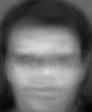

Image after NMF:


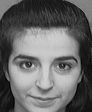

[[135. 133. 136. ... 129. 131. 129.]
 [135. 139. 132. ... 131. 133. 129.]
 [137. 134. 137. ... 131. 131. 130.]
 ...
 [ 26.  23.  29. ...  14.  21.  17.]
 [ 31.  20.  30. ...  17.  20.  17.]
 [ 29.  21.  27. ...  18.  21.  24.]]
Image Before NMF:
-------------------------------Number of image: 251
[[114. 114. 115. ... 111. 111. 112.]
 [114. 115. 114. ... 112. 111. 112.]
 [114. 114. 115. ... 112. 112. 111.]
 ...
 [131. 133. 134. ...  80.  79.  79.]
 [136. 137. 139. ...  82.  82.  83.]
 [138. 141. 143. ...  83.  83.  83.]]


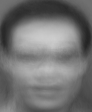

Image after NMF:


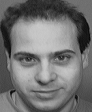

[[114. 110. 112. ... 113. 108. 112.]
 [112. 109. 110. ... 112. 109. 112.]
 [113. 109. 111. ... 110. 112. 110.]
 ...
 [136. 136. 136. ...  90.  89.  91.]
 [137. 137. 139. ...  94.  87.  91.]
 [138. 135. 139. ...  93.  89.  86.]]
Image Before NMF:
-------------------------------Number of image: 252
[[95. 95. 95. ... 92. 92. 92.]
 [96. 96. 95. ... 92. 91. 91.]
 [96. 96. 95. ... 92. 92. 91.]
 ...
 [48. 46. 47. ... 37. 38. 38.]
 [49. 47. 50. ... 37. 37. 38.]
 [50. 49. 51. ... 37. 37. 38.]]


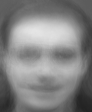

Image after NMF:


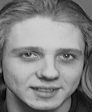

[[106. 105. 106. ... 109. 108. 113.]
 [107. 108. 106. ... 113. 105. 110.]
 [109. 109. 106. ... 107. 112. 106.]
 ...
 [ 31.  37.  39. ...  29.  34.  36.]
 [ 27.  36.  39. ...  31.  36.  36.]
 [ 23.  40.  33. ...  32.  31.  28.]]
Image Before NMF:
-------------------------------Number of image: 253
[[94. 94. 94. ... 94. 94. 94.]
 [94. 94. 94. ... 94. 94. 93.]
 [95. 94. 94. ... 93. 94. 94.]
 ...
 [32. 29. 31. ... 39. 40. 40.]
 [32. 30. 33. ... 38. 39. 39.]
 [33. 32. 33. ... 39. 39. 39.]]


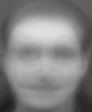

Image after NMF:


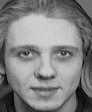

[[104. 101. 105. ... 113. 107. 109.]
 [104. 103. 105. ... 108. 115. 109.]
 [102. 102. 107. ... 109. 112. 109.]
 ...
 [ 41.  35.  56. ...  35.  48.  38.]
 [ 49.  41.  43. ...  37.  31.  43.]
 [ 39.  38.  55. ...  49.  43.  36.]]
Image Before NMF:
-------------------------------Number of image: 254
[[67. 67. 67. ... 68. 68. 68.]
 [67. 67. 67. ... 68. 68. 68.]
 [67. 67. 67. ... 68. 68. 68.]
 ...
 [70. 72. 72. ... 44. 44. 44.]
 [74. 76. 77. ... 46. 46. 45.]
 [75. 80. 80. ... 50. 48. 47.]]


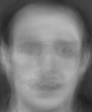

Image after NMF:


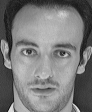

[[61. 62. 64. ... 59. 66. 63.]
 [59. 63. 61. ... 66. 67. 64.]
 [60. 63. 63. ... 64. 61. 69.]
 ...
 [55. 54. 53. ... 56. 56. 60.]
 [55. 55. 54. ... 56. 54. 60.]
 [54. 49. 55. ... 51. 55. 53.]]
Image Before NMF:
-------------------------------Number of image: 255
[[ 96.  96.  96. ...  92.  92.  92.]
 [ 96.  96.  96. ...  92.  92.  92.]
 [ 96.  96.  96. ...  92.  92.  92.]
 ...
 [135. 133. 135. ...  97.  96.  96.]
 [137. 137. 140. ...  99.  99.  99.]
 [138. 140. 143. ... 102. 101. 100.]]


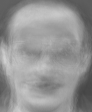

Image after NMF:


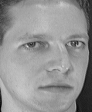

[[ 60.  60.  62. ...  40.  53.  46.]
 [ 58.  73.  54. ...  34.  50.  51.]
 [ 68.  77.  80. ...  36.  50.  49.]
 ...
 [ 24. 143. 160. ...  34.  33.  33.]
 [ 18. 136. 161. ...  36.  36.  31.]
 [  9. 111. 168. ...  32.  34.  34.]]
Image Before NMF:
-------------------------------Number of image: 256
[[136. 136. 136. ... 131. 131. 131.]
 [136. 137. 136. ... 132. 131. 131.]
 [137. 136. 137. ... 132. 132. 131.]
 ...
 [115. 117. 117. ...  65.  65.  65.]
 [120. 120. 123. ...  66.  67.  68.]
 [122. 125. 127. ...  65.  66.  68.]]


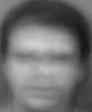

Image after NMF:


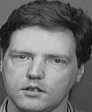

[[114. 112. 110. ... 107. 105. 103.]
 [109. 115. 113. ... 107. 104. 107.]
 [110. 112. 111. ... 109. 104. 104.]
 ...
 [136. 155.  95. ...  69.  70.  72.]
 [144. 140. 106. ...  70.  70.  68.]
 [148. 129. 107. ...  67.  70.  68.]]
Image Before NMF:
-------------------------------Number of image: 257
[[71. 70. 71. ... 73. 73. 73.]
 [70. 70. 70. ... 73. 73. 73.]
 [71. 70. 71. ... 73. 73. 73.]
 ...
 [77. 79. 81. ... 50. 51. 51.]
 [81. 84. 85. ... 54. 53. 52.]
 [83. 89. 89. ... 58. 57. 54.]]


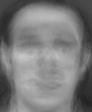

Image after NMF:


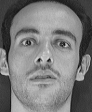

[[63. 54. 58. ... 61. 61. 59.]
 [59. 59. 59. ... 59. 61. 61.]
 [59. 58. 57. ... 60. 65. 63.]
 ...
 [54. 57. 52. ... 64. 61. 65.]
 [59. 52. 54. ... 68. 61. 62.]
 [52. 54. 54. ... 63. 63. 64.]]
Image Before NMF:
-------------------------------Number of image: 258
[[50. 50. 50. ... 56. 56. 56.]
 [50. 50. 49. ... 56. 56. 56.]
 [50. 49. 50. ... 56. 57. 57.]
 ...
 [39. 37. 37. ... 52. 52. 52.]
 [40. 39. 39. ... 54. 53. 52.]
 [41. 41. 41. ... 56. 54. 54.]]


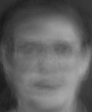

Image after NMF:


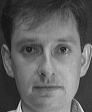

[[35. 36. 37. ... 46. 46. 46.]
 [37. 36. 38. ... 48. 50. 47.]
 [38. 36. 38. ... 47. 48. 50.]
 ...
 [39. 40. 43. ... 61. 58. 62.]
 [42. 39. 40. ... 56. 57. 54.]
 [39. 37. 41. ... 59. 57. 58.]]
Image Before NMF:
-------------------------------Number of image: 259
[[97. 97. 97. ... 96. 95. 95.]
 [97. 97. 97. ... 96. 96. 95.]
 [97. 97. 97. ... 95. 96. 96.]
 ...
 [79. 78. 81. ... 68. 68. 69.]
 [81. 79. 84. ... 67. 68. 69.]
 [81. 82. 86. ... 69. 70. 68.]]


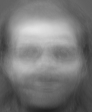

Image after NMF:


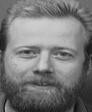

[[109. 105. 112. ... 109. 107. 108.]
 [106. 113. 105. ... 107. 107. 107.]
 [105. 111. 108. ... 108. 107. 104.]
 ...
 [101.  92.  95. ...  48.  48.  44.]
 [ 99.  91.  97. ...  56.  49.  44.]
 [101.  88.  90. ...  55.  50.  51.]]
Image Before NMF:
-------------------------------Number of image: 260
[[ 85.  86.  86. ...  87.  87.  87.]
 [ 85.  85.  86. ...  87.  87.  87.]
 [ 85.  85.  86. ...  87.  88.  88.]
 ...
 [163. 164. 166. ... 130. 128. 127.]
 [169. 170. 172. ... 135. 133. 131.]
 [173. 176. 179. ... 138. 135. 134.]]


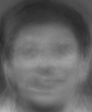

Image after NMF:


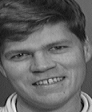

[[ 40.  42.  53. ... 104. 102. 102.]
 [ 50.  65.  61. ... 104. 104. 103.]
 [ 64.  62.  67. ... 104. 104. 102.]
 ...
 [168. 179. 176. ... 169. 189. 193.]
 [193. 173. 180. ... 185. 193. 190.]
 [188. 157. 188. ... 190. 195. 182.]]
Image Before NMF:
-------------------------------Number of image: 261
[[135. 136. 136. ... 130. 130. 130.]
 [136. 136. 136. ... 131. 130. 130.]
 [136. 136. 137. ... 130. 131. 130.]
 ...
 [128. 125. 126. ...  88.  87.  86.]
 [130. 129. 132. ...  90.  90.  90.]
 [131. 132. 133. ...  91.  90.  91.]]


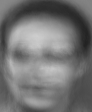

Image after NMF:


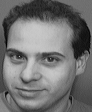

[[112. 109. 116. ... 110. 112. 110.]
 [112. 112. 113. ... 114. 110. 113.]
 [111. 111. 113. ... 113. 110. 110.]
 ...
 [139. 141. 136. ...  93.  87.  93.]
 [138. 137. 139. ...  94.  90.  94.]
 [136. 136. 139. ...  93.  88.  92.]]
Image Before NMF:
-------------------------------Number of image: 262
[[131. 131. 131. ... 132. 131. 130.]
 [131. 131. 131. ... 132. 132. 131.]
 [131. 131. 131. ... 131. 132. 131.]
 ...
 [ 76.  71.  75. ...  79.  80.  80.]
 [ 74.  70.  75. ...  79.  79.  80.]
 [ 74.  71.  74. ...  78.  78.  80.]]


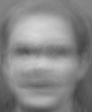

Image after NMF:


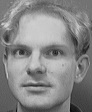

[[117. 120. 122. ... 115. 114. 115.]
 [123. 118. 124. ... 115. 114. 113.]
 [121. 122. 122. ... 113. 114. 115.]
 ...
 [ 89.  86.  94. ...  63.  67.  64.]
 [ 93.  89.  88. ...  64.  64.  61.]
 [ 83.  89.  85. ...  66.  59.  65.]]
Image Before NMF:
-------------------------------Number of image: 263
[[ 98.  99.  99. ...  90.  90.  90.]
 [ 98.  99.  99. ...  90.  90.  90.]
 [ 99.  99. 100. ...  91.  90.  89.]
 ...
 [175. 173. 172. ... 117. 114. 112.]
 [179. 180. 181. ... 122. 120. 118.]
 [182. 184. 186. ... 124. 121. 121.]]


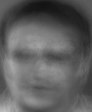

Image after NMF:


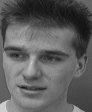

[[112. 109. 112. ... 103. 103. 101.]
 [111. 112. 111. ... 102. 101. 101.]
 [112. 111. 113. ... 103. 102. 105.]
 ...
 [204. 207. 204. ...  64.  61.  62.]
 [205. 205. 205. ...  63.  62.  62.]
 [203. 204. 209. ...  61.  62.  62.]]
Image Before NMF:
-------------------------------Number of image: 264
[[ 47.  47.  48. ...  45.  45.  45.]
 [ 47.  48.  47. ...  45.  45.  45.]
 [ 47.  47.  48. ...  45.  45.  45.]
 ...
 [124. 126. 126. ...  91.  88.  89.]
 [130. 133. 133. ...  95.  93.  91.]
 [135. 140. 141. ... 101.  98.  94.]]


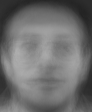

Image after NMF:


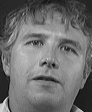

[[ 39.  41.  37. ...  36.  37.  37.]
 [ 38.  36.  40. ...  41.  35.  40.]
 [ 37.  43.  35. ...  35.  37.  36.]
 ...
 [209. 210. 211. ...  30.  34.  39.]
 [209. 213. 204. ...  34.  31.  36.]
 [209. 213. 195. ...  33.  33.  40.]]
Image Before NMF:
-------------------------------Number of image: 265
[[104. 104. 105. ... 106. 106. 106.]
 [104. 104. 104. ... 106. 107. 106.]
 [104. 104. 104. ... 106. 107. 107.]
 ...
 [103. 106. 109. ...  69.  70.  69.]
 [107. 108. 112. ...  70.  70.  72.]
 [108. 112. 115. ...  70.  70.  71.]]


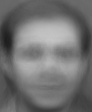

Image after NMF:


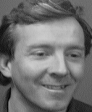

[[100.  99. 108. ... 109. 110. 111.]
 [104. 100. 105. ... 112. 106. 109.]
 [100. 102. 100. ... 110. 107. 110.]
 ...
 [ 78.  84.  80. ...  42.  47.  47.]
 [ 74.  83.  74. ...  43.  45.  44.]
 [ 79.  78.  76. ...  44.  42.  44.]]
Image Before NMF:
-------------------------------Number of image: 266
[[128. 127. 128. ... 127. 127. 127.]
 [128. 128. 127. ... 127. 127. 127.]
 [128. 128. 128. ... 127. 127. 127.]
 ...
 [ 94.  89.  92. ...  79.  79.  80.]
 [ 93.  90.  95. ...  79.  80.  81.]
 [ 93.  91.  94. ...  79.  80.  81.]]


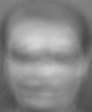

Image after NMF:


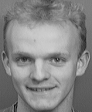

[[126. 127. 126. ... 125. 126. 125.]
 [126. 129. 126. ... 125. 127. 125.]
 [128. 124. 129. ... 124. 126. 124.]
 ...
 [ 86.  89.  91. ...  87.  87.  86.]
 [101.  98.  97. ...  86.  86.  86.]
 [100.  98.  99. ...  87.  85.  89.]]
Image Before NMF:
-------------------------------Number of image: 267
[[106. 106. 106. ... 103. 103. 103.]
 [106. 107. 106. ... 103. 103. 102.]
 [107. 106. 106. ... 103. 103. 103.]
 ...
 [ 41.  34.  37. ...  47.  48.  49.]
 [ 38.  34.  39. ...  45.  47.  48.]
 [ 38.  34.  37. ...  45.  46.  47.]]


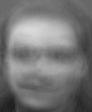

Image after NMF:


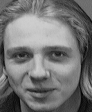

[[107. 108. 107. ... 107. 114. 106.]
 [112. 107. 110. ... 111. 111. 110.]
 [112. 102. 109. ... 112. 113. 110.]
 ...
 [ 39.  35.  37. ...  35.  34.  23.]
 [ 40.  48.  38. ...  42.  36.  40.]
 [ 54.  40.  35. ...  28.  39.  43.]]
Image Before NMF:
-------------------------------Number of image: 268
[[113. 113. 113. ... 107. 107. 107.]
 [113. 114. 114. ... 107. 107. 107.]
 [114. 114. 114. ... 107. 107. 107.]
 ...
 [135. 130. 134. ... 104. 103. 102.]
 [136. 135. 139. ... 106. 106. 105.]
 [137. 138. 140. ... 110. 109. 106.]]


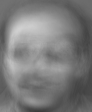

Image after NMF:


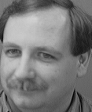

[[123. 124. 122. ... 118. 121. 116.]
 [124. 122. 122. ... 118. 121. 119.]
 [125. 124. 122. ... 118. 122. 114.]
 ...
 [144. 106.  69. ...  75.  70. 107.]
 [143. 100.  67. ...  74.  68. 103.]
 [140.  96.  67. ...  69.  71. 101.]]
Image Before NMF:
-------------------------------Number of image: 269
[[126. 126. 126. ... 120. 120. 120.]
 [127. 127. 126. ... 120. 120. 120.]
 [127. 127. 126. ... 121. 120. 120.]
 ...
 [132. 129. 132. ...  92.  90.  90.]
 [133. 131. 136. ...  91.  92.  94.]
 [134. 132. 137. ...  89.  90.  93.]]


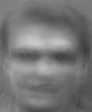

Image after NMF:


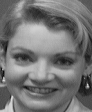

[[ 86.  90.  87. ...  84.  85.  87.]
 [ 93.  86.  87. ...  88.  84.  88.]
 [ 89.  86.  88. ...  88.  84.  87.]
 ...
 [ 97. 103. 126. ... 109.  94.  81.]
 [177. 182. 191. ... 135. 127. 133.]
 [203. 203. 203. ... 153. 142. 139.]]
Image Before NMF:
-------------------------------Number of image: 270
[[130. 130. 131. ... 129. 129. 129.]
 [131. 131. 130. ... 129. 129. 129.]
 [131. 131. 130. ... 129. 129. 129.]
 ...
 [100.  93.  96. ...  92.  91.  92.]
 [ 99.  95. 100. ...  92.  92.  93.]
 [ 99.  96.  99. ...  93.  93.  93.]]


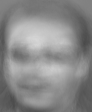

Image after NMF:


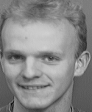

[[128. 128. 128. ... 124. 124. 124.]
 [128. 127. 126. ... 125. 125. 126.]
 [128. 128. 125. ... 126. 125. 128.]
 ...
 [112.  91.  92. ...  84.  88.  86.]
 [102.  83.  91. ...  85.  84.  87.]
 [ 89.  90.  86. ...  87.  83.  86.]]
Image Before NMF:
-------------------------------Number of image: 271
[[124. 124. 124. ... 124. 124. 124.]
 [125. 124. 124. ... 124. 124. 124.]
 [124. 124. 124. ... 124. 124. 124.]
 ...
 [ 66.  66.  69. ...  43.  45.  45.]
 [ 66.  65.  70. ...  40.  43.  46.]
 [ 66.  65.  69. ...  38.  40.  44.]]


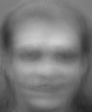

Image after NMF:


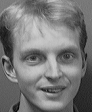

[[125. 119. 124. ... 122. 120. 116.]
 [121. 124. 118. ... 119. 120. 120.]
 [122. 125. 122. ... 121. 118. 121.]
 ...
 [ 85.  93.  82. ...  48.  35.  43.]
 [ 87.  92.  85. ...  40.  39.  35.]
 [ 79.  93.  89. ...  36.  39.  40.]]
Image Before NMF:
-------------------------------Number of image: 272
[[101. 101. 101. ... 101. 100. 100.]
 [101. 101. 101. ... 101. 101. 100.]
 [101. 101. 101. ... 100. 101. 101.]
 ...
 [ 80.  80.  83. ...  66.  66.  67.]
 [ 82.  81.  86. ...  65.  66.  67.]
 [ 83.  85.  88. ...  67.  68.  67.]]


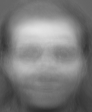

Image after NMF:


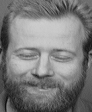

[[111. 111. 108. ... 111. 112. 111.]
 [109. 110. 110. ... 111. 109. 110.]
 [110. 108. 112. ... 109. 108. 113.]
 ...
 [110. 104.  94. ...  58.  64.  66.]
 [108. 101.  98. ...  62.  59.  61.]
 [107. 105. 105. ...  66.  64.  59.]]
Image Before NMF:
-------------------------------Number of image: 273
[[ 51.  51.  51. ...  47.  47.  47.]
 [ 51.  51.  51. ...  47.  47.  47.]
 [ 51.  51.  51. ...  47.  47.  47.]
 ...
 [ 98.  96.  98. ...  76.  74.  75.]
 [101. 102. 105. ...  79.  78.  76.]
 [103. 108. 109. ...  88.  86.  79.]]


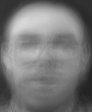

Image after NMF:


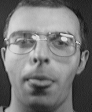

[[ 48.  44.  49. ...  38.  38.  34.]
 [ 50.  47.  51. ...  42.  38.  35.]
 [ 46.  50.  54. ...  40.  39.  39.]
 ...
 [131. 130. 112. ...  38.  41.  40.]
 [130. 133. 113. ...  37.  41.  37.]
 [136. 135. 126. ...  41.  45.  35.]]
Image Before NMF:
-------------------------------Number of image: 274
[[101. 101. 102. ...  95.  95.  95.]
 [101. 102. 102. ...  95.  95.  96.]
 [101. 101. 102. ...  96.  96.  95.]
 ...
 [163. 169. 169. ...  90.  88.  87.]
 [171. 175. 176. ...  94.  93.  93.]
 [175. 181. 183. ...  94.  93.  94.]]


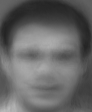

Image after NMF:


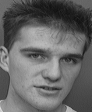

[[110. 108. 109. ... 100.  98. 104.]
 [110. 110. 110. ... 102.  99. 102.]
 [110. 108. 108. ... 102. 100. 102.]
 ...
 [212. 193. 150. ...  65.  66.  64.]
 [199. 215. 163. ...  66.  63.  67.]
 [200. 206. 206. ...  66.  64.  63.]]
Image Before NMF:
-------------------------------Number of image: 275
[[ 85.  85.  86. ...  81.  81.  80.]
 [ 85.  86.  86. ...  81.  81.  81.]
 [ 85.  85.  86. ...  81.  81.  80.]
 ...
 [163. 162. 163. ... 121. 118. 117.]
 [167. 169. 171. ... 126. 124. 122.]
 [170. 174. 176. ... 130. 127. 124.]]


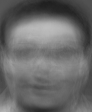

Image after NMF:


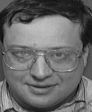

[[ 99. 103.  98. ...  92.  92.  92.]
 [100. 102. 101. ...  93.  92.  90.]
 [101. 102. 102. ...  92.  92.  90.]
 ...
 [104. 154. 139. ... 143. 148. 157.]
 [101. 147. 154. ... 155. 139. 149.]
 [104. 148. 160. ... 162. 122. 122.]]
Image Before NMF:
-------------------------------Number of image: 276
[[ 94.  94.  94. ... 100. 100. 100.]
 [ 94.  94.  94. ... 101. 101. 100.]
 [ 94.  93.  94. ... 100. 101. 101.]
 ...
 [100. 104. 105. ...  84.  84.  83.]
 [105. 107. 108. ...  87.  86.  86.]
 [108. 113. 114. ...  89.  86.  87.]]


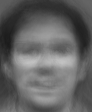

Image after NMF:


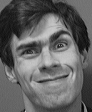

[[115. 118. 117. ... 117. 114. 116.]
 [114. 116. 117. ... 113. 119. 113.]
 [118. 114. 117. ... 115. 116. 112.]
 ...
 [ 98. 102. 100. ...  25.  23.  25.]
 [ 99.  98.  98. ...  21.  26.  21.]
 [101. 100.  95. ...  22.  25.  28.]]
Image Before NMF:
-------------------------------Number of image: 277
[[103. 103. 103. ... 108. 108. 108.]
 [103. 103. 103. ... 108. 108. 108.]
 [103. 102. 103. ... 108. 109. 109.]
 ...
 [114. 119. 120. ...  78.  79.  78.]
 [120. 122. 123. ...  81.  80.  81.]
 [122. 127. 129. ...  82.  81.  82.]]


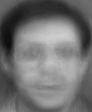

Image after NMF:


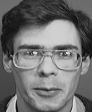

[[109. 107. 110. ... 106. 108. 105.]
 [108. 110. 108. ... 106. 107. 108.]
 [109. 109. 108. ... 106. 108. 108.]
 ...
 [ 38.  51.  43. ...  37.  42.  35.]
 [ 47.  49.  33. ...  38.  40.  31.]
 [ 47.  40.  44. ...  42.  40.  35.]]
Image Before NMF:
-------------------------------Number of image: 278
[[114. 114. 114. ... 110. 110. 110.]
 [114. 114. 114. ... 110. 110. 110.]
 [114. 114. 115. ... 110. 110. 110.]
 ...
 [143. 146. 147. ...  75.  74.  74.]
 [148. 151. 153. ...  77.  77.  78.]
 [150. 155. 157. ...  78.  78.  79.]]


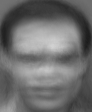

Image after NMF:


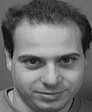

[[105. 102. 106. ... 105. 105. 107.]
 [105. 105. 104. ... 106. 107. 108.]
 [100. 105. 104. ... 108. 106. 101.]
 ...
 [140. 139. 140. ...  66.  65.  65.]
 [144. 138. 142. ...  70.  70.  67.]
 [144. 141. 137. ...  72.  62.  75.]]
Image Before NMF:
-------------------------------Number of image: 279
[[46. 46. 46. ... 45. 45. 45.]
 [46. 46. 46. ... 45. 45. 45.]
 [46. 46. 46. ... 45. 45. 45.]
 ...
 [84. 84. 87. ... 73. 72. 73.]
 [87. 88. 91. ... 74. 74. 73.]
 [89. 93. 95. ... 81. 80. 74.]]


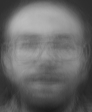

Image after NMF:


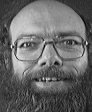

[[47. 50. 52. ... 48. 45. 48.]
 [49. 52. 51. ... 45. 46. 42.]
 [51. 50. 48. ... 44. 46. 47.]
 ...
 [70. 63. 68. ... 44. 39. 45.]
 [69. 62. 68. ... 37. 42. 37.]
 [69. 66. 62. ... 33. 45. 36.]]
Image Before NMF:
-------------------------------Number of image: 280
[[ 38.  38.  38. ...  37.  37.  37.]
 [ 38.  38.  38. ...  37.  37.  37.]
 [ 38.  38.  38. ...  37.  37.  37.]
 ...
 [ 96.  95.  97. ...  89.  87.  89.]
 [100. 102. 104. ...  92.  91.  88.]
 [104. 109. 110. ... 101.  99.  91.]]


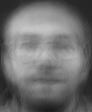

Image after NMF:


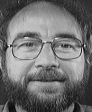

[[ 48.  48.  55. ...  44.  46.  47.]
 [ 51.  47.  54. ...  48.  47.  47.]
 [ 49.  56.  50. ...  48.  46.  48.]
 ...
 [107.  96.  59. ...  94.  94. 108.]
 [110.  89.  59. ...  90.  98. 104.]
 [110.  79. 116. ...  88.  93.  99.]]
Image Before NMF:
-------------------------------Number of image: 281
[[71. 71. 71. ... 76. 76. 76.]
 [71. 71. 70. ... 76. 76. 76.]
 [71. 71. 71. ... 76. 77. 77.]
 ...
 [51. 52. 53. ... 67. 66. 68.]
 [55. 53. 55. ... 66. 66. 66.]
 [59. 57. 60. ... 66. 66. 67.]]


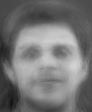

Image after NMF:


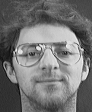

[[67. 64. 67. ... 69. 69. 77.]
 [70. 66. 69. ... 67. 73. 71.]
 [67. 66. 62. ... 71. 71. 71.]
 ...
 [48. 46. 50. ... 65. 72. 82.]
 [50. 50. 49. ... 72. 67. 71.]
 [49. 48. 52. ... 73. 69. 72.]]
Image Before NMF:
-------------------------------Number of image: 282
[[104. 104. 105. ... 104. 103. 103.]
 [104. 105. 105. ... 104. 104. 103.]
 [105. 104. 105. ... 104. 104. 103.]
 ...
 [ 97.  91.  92. ...  90.  89.  89.]
 [ 96.  95.  97. ...  94.  92.  90.]
 [ 98.  99.  99. ...  99.  96.  93.]]


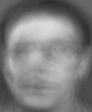

Image after NMF:


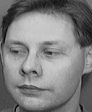

[[121. 123. 121. ... 113. 118. 118.]
 [120. 123. 123. ... 115. 116. 116.]
 [116. 121. 120. ... 118. 112. 115.]
 ...
 [ 76.  68.  75. ...  82.  78.  81.]
 [ 77.  77.  91. ...  81.  78.  86.]
 [ 85.  97. 105. ...  88.  83.  78.]]
Image Before NMF:
-------------------------------Number of image: 283
[[106. 106. 106. ... 112. 112. 111.]
 [106. 106. 106. ... 113. 113. 111.]
 [106. 106. 106. ... 111. 113. 113.]
 ...
 [ 77.  69.  73. ... 105. 105. 106.]
 [ 74.  71.  75. ... 107. 106. 105.]
 [ 74.  73.  76. ... 112. 109. 107.]]


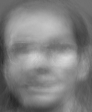

Image after NMF:


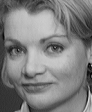

[[ 91.  83.  70. ... 162. 161. 157.]
 [ 82.  81.  72. ... 148. 165. 162.]
 [ 86.  74.  70. ... 138. 164. 168.]
 ...
 [ 54.  50.  52. ... 156. 181. 193.]
 [ 52.  51.  51. ... 165. 186. 195.]
 [ 48.  56.  45. ... 171. 188. 190.]]
Image Before NMF:
-------------------------------Number of image: 284
[[ 98.  99.  99. ...  95.  95.  95.]
 [ 99.  99.  99. ...  95.  95.  95.]
 [ 99.  99.  99. ...  95.  95.  95.]
 ...
 [118. 117. 118. ...  87.  85.  85.]
 [121. 120. 123. ...  88.  88.  88.]
 [123. 124. 126. ...  89.  88.  89.]]


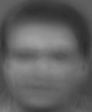

Image after NMF:


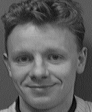

[[ 99.  90.  97. ...  88.  94.  88.]
 [ 99.  94.  96. ...  94.  87.  89.]
 [ 95.  97.  97. ...  89.  89.  91.]
 ...
 [ 84.  97.  97. ... 115. 130. 150.]
 [122. 154. 153. ... 123. 117. 156.]
 [165. 176. 164. ... 135. 113. 158.]]
Image Before NMF:
-------------------------------Number of image: 285
[[95. 96. 96. ... 93. 92. 92.]
 [95. 96. 96. ... 93. 92. 92.]
 [96. 96. 97. ... 93. 93. 92.]
 ...
 [61. 60. 58. ... 54. 54. 53.]
 [65. 64. 64. ... 57. 55. 54.]
 [68. 71. 69. ... 60. 57. 56.]]


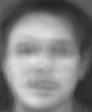

Image after NMF:


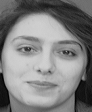

[[117. 113. 118. ... 111. 107. 113.]
 [116. 117. 112. ... 111. 111. 113.]
 [116. 116. 116. ... 112. 109. 111.]
 ...
 [ 54.  51.  60. ...  76.  78.  75.]
 [ 64.  64.  67. ...  76.  79.  82.]
 [ 70.  70.  75. ...  78.  85.  82.]]
Image Before NMF:
-------------------------------Number of image: 286
[[100. 101. 101. ... 101. 100. 100.]
 [100. 101. 101. ... 100. 101. 100.]
 [100. 101. 101. ... 100. 101. 101.]
 ...
 [162. 167. 169. ... 107. 106. 105.]
 [168. 172. 174. ... 111. 110. 110.]
 [171. 177. 180. ... 113. 112. 111.]]


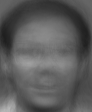

Image after NMF:


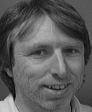

[[ 88.  85.  89. ...  89.  87.  84.]
 [ 87.  88.  84. ...  86.  89.  87.]
 [ 85.  88.  88. ...  85.  90.  83.]
 ...
 [199. 201. 201. ... 116. 120. 114.]
 [199. 200. 202. ... 118. 119. 117.]
 [192. 195. 203. ... 117. 117. 116.]]
Image Before NMF:
-------------------------------Number of image: 287
[[114. 114. 114. ... 116. 115. 115.]
 [114. 114. 114. ... 116. 116. 115.]
 [114. 114. 114. ... 115. 116. 116.]
 ...
 [ 74.  73.  76. ...  72.  73.  73.]
 [ 75.  72.  77. ...  70.  72.  73.]
 [ 75.  74.  77. ...  69.  70.  72.]]


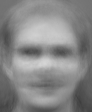

Image after NMF:


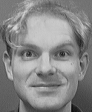

[[122. 120. 121. ... 113. 116. 112.]
 [122. 120. 117. ... 115. 114. 113.]
 [121. 123. 122. ... 112. 118. 114.]
 ...
 [ 92.  85.  89. ...  69.  64.  68.]
 [ 87.  90.  88. ...  62.  67.  59.]
 [ 88.  85.  91. ...  59.  67.  58.]]
Image Before NMF:
-------------------------------Number of image: 288
[[41. 42. 42. ... 36. 36. 36.]
 [41. 42. 42. ... 36. 35. 36.]
 [42. 42. 42. ... 36. 36. 35.]
 ...
 [75. 76. 76. ... 44. 43. 43.]
 [79. 82. 82. ... 47. 46. 45.]
 [82. 87. 87. ... 52. 51. 46.]]


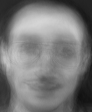

Image after NMF:


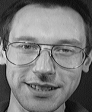

[[39. 46. 42. ... 39. 39. 36.]
 [48. 44. 45. ... 37. 40. 42.]
 [42. 47. 43. ... 37. 38. 47.]
 ...
 [60. 53. 48. ... 20. 28. 26.]
 [65. 45. 48. ... 19. 24. 27.]
 [52. 55. 54. ... 19. 19. 25.]]
Image Before NMF:
-------------------------------Number of image: 289
[[116. 116. 116. ... 122. 122. 121.]
 [116. 116. 116. ... 123. 123. 122.]
 [116. 116. 116. ... 122. 123. 123.]
 ...
 [ 69.  71.  75. ...  62.  65.  65.]
 [ 71.  70.  75. ...  62.  63.  65.]
 [ 71.  73.  76. ...  63.  63.  64.]]


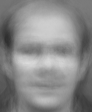

Image after NMF:


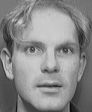

[[120. 120. 120. ... 113. 113. 109.]
 [121. 121. 121. ... 112. 114. 111.]
 [120. 124. 123. ... 112. 114. 114.]
 ...
 [ 94.  85.  82. ...  85.  86.  85.]
 [ 94.  93.  82. ...  82.  83.  84.]
 [ 94.  93.  86. ...  82.  87.  79.]]
Image Before NMF:
-------------------------------Number of image: 290
[[ 85.  86.  86. ...  84.  84.  84.]
 [ 85.  86.  86. ...  85.  84.  84.]
 [ 86.  85.  86. ...  84.  85.  84.]
 ...
 [ 97.  96.  97. ...  70.  69.  69.]
 [100. 101. 102. ...  74.  72.  71.]
 [101. 106. 105. ...  78.  76.  73.]]


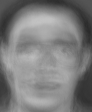

Image after NMF:


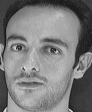

[[63. 60. 63. ... 62. 61. 66.]
 [58. 60. 65. ... 68. 61. 63.]
 [61. 61. 60. ... 62. 65. 57.]
 ...
 [60. 51. 60. ... 63. 62. 68.]
 [52. 50. 46. ... 64. 64. 61.]
 [55. 50. 24. ... 63. 69. 58.]]
Image Before NMF:
-------------------------------Number of image: 291
[[ 62.  62.  62. ...  60.  60.  60.]
 [ 62.  62.  62. ...  60.  60.  60.]
 [ 62.  62.  62. ...  60.  60.  60.]
 ...
 [113. 113. 117. ...  82.  82.  83.]
 [116. 120. 123. ...  85.  85.  83.]
 [118. 125. 128. ...  95.  94.  86.]]


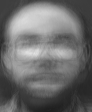

Image after NMF:


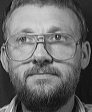

[[ 44.  48.  51. ...  41.  41.  43.]
 [ 46.  50.  45. ...  38.  41.  44.]
 [ 50.  51.  43. ...  36.  42.  41.]
 ...
 [186. 198. 164. ... 106. 113. 111.]
 [174. 149. 144. ... 116. 130. 123.]
 [136. 150. 154. ... 129. 131. 125.]]
Image Before NMF:
-------------------------------Number of image: 292
[[ 65.  65.  65. ...  63.  62.  62.]
 [ 66.  65.  65. ...  62.  63.  63.]
 [ 65.  66.  65. ...  63.  62.  63.]
 ...
 [145. 146. 150. ... 103. 101. 102.]
 [149. 153. 157. ... 107. 106. 104.]
 [151. 159. 162. ... 117. 115. 107.]]


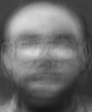

Image after NMF:


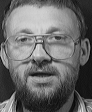

[[ 46.  50.  45. ...  38.  44.  40.]
 [ 49.  45.  51. ...  40.  42.  40.]
 [ 50.  50.  49. ...  42.  43.  40.]
 ...
 [188. 166. 188. ... 137. 128. 153.]
 [148. 152. 220. ... 128. 135. 112.]
 [126. 197. 188. ... 136. 144.  98.]]
Image Before NMF:
-------------------------------Number of image: 293
[[111. 111. 111. ... 115. 115. 114.]
 [111. 110. 111. ... 115. 115. 115.]
 [111. 111. 110. ... 114. 115. 116.]
 ...
 [ 89.  89.  94. ...  75.  76.  76.]
 [ 90.  89.  94. ...  74.  75.  77.]
 [ 90.  91.  95. ...  73.  74.  76.]]


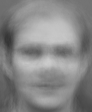

Image after NMF:


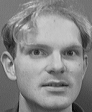

[[122. 120. 125. ... 118. 112. 113.]
 [125. 121. 121. ... 113. 115. 112.]
 [120. 119. 120. ... 117. 112. 115.]
 ...
 [ 89.  86.  88. ...  65.  67.  63.]
 [ 91.  88.  85. ...  67.  66.  62.]
 [ 92.  91.  87. ...  65.  62.  66.]]
Image Before NMF:
-------------------------------Number of image: 294
[[39. 39. 39. ... 34. 34. 34.]
 [39. 39. 39. ... 34. 34. 34.]
 [39. 39. 39. ... 35. 34. 34.]
 ...
 [76. 78. 78. ... 48. 48. 48.]
 [80. 83. 84. ... 51. 50. 49.]
 [83. 88. 88. ... 56. 55. 51.]]


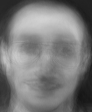

Image after NMF:


In [57]:
m=convertMatrixtoImageMinMax(m, min, max)
print(m)
compareAndTest(m,w,h, min, max, 1)

In [80]:
x_new=np.matmul(w,h)
x_new=np.ceil(x_new*1)
x_new=np.transpose(x_new)

print("Original Image Set Variance: "+str(variance(np.ceil(np.transpose(m)*1))))
print("NMF Generated Image Set Variance: "+str(variance(x_new)))

Original Image Set Variance: 2486.9680022936423
NMF Generated Image Set Variance: 6.912323261932398e-06


In [ ]:
w.shape

In [ ]:
kmeans=compareAndTestWithKNN(m,w,h, 1, 3)

In [ ]:
scatterPlot(kmeans,w)